In [3]:
import pandas as pd
import os
import seaborn as sns
import numpy as np


For non filtere aproach

In [69]:
directory_path = "experiment_prepo/"

# List all files that contain 'prepro_experiment_outs_visitkmeans' in their names
files = [
    f for f in os.listdir(directory_path) if "prepro_experiment_outs_visitkmeans" in f
]
files

['prepro_experiment_outs_visitkmeans_prepro_nonfilteres.csv',
 'prepro_experiment_outs_visitkmeans_cat_threshold .98 most frequent_nonfiltered.csv',
 'prepro_experiment_outs_visitkmeans_cat_threshold .999 most frequent_nonfiltered_aux.csv',
 'prepro_experiment_outs_visitkmeans_cat_threshold .999 most frequent_nonfiltered.csv',
 'prepro_experiment_outs_visitkmeans_cat_threshold .88 most frequent_nonfiltered.csv',
 'prepro_experiment_outs_visitkmeans_cat_threshold .95 most frequent_proc_nonfiltered.csv',
 'prepro_experiment_outs_visitkmeans_cat_threshold .88 most frequent_nonfiltered_aux.csv',
 'prepro_experiment_outs_visitkmeans_ICD9_CODE_procedures_nonfiltered.csv',
 'prepro_experiment_outs_visitkmeans_CCS CODES_proc_nonfiltered_aux.csv',
 'prepro_experiment_outs_visitkmeans_CCS CODES_proc_nonfiltered.csv']

In [74]:
directory_path = "experiment_prepo/"

# List all files that contain 'prepro_experiment_outs_visitkmeans' in their names
files = [
    f for f in os.listdir(directory_path) if "prepro_experiment_Patientkmeans" in f
]
files

['prepro_experiment_Patientkmeans_cat_threshold .98 most frequent_nonfiltered.csv',
 'prepro_experiment_Patientkmeans_CCS CODES_proc_nonfiltered.csv',
 'prepro_experiment_Patientkmeans_cat_threshold .999 most frequent_nonfiltered_aux.csv',
 'prepro_experiment_Patientkmeans_cat_threshold .999 most frequent_nonfiltered.csv',
 'prepro_experiment_Patientkmeans_ICD9_CODE_procedures_nonfiltered.csv',
 'prepro_experiment_Patientkmeans_cat_threshold .88 most frequent_nonfiltered.csv',
 'prepro_experiment_Patientkmeans_cat_threshold .95 most frequent_proc_nonfiltered.csv',
 'prepro_experiment_Patientkmeans_results_prepro_nonfilteres.csv',
 'prepro_experiment_Patientkmeans_cat_threshold .88 most frequent_nonfiltered_aux.csv',
 'prepro_experiment_Patientkmeans_CCS CODES_proc_nonfiltered_aux.csv']

In [75]:
# concatenar los dataframes
list_data = []
for i in files:
    list_data.append(pd.read_csv(directory_path + i))

concatenated_df = pd.concat(list_data, axis=0)
concatenated_df[concatenated_df.notnull()]

Unnamed: 0                                  Name Prepro  Num Cluster  \
0            0  cat_threshold .95 most frequent_proc    std            4   
1            1  cat_threshold .95 most frequent_proc    std            8   
2            2  cat_threshold .95 most frequent_proc    std           12   
3            3  cat_threshold .95 most frequent_proc    max            4   
4            4  cat_threshold .95 most frequent_proc    max            8   
..         ...                                   ...    ...          ...   
4            4                        CCS CODES_proc    max            8   
5            5                        CCS CODES_proc    max           12   
6            6                        CCS CODES_proc  power            4   
7            7                        CCS CODES_proc  power            8   
8            8                        CCS CODES_proc  power           12   

    silhouette_avg  davies_bouldin_avg  index  Unnamed: 0.1  
0         0.279838            5.945714    NaN           NaN  
1         0.029663            4.725819    NaN           NaN  
2        -0.133328            4.369194    NaN           NaN  
3         0.180099            1.962310    NaN           NaN  
4         0.172759            1.967896    NaN           NaN  
..             ...                 ...    ...           ...  
4         0.235624            1.747166    NaN           NaN  
5         0.243077            1.969579    NaN           NaN  
6         0.118665            4.305264    NaN           NaN  
7        -0.001352            3.335532    NaN           NaN  
8        -0.037027            3.131423    NaN           NaN  

[166 rows x 8 columns]

In [7]:
6*3*3

54

In [71]:
df_p1 = concatenated_df.reset_index()
df_p1 = df_p1.drop_duplicates()

In [16]:
df_p1.shape

(109, 9)

In [72]:
df_p1 = df_p1.drop_duplicates(subset=set(df_p1.columns).difference(

        {'Unnamed: 0.1','index','silhouette_avg','davies_bouldin_avg','Unnamed: 0','level_0'}),
    ignore_index=True)

In [73]:
df_p1.shape

(54, 9)

In [76]:
df_p = concatenated_df.reset_index()
df_p = df_p.drop_duplicates()


In [77]:
df_p = df_p.drop_duplicates(subset=set(df_p.columns).difference(

        {'Unnamed: 0.1','index','silhouette_avg','davies_bouldin_avg','Unnamed: 0','level_0'}),
    ignore_index=True)

In [78]:
df_p.shape

(54, 9)

In [80]:
df_p1 = df_p1.rename(
    columns={
        "silhouette_avg": "silhouette_avg_v",
        "davies_bouldin_avg": "davies_bouldin_avg_v",
    }
)

# Print the updated DataFrame
df_p1.shape

(54, 9)

In [300]:
df_p = pd.read_csv("/Users/cgarciay/Desktop/Laval_Master_Computer/research/Synthetic-Data-Deep-Learning/experiment_prepo/prepro_experiment_patient.csv")


In [319]:
df_p1.Name.nunique()

6

In [92]:
df_p.Name.nunique()

6

In [98]:
df_p.Name.unique()

array(['cat_threshold .95 most frequent_proc',
       'cat_threshold .88 most frequent',
       'cat_threshold .98 most frequent', 'ICD9_CODE_procedures',
       'CCS CODES_proc', 'cat_threshold .999 most frequent'], dtype=object)

In [101]:
df_p1.Name.unique()

array(['ICD9_CODE_procedures', 'CCS CODES_proc',
       'cat_threshold .95 most frequent_proc',
       'cat_threshold .88 most frequent',
       'cat_threshold .98 most frequent',
       'cat_threshold .999 most frequent'], dtype=object)

In [320]:
df_p.Name.nunique()

6

In [113]:
df_p.shape
merged_df = pd.merge(df_p, df_p1, on=["Name", "Prepro", "Num Cluster"], how="inner")

# Print the merged DataFrame
print(merged_df.shape)

(54, 15)


In [103]:
merged_df.Name.unique()

array(['cat_threshold .95 most frequent_proc',
       'cat_threshold .88 most frequent',
       'cat_threshold .98 most frequent', 'ICD9_CODE_procedures',
       'CCS CODES_proc', 'cat_threshold .999 most frequent'], dtype=object)

In [82]:
merged_df.shape

(54, 15)

In [104]:
merged_df.to_csv("results_final_merged_procedures.csv")

In [282]:
idx = df_p.groupby(["Name"])["silhouette_avg"].idxmax()

# Obtener las filas correspondientes al índice máximo de "Score Sihouate"
result = df_p.loc[
    idx, ["Name", "Prepro", "Num Cluster", "silhouette_avg"]
].drop_duplicates()

result.sort_values(by=["silhouette_avg"])

NameError: name 'df_p' is not defined

In [106]:
merged_df["Name"].unique()

array(['cat_threshold .95 most frequent_proc',
       'cat_threshold .88 most frequent',
       'cat_threshold .98 most frequent', 'ICD9_CODE_procedures',
       'CCS CODES_proc', 'cat_threshold .999 most frequent'], dtype=object)

In [114]:
merged_df["Name"] = merged_df["Name"].replace('ICD9_CODE_procedures', "ICD9 CODE")
merged_df["Name"] = merged_df["Name"].replace("CCS CODES_proc", "CCS CODES")
merged_df["Name"] = merged_df["Name"].replace(
    "cat_threshold .95 most frequent_proc", "threshold .95"
)
merged_df["Name"] = merged_df["Name"].replace(
    "cat_threshold .88 most frequent", "threshold .88"
)
merged_df["Name"] = merged_df["Name"].replace(
    "cat_threshold .999 most frequent", "threshold .999"
)
merged_df["Name"] = merged_df["Name"].replace(
    "cat_threshold .98 most frequent", "threshold .98"
)

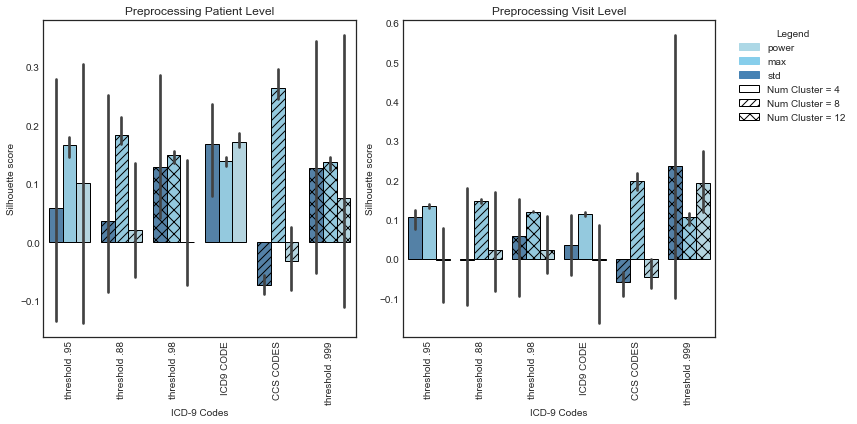

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec

# Assuming df_p is already defined and contains the relevant data
# Here we are creating a mock dataframe for demonstration purposes

# Define the patterns for the number of clusters
patterns = {4: "", 8: "///", 12: "xx"}

# Define a shades of blue color palette
palette = {"power": "lightblue", "max": "skyblue", "std": "steelblue"}

# Create a 1x2 grid of subplots for the two Silhouette score plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Flatten the array of axes for easy iterating (not strictly necessary with 1x2 grid)
axs = axs.flatten()

# Filter the DataFrame for Silhouette score
# Assuming 'merged_df' is the DataFrame that contains the silhouette scores.
# df_p = merged_df[merged_df['Metric'] == 'Silhouette score']

# Loop over the two Silhouette score plots
scores = ["Silhouette score"] * 2  # since we only want Silhouette scores
title_1 = [
     "Preprocessing patient level",
    "Preprocessing visit level"
   
]

# Adjust the enumerate to loop over the relevant metrics
for i, metric in enumerate(["silhouette_avg", "silhouette_avg_v"]):
    ax = axs[i]
    sns.barplot(
        x="Name", y=metric, hue="Prepro", data=merged_df, ax=ax, palette=palette
    )
    ax.set_title(title_1[i].title())

    ax.set_ylabel(scores[i])
    ax.set_xlabel("ICD-9 Codes")

    # Add patterns to bars and set the bar edge color to black for clarity
    for bar, pattern in zip(ax.patches, df_p["Num Cluster"]):
        bar.set_hatch(patterns[pattern])
        bar.set_edgecolor("black")

    # Rotate x labels for both subplots
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Remove the legend from the second subplot
    if i >= 0:
        ax.get_legend().remove()

# Assuming prepro_patches and pattern_patches are already defined as in the original code
# Add the custom legends to the right of the plots
prepro_patches = [Patch(color=palette[name], label=name) for name in palette]
pattern_patches = [
    Patch(
        facecolor="white",
        edgecolor="black",
        hatch=patterns[n],
        label=f"Num Cluster = {n}",
    )
    for n in patterns
]

plt.legend(
    handles=prepro_patches + pattern_patches,
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    title="Legend",
)

plt.tight_layout()
plt.show()


In [119]:
merged_df.sort_values(by = ['silhouette_avg_v'], ascending=False)

level_0_x  Unnamed: 0_x            Name Prepro  Num Cluster  \
45          9             9  threshold .999    std            4   
51         15            15  threshold .999  power            4   
46         10            10  threshold .999    std            8   
40         13            13       CCS CODES    max            8   
39         12            12       CCS CODES    max            4   
52         16            16  threshold .999  power            8   
9           9             9   threshold .88    std            4   
27          0             0       ICD9 CODE    std            4   
41         14            14       CCS CODES    max           12   
15         15            15   threshold .88  power            4   
19         19            19   threshold .98    std            8   
13         13            13   threshold .88    max            8   
14         14            14   threshold .88    max           12   
12         12            12   threshold .88    max            4   
4           4             4   threshold .95    max            8   
5           5             5   threshold .95    max           12   
3           3             3   threshold .95    max            4   
1           1             1   threshold .95    std            8   
23         23            23   threshold .98    max           12   
21         21            21   threshold .98    max            4   
22         22            22   threshold .98    max            8   
53         17            17  threshold .999  power           12   
32          5             5       ICD9 CODE    max           12   
49         13            13  threshold .999    max            8   
30          3             3       ICD9 CODE    max            4   
0           0             0   threshold .95    std            4   
18         18            18   threshold .98    std            4   
48         12            12  threshold .999    max            4   
31          4             4       ICD9 CODE    max            8   
24         24            24   threshold .98  power            4   
34          7             7       ICD9 CODE  power            8   
50         14            14  threshold .999    max           12   
6           6             6   threshold .95  power            4   
2           2             2   threshold .95    std           12   
33          6             6       ICD9 CODE  power            4   
7           7             7   threshold .95  power            8   
42         15            15       CCS CODES  power            4   
26         26            26   threshold .98  power           12   
16         16            16   threshold .88  power            8   
29          2             2       ICD9 CODE    std           12   
37         10            10       CCS CODES    std            8   
25         25            25   threshold .98  power            8   
28          1             1       ICD9 CODE    std            8   
38         11            11       CCS CODES    std           12   
44          8             8       CCS CODES  power           12   
43         16            16       CCS CODES  power            8   
10         10            10   threshold .88    std            8   
17         17            17   threshold .88  power           12   
36          9             9       CCS CODES    std            4   
20         20            20   threshold .98    std           12   
47         11            11  threshold .999    std           12   
8           8             8   threshold .95  power           12   
11         11            11   threshold .88    std           12   
35          8             8       ICD9 CODE  power           12   

    silhouette_avg  davies_bouldin_avg  index_x  Unnamed: 0.1_x  level_0_y  \
45        0.344228            7.231429      NaN             NaN         42   
51        0.354488            6.931999      NaN             NaN         48   
46        0.088529            4.902770      NaN             NaN         43   
40    

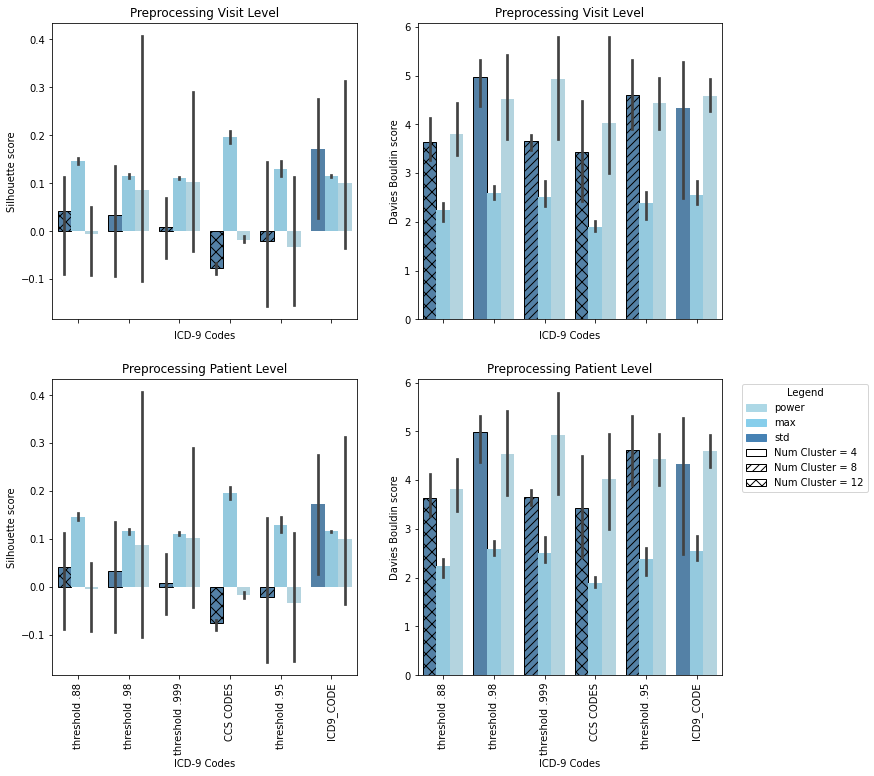

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.gridspec import GridSpec

# Assuming df_p is already defined and contains the relevant data
# Here we are creating a mock dataframe for demonstration purposes

# Define the patterns for the number of clusters
patterns = {4: "", 8: "///", 12: "xx"}

# Define a shades of blue color palette
palette = {"power": "lightblue", "max": "skyblue", "std": "steelblue"}

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Flatten the array of axes for easy iterating
axs = axs.flatten()

# Loop over the number of plots
scores = [
    "Silhouette score",
    "Davies Bouldin score",
    "Silhouette score",
    "Davies Bouldin score",
]
title_1 = [
    "Preprocessing visit level",
    "Preprocessing visit level",
    "Preprocessing patient level",
    "Preprocessing patient level",
]
for i, metric in enumerate(
    ["silhouette_avg", "davies_bouldin_avg", "silhouette_avg_p", "davies_bouldin_avg_p"]
):
    ax = axs[i]
    sns.barplot(
        x="Name", y=metric, hue="Prepro", data=merged_df, ax=ax, palette=palette
    )
    ax.set_title(title_1[i].title())

    ax.set_ylabel(scores[i])
    ax.set_xlabel("ICD-9 Codes")
    # Add patterns to bars and set the bar edge color to black for clarity
    for bar, pattern in zip(ax.patches, df["Num Cluster"]):
        bar.set_hatch(patterns[pattern])
        bar.set_edgecolor("black")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Remove the legend from each subplot after the first one
    if i >= 0:
        ax.get_legend().remove()

    if i < 2:
        ax.set_xticklabels([])


# Creating custom legends for preprocessing methods and cluster patterns
prepro_patches = [Patch(color=palette[name], label=name) for name in palette]
pattern_patches = [
    Patch(
        facecolor="white",
        edgecolor="black",
        hatch=patterns[n],
        label=f"Num Cluster = {n}",
    )
    for n in patterns
]

# Add the custom legends to the right of the plots
plt.legend(
    handles=prepro_patches + pattern_patches,
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    title="Legend",
)

plt.show()

In [65]:
# Assuming df_p1 is already defined and contains the relevant data
# Replace df_p with df_p1 in your code

df_p1["Name"] = df_p1["Name"].replace("CCS CODES_proc", "CCS CODES")
df_p1["Name"] = df_p1["Name"].replace("ICD9_CODE_procedures", "ICD9_CODE")
df_p1["Name"] = df_p1["Name"].replace(
    "cat_threshold .88 most frequent", "threshold .88"
)
df_p1["Name"] = df_p1["Name"].replace(
    "cat_threshold .999 most frequent", "threshold .999"
)
df_p1["Name"] = df_p1["Name"].replace(
    "cat_threshold .98 most frequent", "threshold .98"
)
df_p1["Name"] = df_p1["Name"].replace(
    "cat_threshold .95 most frequent_proc", "threshold .95"
)
df_p1["Name"] = df_p1["Name"].replace("sin_codigo", "No ICD9-Code")

# This will update the "Name" column in df_p1 with the specified replacements.

In [2]:
type_a = stri = "visit.csv"
df_p = pd.read_csv(
    "/Users/cgarciay/Desktop/Laval_Master_Computer/research/experiment_prepo/prepro_experiment_"
    + type_a
    + ""
)

In [26]:
df_p["Name"] = df_p["Name"].replace("CCS CODES_proc", "CCS CODES")
df_p["Name"] = df_p["Name"].replace("ICD9_CODE_procedures", "ICD9_CODE")
df_p["Name"] = df_p["Name"].replace("cat_threshold .88 most frequent", "threshold .88")
df_p["Name"] = df_p["Name"].replace(
    "cat_threshold .999 most frequent", "threshold .999"
)
df_p["Name"] = df_p["Name"].replace("cat_threshold .98 most frequent", "threshold .98")
df_p["Name"] = df_p["Name"].replace(
    "cat_threshold .95 most frequent_proc", "threshold .95"
)
df_p["Name"] = df_p["Name"].replace("sin_codigo", "No ICD9-Code")

In [4]:
df_p.iloc[:, 1:6].head()


Name Prepro  Num Cluster  silhouette_avg  davies_bouldin_avg
0  ICD9_CODE  power           12        0.060873            2.359052
1  ICD9_CODE    max            4        0.072957            2.676974
2  ICD9_CODE    max            8        0.072525            2.684660
3  ICD9_CODE    std           12        0.166682            2.755554
4  ICD9_CODE    std            8        0.127807            2.824454

In [6]:
pivot_table


silhouette_avg
Name           Prepro Num Cluster                
CCS CODES      max    4                  0.109303
                      8                  0.102586
                      12                 0.083047
               power  4                  0.084427
                      8                  0.030085
                      12                 0.036853
               std    4                  0.227818
                      8                  0.054400
                      12                 0.087958
ICD9_CODE      max    4                  0.072957
                      8                  0.072525
                      12                 0.053218
               power  4                  0.183580
                      8                  0.063122
                      12                 0.060873
               std    4                  0.330059
                      8                  0.127807
                      12                 0.166682
threshold .88  max    4                  0.091894
                      8                  0.083503
                      12                 0.077204
               power  4                  0.194061
                      8                  0.119818
                      12                 0.085242
               std    4                  0.170829
                      8                  0.146122
                      12                 0.134318
threshold .95  max    4                  0.080000
                      8                  0.080000
                      12                 0.060000
               power  4                  0.130200
                      8                  0.090000
                      12                 0.070000
               std    4                  0.183504
                      8                  0.117203
                      12                 0.080000
threshold .98  max    4                  0.094774
                      8                  0.059715
                      12                 0.051207
               power  4                  0.135230
                      8                  0.087782
                      12                 0.075673
               std    4                  0.128983
                      8                  0.062640
                      12                 0.109071
threshold .999 max    4                  0.072513
                      8                  0.057259
                      12                 0.046971
               power  4                  0.213212
                      8                  0.125791
                      12                 0.159917
               std    4                  0.287062
                      8                  0.071205
                      12                 0.134659

In [5]:
#'davies_bouldin_avg'
# Suponiendo que 'data' es tu DataFrame
pivot_table = pd.pivot_table(
    df_p,
    index=["Name", "Prepro", "Num Cluster"],
    values=[
        "silhouette_avg",
    ],
)

In [127]:
df.columns


Index(['Unnamed: 0', 'Name', 'Prepro', 'Num Cluster', 'silhouette_avg',
       'davies_bouldin_avg'],
      dtype='object')

In [86]:
pivot_table.head()


davies_bouldin_avg
Name      Prepro Num Cluster                    
CCS CODES max    4                      2.421101
                 8                      2.216372
                 12                     2.375342
          power  4                      4.477631
                 8                      3.341717

# prepo

In [7]:
ruta = "/Users/cgarciay/Desktop/Laval_Master_Computer/research/experiment_prepo/"
archivo = "prepro_experiment_Patientagglomerative_v2.csv"
archivo2 = "prepro_experiment_outs_visitagglomerative_v2.csv"
df = pd.read_csv(ruta + archivo2)

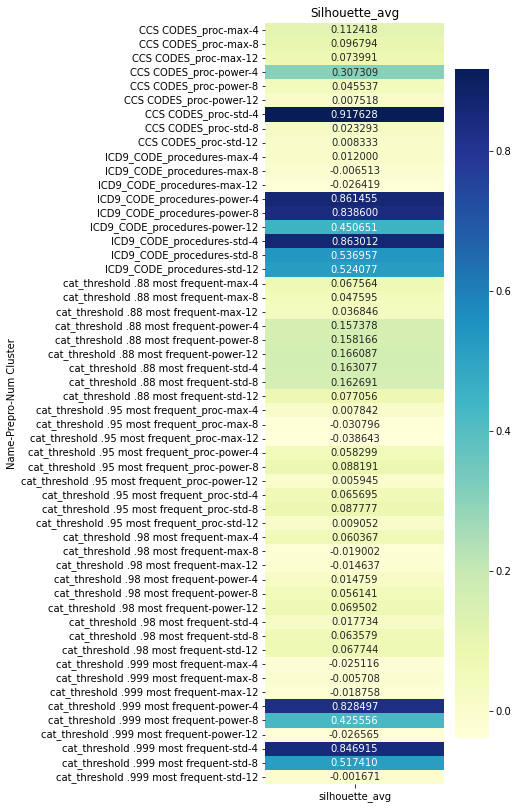

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Pivot the DataFrame for the heatmap
pivot_df = df.pivot_table(
    index=["Name", "Prepro", "Num Cluster"], values="silhouette_avg"
)

plt.figure(figsize=(4, 14))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt=".6f")
plt.title("Silhouette_avg")
plt.show()

{'Unnamed: 0': [8, 3, 4, 2, 1, 5, 0, 7, 6, 13, 11, 14, 12, 17, 10, 16, 9, 15, 21, 22, 23, 26, 20, 25, 19, 18, 24, 32, 30, 31, 29, 35, 28, 34, 33, 27, 39, 41, 40, 38, 44, 43, 37, 36, 42, 47, 48, 46, 45, 50, 49, 52, 53, 51], 'Name': ['ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .999', 'threshold .999', 'threshold .999', 'threshold .999', 'th

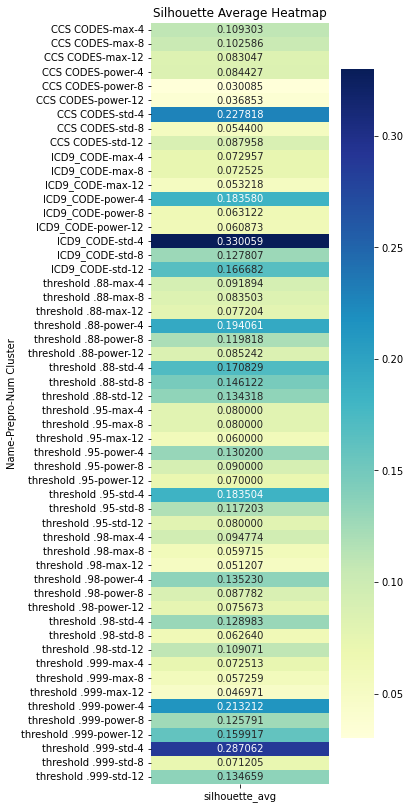

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = df_p.to_dict(orient="list")
print(data)

df = pd.DataFrame(data)

# Pivot the DataFrame for the heatmap
pivot_df = df.pivot_table(
    index=["Name", "Prepro", "Num Cluster"], values="silhouette_avg"
)

plt.figure(figsize=(4, 14))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt=".6f")
plt.title("Silhouette Average Heatmap")
plt.show()

{'Unnamed: 0': [8, 3, 4, 2, 1, 5, 0, 7, 6, 13, 11, 14, 12, 17, 10, 16, 9, 15, 21, 22, 23, 26, 20, 25, 19, 18, 24, 32, 30, 31, 29, 35, 28, 34, 33, 27, 39, 41, 40, 38, 44, 43, 37, 36, 42, 47, 48, 46, 45, 50, 49, 52, 53, 51], 'Name': ['ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'ICD9_CODE', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'CCS CODES', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .95', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .88', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .98', 'threshold .999', 'threshold .999', 'threshold .999', 'threshold .999', 'th

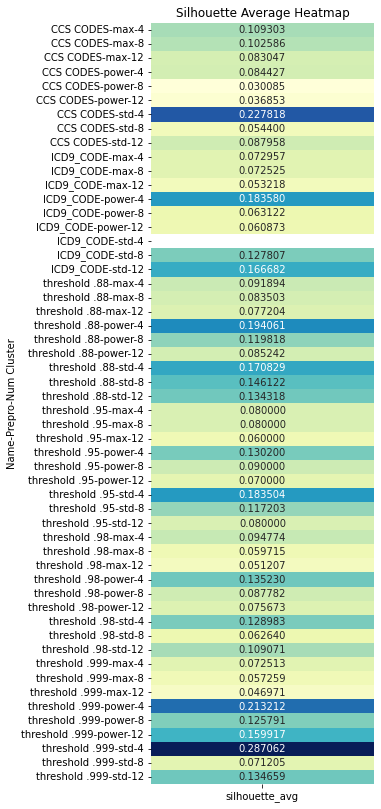

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = df_p.to_dict(orient="list")
print(data)

df = pd.DataFrame(data)

# Pivot the DataFrame for the heatmap
pivot_df = df.pivot_table(
    index=["Name", "Prepro", "Num Cluster"], values="silhouette_avg"
)

# Find the highest score
max_score = pivot_df.max().max()

# Create a mask to highlight the highest score
mask = pivot_df == max_score

plt.figure(figsize=(4, 14))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt=".6f", mask=mask, cbar=False)
plt.title("Silhouette Average Heatmap")
plt.show()

In [92]:
# df_metric = pd.read_csv("/Users/cgarciay/Desktop/Laval_Master_Computer/research/metricas_clustering_mapeo_visit.csv")
df_metric = pd.read_csv(
    "/Users/cgarciay/Desktop/Laval_Master_Computer/research/metricas_clustering_mapeo_patient.csv"
)

In [93]:
df_metric.iloc[:, 1:]

Name  silhouette_avg  davies_bouldin_avg
0                  ICD9_CODE_procedures        0.216942            4.943148
1                        CCS CODES_proc        0.115206            3.841247
2  cat_threshold .95 most frequent_proc        0.091119            5.995203
3       cat_threshold .88 most frequent        0.134393            4.668190
4       cat_threshold .98 most frequent        0.082390            5.993767
5      cat_threshold .999 most frequent        0.072289            6.498342

{'Unnamed: 0': [0, 1, 2, 3, 4, 5], 'Name': ['ICD9_CODE_procedures', 'CCS CODES_proc', 'cat_threshold .95 most frequent_proc', 'cat_threshold .88 most frequent', 'cat_threshold .98 most frequent', 'cat_threshold .999 most frequent'], 'silhouette_avg': [0.2169421244905894, 0.1152061908074735, 0.0911189890628801, 0.1343934805682334, 0.0823900082438967, 0.0722891372312564], 'davies_bouldin_avg': [4.943147797097913, 3.8412472408337095, 5.995202922617511, 4.668189963069727, 5.993767393457838, 6.498342148572914]}


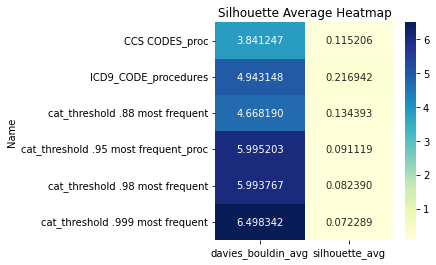

In [94]:
data = df_metric.to_dict(orient="list")
print(data)

df = pd.DataFrame(data)

# Pivot the DataFrame for the heatmap
pivot_df = df.pivot_table(
    index=[
        "Name",
    ],
    values=["silhouette_avg", "davies_bouldin_avg"],
)

plt.figure(figsize=(4, 4))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt=".6f")
plt.title("Silhouette Average Heatmap")
plt.show()

# PREDICTIONS OF READMISSION

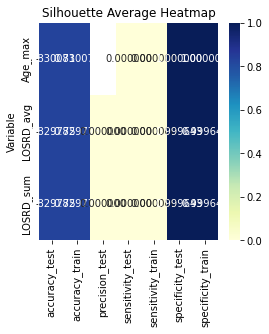

<Figure size 432x288 with 0 Axes>

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (the provided DataFrame)
data = {
    "Variable": ["Age_max", "LOSRD_sum", "LOSRD_avg"],
    "sensitivity_test": [0.0, 0.0, 0.0],
    "specificity_test": [1.0, 0.999643, 0.999643],
    "precision_test": [None, 0.0, 0.0],
    "accuracy_test": [0.830071, 0.829775, 0.829775],
    "sensitivity_train": [0.0, 0.0, 0.0],
    "specificity_train": [1.0, 0.999643, 0.999643],
    "accuracy_train": [0.830071, 0.829775, 0.829775],
}

df = pd.DataFrame(data)

# Set 'Variable' as the index
df.set_index("Variable", inplace=True)
pivot_df = df.pivot_table(
    index=[
        "Variable",
    ],
    values=[i for i in df if i != "Variable"],
)


plt.figure(figsize=(4, 4))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu", fmt=".6f")
plt.title("Silhouette Average Heatmap")
plt.show()
plt.savefig("fig.png")

In [109]:
df


sensitivity_test  specificity_test  precision_test  accuracy_test  \
Variable                                                                       
Age_max                 0.0          1.000000             NaN       0.830071   
LOSRD_sum               0.0          0.999643             0.0       0.829775   
LOSRD_avg               0.0          0.999643             0.0       0.829775   

           sensitivity_train  specificity_train  accuracy_train  
Variable                                                         
Age_max                  0.0           1.000000        0.830071  
LOSRD_sum                0.0           0.999643        0.829775  
LOSRD_avg                0.0           0.999643        0.829775

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data setup (assuming the data is stored in a DataFrame named 'df')
data = {
    "Variable": ["X1", "X2"],
    "sensitivity_test": [0.0, 0.0],
    "specificity_test": [1.0, 1.0],
    "precision_test": [None, None],
    "accuracy_test": [0.830071, 0.830071],
    "sensitivity_train": [0.0, 0.0],
    "specificity_train": [1.0, 1.0],
    "precision_train": [None, None],
    "accuracy_train": [0.830071, 0.830071],
}

df = pd.DataFrame(data)

df

Variable  sensitivity_test  specificity_test precision_test  accuracy_test  \
0       X1               0.0               1.0           None       0.830071   
1       X2               0.0               1.0           None       0.830071   

   sensitivity_train  specificity_train precision_train  accuracy_train  
0                0.0                1.0            None        0.830071  
1                0.0                1.0            None        0.830071

In [103]:
pivot_df


Test Error  Training Error  accuracy_test  accuracy_train  \
Variable                                                               
Age_max      0.169929        0.181124       0.830071        0.830071   
LOSRD_avg    0.170225        0.181198       0.829775        0.829775   
LOSRD_sum    0.170225        0.181346       0.829775        0.829775   

           precision_test  sensitivity_test  sensitivity_train  \
Variable                                                         
Age_max               NaN               0.0                0.0   
LOSRD_avg             0.0               0.0                0.0   
LOSRD_sum             0.0               0.0                0.0   

           specificity_test  specificity_train  
Variable                                        
Age_max            1.000000           1.000000  
LOSRD_avg          0.999643           0.999643  
LOSRD_sum          0.999643           0.999643

In [141]:
df_metric.columns


Index(['Unnamed: 0', 'Classifiers', 'sensitivity', 'specificity', 'precision',
       'accuracy', 'mean_auc', 'confusion matrix', 'Sampling',
       'Feature selection', 'f1', 'f1_train', 'sensitivity_train',
       'specificity_train', 'precision_train', 'accuracy_train', 'Mapping'],
      dtype='object')

In [140]:
df_metric["Classifiers"].unique()

array(['LogisticRegression', 'XGBClassifier'], dtype=object)

# Vis for results readmission

In [106]:
days = "30"

ruta2 = "/Users/cgarciay/Desktop/Laval_Master_Computer/research/results_pred/"
ar = "results_prediction_30+_realv3.csv"
archivo = "results_prediction_" + days + "+non_filtered.csv"
archivo2 = "results_prediction_" + days + "+_realv2.csv"
df_metric = pd.read_csv(ruta2 + ar)
df_metric2 = pd.read_csv(ruta2 + archivo2)
df_metric.head()
are_identical = df_metric.equals(df_metric2)
are_identical

False

In [19]:
days = "30"
archivo = "results_prediction_" + days + "+non_filtered.csv"
ruta2 = "results_pred/"
df_metric = pd.read_csv(ruta2+archivo)

In [7]:
df_metric.shape

(32, 18)

In [9]:
df_metric.drop_duplicates().shape

(32, 18)

In [11]:
df_metric = df_metric[df_metric["Sampling"] == "non"]

In [12]:
df_metric["Mapping"] = df_metric["Mapping"].replace("CCS CODES_proc.csv", "CCS CODES")
df_metric["Mapping"] = df_metric["Mapping"].replace(
    "ICD9_CODE_procedures.csv", "ICD9_CODE"
)
df_metric["Mapping"] = df_metric["Mapping"].replace(
    "cat_threshold .88 most frequent.csv", "threshold .88"
)
df_metric["Mapping"] = df_metric["Mapping"].replace(
    "cat_threshold .999 most frequent.csv", "threshold .999"
)
df_metric["Mapping"] = df_metric["Mapping"].replace(
    "cat_threshold .98 most frequent.csv", "threshold .98"
)
df_metric["Mapping"] = df_metric["Mapping"].replace(
    "cat_threshold .95 most frequent_proc.csv", "threshold .95"
)
df_metric["Mapping"] = df_metric["Mapping"].replace("sin_codigo.csv", "No ICD9-Code")
df_metric["Classifiers"] = df_metric["Classifiers"].replace("LogisticRegression", "LG")
df_metric["Classifiers"] = df_metric["Classifiers"].replace("XGBClassifier", "XGB")
df_metric["Classifiers"] = df_metric["Classifiers"].replace("XGBClassifier", "XGB")
df_metric["Sampling"] = df_metric["Sampling"].replace("non", "n")
df_metric["Sampling"] = df_metric["Sampling"].replace("over", "o")
df_metric["Feature selection"] = df_metric["Feature selection"].replace(True, "T")
df_metric["Feature selection"] = df_metric["Feature selection"].replace(False, "F")

/var/folders/xn/hrsr6_j92psb5bqf9kjzwv8w0000gp/T/ipykernel_28006/1954500360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["Mapping"] = df_metric["Mapping"].replace("CCS CODES_proc.csv", "CCS CODES")
/var/folders/xn/hrsr6_j92psb5bqf9kjzwv8w0000gp/T/ipykernel_28006/1954500360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["Mapping"] = df_metric["Mapping"].replace(
/var/folders/xn/hrsr6_j92psb5bqf9kjzwv8w0000gp/T/ipykernel_28006/1954500360.py:5: SettingWithCopyWarning: 
A value i

In [20]:
df_metric["Mapping"].unique()


array(['sin_codigo.csv',
       'cat_threshold .88 most frequent_outs_visit_non_filtered.csv',
       'cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv',
       'cat_threshold .999 most frequent_outs_visit_non_filtered.csv'],
      dtype=object)

In [14]:
df_metric["Mapping"] = df_metric["Mapping"].replace(
    "CCS CODES_proc_v2.csv", "CCS CODES"
)
df_metric["Mapping"] = df_metric["Mapping"].replace(
    "ICD9_CODE_procedures_v2.csv", "ICD9_CODE"
)
df_metric["Mapping"] = df_metric["Mapping"].replace(
    "cat_threshold .88 most frequent_v2.csv", "threshold .88"
)
df_metric["Mapping"] = df_metric["Mapping"].replace(
    "cat_threshold .999 most frequent_v2.csv", "threshold .999"
)
df_metric["Mapping"] = df_metric["Mapping"].replace(
    "cat_threshold .98 most frequent_v2.csv", "threshold .98"
)
df_metric["Mapping"] = df_metric["Mapping"].replace(
    "cat_threshold .95 most frequent_proc_v2.csv", "threshold .95"
)
df_metric["Mapping"] = df_metric["Mapping"].replace("sin_codigo_v2.csv", "No ICD9-Code")
df_metric["Classifiers"] = df_metric["Classifiers"].replace("LogisticRegression", "LG")
df_metric["Classifiers"] = df_metric["Classifiers"].replace("XGBClassifier", "XGB")
df_metric["Classifiers"] = df_metric["Classifiers"].replace("XGBClassifier", "XGB")
df_metric["Sampling"] = df_metric["Sampling"].replace("non", "n")
df_metric["Sampling"] = df_metric["Sampling"].replace("over", "o")
df_metric["Feature selection"] = df_metric["Feature selection"].replace(True, "T")
df_metric["Feature selection"] = df_metric["Feature selection"].replace(False, "F")

/var/folders/xn/hrsr6_j92psb5bqf9kjzwv8w0000gp/T/ipykernel_28006/2856363129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["Mapping"] = df_metric["Mapping"].replace(
/var/folders/xn/hrsr6_j92psb5bqf9kjzwv8w0000gp/T/ipykernel_28006/2856363129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric["Mapping"] = df_metric["Mapping"].replace(
/var/folders/xn/hrsr6_j92psb5bqf9kjzwv8w0000gp/T/ipykernel_28006/2856363129.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [15]:
df_metric.head()


Unnamed: 0   f1_test  f1_train  sensitivity_test  specificity_test  \
0           0  0.484625  0.484625          0.000000          0.999979   
1           1  0.484625  0.484625          0.000000          0.999979   
4           4  0.486049  0.583079          0.001658          0.999054   
5           5  0.486049  0.583079          0.001658          0.999054   
8           0  0.484604  0.484781          0.000000          0.999895   

   precision_test  accuracy_test  sensitivity_train  specificity_train  \
0             0.0       0.940334           0.000000           0.999979   
1             0.0       0.940334           0.000000           0.999979   
4             0.1       0.939563           0.107427           0.999900   
5             0.1       0.939563           0.107427           0.999900   
8             0.0       0.940255           0.000166           0.999932   

   precision_train  accuracy_train                 confusion matrix Sampling  \
0         0.000000        0.940334  [[47548     1]\n [ 3016     0]]        n   
1         0.000000        0.940334  [[47548     1]\n [ 3016     0]]        n   
4         0.985551        0.946668  [[47504    45]\n [ 3011     5]]        n   
5         0.985551        0.946668  [[47504    45]\n [ 3011     5]]        n   
8         0.133333        0.940300  [[47544     5]\n [ 3016     0]]        n   

  Feature selection Classifiers  \
0                 T          LG   
1                 F          LG   
4                 T         XGB   
5                 F         XGB   
8                 T          LG   

                                             Mapping  var_change  var_ini  
0                                       No ICD9-Code           0       12  
1                                       No ICD9-Code           0       12  
4                                       No ICD9-Code           0       12  
5                                       No ICD9-Code           0       12  
8  cat_threshold .88 most frequent_outs_visit_non...          41      227

FileNotFoundError: [Errno 2] No such file or directory: './images/metrics30.png'

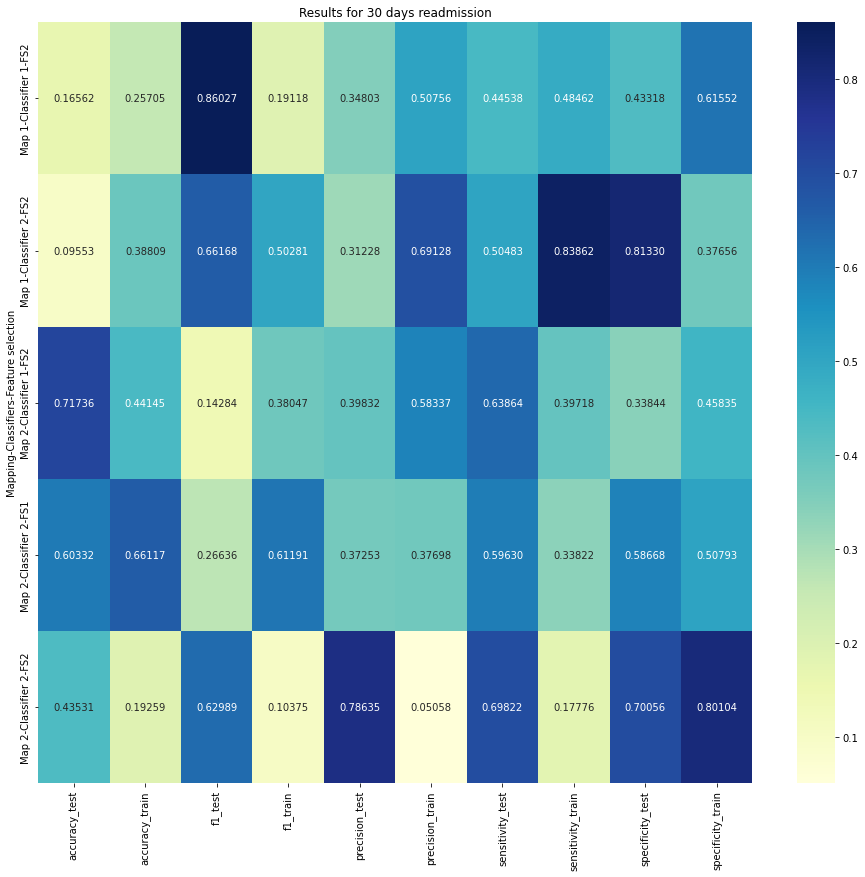

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame(data)

# Pivot the DataFrame for the heatmap
pivot_df = df.pivot_table(
    index=["Mapping", "Classifiers", "Feature selection"],
    values=[
        "sensitivity_test",
        "specificity_test",
        "precision_test",
        "accuracy_test",
        "f1_test",
        "f1_train",
        "sensitivity_train",
        "specificity_train",
        "precision_train",
        "accuracy_train",
    ],
)


plt.figure(figsize=(16, 14))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True, fmt=".5f")
plt.title("Results for " + days + " days readmission")
plt.savefig("./images/metrics" + days + ".png")
plt.show()

In [18]:
df_metric["Mapping"].unique()


array(['No ICD9-Code',
       'cat_threshold .88 most frequent_outs_visit_non_filtered.csv',
       'cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv',
       'cat_threshold .999 most frequent_outs_visit_non_filtered.csv'],
      dtype=object)

FileNotFoundError: [Errno 2] No such file or directory: './images/metrics30.png'

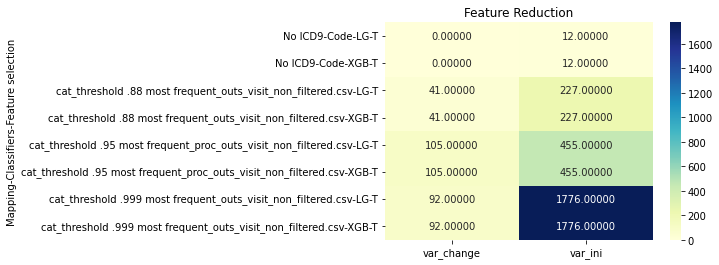

In [17]:
df = df_metric[df_metric["Feature selection"] == "T"]

# Pivot the DataFrame for the heatmap
pivot_df = df.pivot_table(
    index=["Mapping", "Classifiers", "Feature selection"],
    values=["var_change", "var_ini"],
)


plt.figure(figsize=(6, 4))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True, fmt=".5f")
plt.title("Feature Reduction")
plt.savefig("./images/metrics" + days + ".png")
plt.show()

In [27]:
df.head()


Unnamed: 0   f1_test  f1_train  sensitivity_test  specificity_test  \
0           0  0.502073  0.509306          0.106694          0.960017   
1           1  0.502037  0.508979          0.106694          0.959933   
2           2  0.502073  0.509306          0.106694          0.960017   
3           3  0.502037  0.508979          0.106694          0.959933   
4           4  0.582009  0.775215          0.243666          0.919367   

   precision_test  accuracy_test  sensitivity_train  specificity_train  \
0        0.519038       0.714294           0.115088           0.960746   
1        0.518519       0.714235           0.114779           0.960579   
2        0.519038       0.714294           0.115088           0.960746   
3        0.518519       0.714235           0.114779           0.960579   
4        0.549977       0.724792           0.513234           0.975573   

   precision_train  accuracy_train                 confusion matrix Sampling  \
0         0.542476        0.717230  [[11525   480]\n [ 4337   518]]        n   
1         0.540757        0.717023  [[11524   481]\n [ 4337   518]]        n   
2         0.542476        0.717230  [[11525   480]\n [ 4337   518]]        o   
3         0.540757        0.717023  [[11524   481]\n [ 4337   518]]        o   
4         0.894704        0.842438  [[11037   968]\n [ 3672  1183]]        n   

  Feature selection Classifiers        Mapping       Concat_name  
0                 T          LG  threshold .98   threshold .98LG  
1                 F          LG  threshold .98   threshold .98LG  
2                 T          LG  threshold .98   threshold .98LG  
3                 F          LG  threshold .98   threshold .98LG  
4                 T         XGB  threshold .98  threshold .98XGB

In [117]:
df["Concat_name"] = df["Mapping"] + df["Classifiers"]

/var/folders/xn/hrsr6_j92psb5bqf9kjzwv8w0000gp/T/ipykernel_76876/2258360349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Concat_name"] = df["Mapping"]+ df["Classifiers"]


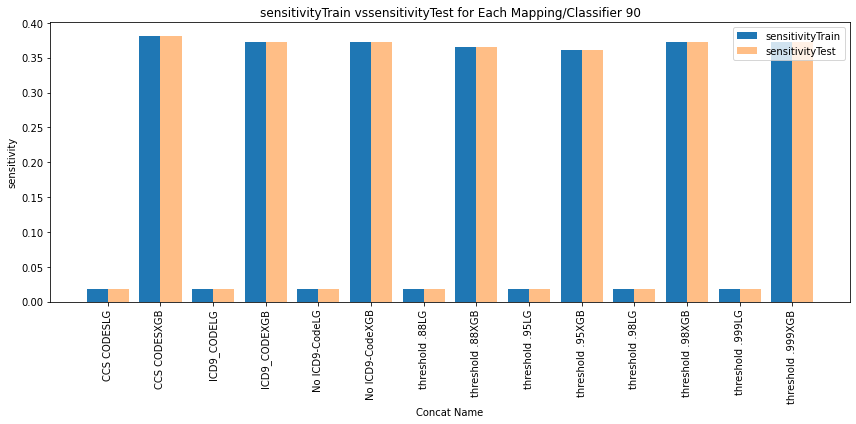

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Given DataFrame

o = "sensitivity"
# o = "specificity"
# o = "accuracy"
# o = "precision"
# Generate positions for the bars


highest_sensitivity_idx = df.groupby("Concat_name")[o + "_train"].idxmax()

# Filter the DataFrame with the rows having the highest sensitivity_train
highest_sensitivity_rows = df.loc[highest_sensitivity_idx]
highest_sensitivity_rows
# Bar plot
positions = range(len(highest_sensitivity_rows))
plt.figure(figsize=(12, 6))
plt.bar(positions, highest_sensitivity_rows[o + "_train"], width=0.4, label=o + "Train")
plt.bar(
    [pos + 0.4 for pos in positions],
    highest_sensitivity_rows[o + "_train"],
    width=0.4,
    label=o + "Test",
    alpha=0.5,
)
plt.xticks(
    [pos + 0.2 for pos in positions],
    highest_sensitivity_rows["Concat_name"],
    rotation=90,
)
plt.xlabel("Concat Name")
plt.ylabel(o)
plt.title(o + "Train vs" + o + "Test for Each Mapping/Classifier " + days)
plt.legend()
plt.tight_layout()
plt.savefig("./images/Sensitivity_Bar_Plot" + o + ".png")
plt.show()

Unnamed: 0   f1_test  f1_train  sensitivity_test  specificity_test  \
24           0  0.471081  0.484889          0.063852          0.975260   
26           2  0.503579  0.634577          0.107724          0.961516   
20           0  0.493399  0.573228          0.109784          0.934027   
22           2  0.492989  0.593260          0.091040          0.969763   
0            0  0.422004  0.421890          0.006385          0.997334   
2            2  0.486900  0.596171          0.086715          0.964015   
16           0  0.480887  0.490905          0.075386          0.973761   
18           2  0.498301  0.647629          0.103399          0.957601   
12           0  0.488138  0.513914          0.089392          0.961433   
14           2  0.496702  0.606344          0.097219          0.966014   
8            0  0.494192  0.536996          0.104840          0.945190   
10           2  0.494421  0.597447          0.093924          0.967264   
4            0  0.494278  0.571131          0.110402          0.934944   
6            2  0.492989  0.594004          0.091040          0.969763   

    precision_test  accuracy_test  sensitivity_train  specificity_train  \
24        0.510708       0.712811           0.077034           0.980154   
26        0.530964       0.715658           0.256694           0.993232   
20        0.402264       0.696679           0.192894           0.967430   
22        0.549068       0.716726           0.200669           0.992649   
0         0.492063       0.711981           0.006334           0.997105   
2         0.493552       0.711388           0.203656           0.993753   
16        0.537445       0.715065           0.084552           0.978446   
18        0.496538       0.711625           0.275747           0.992961   
12        0.483835       0.710320           0.113955           0.973095   
14        0.536364       0.715836           0.218332           0.992357   
8         0.436161       0.703203           0.146447           0.966035   
10        0.537102       0.715777           0.206231           0.992607   
4         0.406986       0.697509           0.189856           0.967722   
6         0.549068       0.716726           0.201648           0.992649   

    precision_train  accuracy_train                 confusion matrix Sampling  \
24         0.610862        0.720092  [[11708   297]\n [ 4545   310]]        n   
26         0.938795        0.781139  [[11543   462]\n [ 4332   523]]        n   
20         0.705461        0.744395  [[11213   792]\n [ 4322   533]]        n   
22         0.916941        0.764591  [[11642   363]\n [ 4413   442]]        n   
0          0.469466        0.711803  [[11973    32]\n [ 4824    31]]        n   
2          0.929495        0.766237  [[11573   432]\n [ 4434   421]]        n   
16         0.613373        0.721041  [[11690   315]\n [ 4489   366]]        n   
18         0.940629        0.786432  [[11496   509]\n [ 4353   502]]        n   
12         0.631384        0.725697  [[11542   463]\n [ 4421   434]]        n   
14         0.920339        0.769469  [[11597   408]\n [ 4383   472]]        n   
8          0.635531        0.730027  [[11347   658]\n [ 4346   509]]        n   
10         0.918578        0.766163  [[11612   393]\n [ 4399   456]]        n   
4          0.704029        0.743728  [[11224   781]\n [ 4319   536]]        n   
6          0.917311        0.764872  [[11642   363]\n [ 4413   442]]        n   

   Feature selection Classifiers         Mapping        Concat_name  
24             lasso          LG       CCS CODES        CCS CODESLG  
26             lasso         XGB       CCS CODES       CCS CODESXGB  
20             lasso          LG       ICD9_CODE        ICD9_CODELG  
22             lasso         XGB       ICD9_CODE       ICD9_CODEXGB  
0              lasso          LG    No ICD9-Code     No ICD9-CodeLG  
2              lasso         XGB    No ICD9-Code    No ICD9-CodeXGB  
16             lasso          LG   threshold .88    threshold

In [241]:
highest_sensitivity_idx


Classifiers
LG     20
XGB    18
Name: sensitivity_train, dtype: int64

# changes

In [177]:
import ast


def string_list(x):
    """funcion que se convierte una lista de string a una lista normal"""
    """Input '["\'44\'", "\'44\'", "\'50\'", "\'193\'", "\'222\'", "\'222\'", "\'222\'"]'
    x: string as list
    Output
    list: list"""

    try:
        lista = ast.literal_eval(x)
    except:
        lista = np.nan
    return lista

In [185]:
df = pd.read_csv("./data/data_preprocess_non_filtered.csv")

df.columns


Index(['Unnamed: 0', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'GENDER', 'EXPIRE_FLAG', 'DOB', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'LOSRD', 'age', 'year_age', 'ICD9_CODE_procedures',
       'CCS CATEGORY DESCRIPTION_proc', 'CCS CODES_proc',
       'cat_threshold .95 most frequent_proc'],
      dtype='object')

In [21]:
def obtener_ghist(i, df, df1, nam_p, v, real, filtered):
    real = real
    if nam_p == "Threshold":
        # nuevo_df2_gen = desconacat_codes(df,real)
        # nuevo_df_x  = nuevo_df2_gen.copy()
        nuevo_df_x = desconacat_codes(df, "ICD9_CODE_procedures", filtered)
        nuevo_df4 = desconacat_codes(df1, real, filtered)
        # print(nuevo_df2_gen.SUBJECT_ID.nunique())

    else:
        # nuevo_df2_gen = desconacat_codes(df,real)
        # nuevo_df_x  = nuevo_df2_gen.copy()
        nuevo_df_x = desconacat_codes(df, "ICD9_CODE_procedures", filtered)
        nuevo_df4 = desconacat_codes(df, real, filtered)

        # print(nuevo_df2_gen.SUBJECT_ID.nunique())
    nuevo_df_x = nuevo_df_x.sort_values(by=["SUBJECT_ID", "HADM_ID"])
    nuevo_df4 = nuevo_df4.sort_values(by=["SUBJECT_ID", "HADM_ID"])

    duplicados = pd.concat(
        [nuevo_df4.reset_index(), nuevo_df_x["ICD9_CODE_procedures"]], axis=1
    )
    # merged_df = pd.merge(nuevo_df4, nuevo_df_x, on=["SUBJECT_ID","HADM_ID"], how='left')

    # duplicados = pd.merge(nuevo_df_x.reset_index(),nuevo_df4.reset_index(), on=["SUBJECT_ID","HADM_ID",], how='left')
    # realizar una fFUNCION QUE ME AYUDE A LIMPIAR PREPROCESINGG DE real preprocess porque corata 30% de datos
    nuevo_df4[real + "_preprocess"] = nuevo_df4[real + "_preprocess"].replace(
        "Otro", -1
    )
    duplicados[real + "_preprocess"] = duplicados[real + "_preprocess"].replace(
        "Otro", -1
    )
    duplicados["ICD9_CODE_procedures"] = duplicados["ICD9_CODE_procedures"].replace(
        "Otro", -1
    )

    if real == "cat_threshold .95 most frequent_proc":
        name = name2 = real

        duplicados[name2 + "_preprocess"] = duplicados[name2 + "_preprocess"].apply(
            lambda x: pd.to_numeric(x, errors="coerce")
        )
        duplicados = duplicados[duplicados[name2 + "_preprocess"].notnull()]

    elif real == "CCS CODES_proc":
        name = real
        duplicados[name + "_preprocess"] = [
            item.replace("'", "") for item in duplicados["CCS CODES_proc_preprocess"]
        ]

        duplicados[name + "_preprocess"] = duplicados[name + "_preprocess"].apply(
            lambda x: pd.to_numeric(x, errors="coerce")
        )
        duplicados = duplicados[duplicados[name + "_preprocess"].notnull()]

    elif nam_p == "Threshold":
        name2 = real

        duplicados[name2 + "_preprocess"] = duplicados[name2 + "_preprocess"].apply(
            lambda x: pd.to_numeric(x, errors="coerce")
        )
        duplicados = duplicados[duplicados[name2 + "_preprocess"].notnull()]

    return duplicados

In [ ]:
obtener_ghist(i, df, df1, nam_p, v, real, filtered)

In [1]:

from function_mapping import *
%load_ext autoreload
%autoreload 2

df = pd.read_csv("./data/data_preprocess_non_filtered.csv")
pd.set_option('display.max_columns', None)

# Lectures of dataframe that have the procedures icd-9 codes with different threshold
proc = pd.read_csv("./data/procedures_preprocess_threshold_nonfiltered.csv")
grouped = proc.groupby(['SUBJECT_ID', 'HADM_ID']).agg(lambda x: x.tolist())

# Reset
# the index to make 'SUBJECT_ID' and 'HADM_ID' regular columns
grouped_proc = grouped.reset_index()
df1 = grouped_proc.copy()

list_cat = ['CCS CODES_proc', 'cat_threshold .95 most frequent_proc', 'cat_threshold .88 most frequent', 'cat_threshold .98 most frequent',
            'cat_threshold .999 most frequent']

categorical_cols = ['ADMISSION_TYPE', 'ADMISSION_LOCATION',
                    'DISCHARGE_LOCATION', 'INSURANCE',  'RELIGION',
                    'MARITAL_STATUS', 'ETHNICITY', 'GENDER']


nam_p_list = ['CCS CODES_proc', 'cat_threshold .95 most frequent_proc', 'Threshold', 'Threshold',
              'Threshold']

filtered = True
v = "patient"


result_stat = {'Name': [],
               'count': [],
               'mean': [],
               'std': [],
               'min': [],
               '25%': [],
               '50%': [],
               '75%': [],
               'max': [],
               "Min >": [],
               "Unique_codes": [],
               "Unique_codes_icd9": []}

for i in range(len(list_cat)):
    nam_p = nam_p_list[i]
    real = list_cat[i]
    changes_per_patient, real, unique_icd9, unique_r = calculare_changes(
        i, df, df1, nam_p, v, real, filtered)
    auc_d = create_results(result_stat, changes_per_patient,
                           real, unique_r, unique_icd9)

    for key in auc_d:
        result_stat[key].append(auc_d[key])


df_res = pd.DataFrame(result_stat)
df_res.to_csv("./results_changes/"+v+"_nonfiltered.csv")


KeyboardInterrupt: 

In [204]:
df.HADM_ID.nunique()


58976

In [198]:
df_res.to_csv("./results_changes/" + v + "_nonfiltered.csv")

In [179]:
nuevo_df2_gen.head()


SUBJECT_ID  HADM_ID  ICD9_CODE_procedures
0          22   165315                  9671
1          22   165315                  9604
2          22   165315                  9634
3          23   152223                  3613
4          23   152223                  3615

In [ ]:
# visit level*


In [36]:
archivo = "visit_nonfiltered.csv"
ruta = "./results_changes/"
cpatient = pd.read_csv(ruta + archivo)

cpatient["% Codes"] = cpatient["Unique_codes"] / cpatient["Unique_codes_icd9"]
cpatient = cpatient.rename(columns={"Unnamed: 3": "% Change"})
cpatient["% Change"] = cpatient["count"] / 52243.0

cpatient["Name"] = cpatient["Name"].replace("CODES_proc", "CCS CODES")
cpatient["Name"] = cpatient["Name"].replace(
    "cat_threshold .95 most frequent_proc", "threshold .95"
)
cpatient["Name"] = cpatient["Name"].replace(
    "cat_threshold .88 most frequent", "threshold .88"
)
cpatient["Name"] = cpatient["Name"].replace(
    "cat_threshold .999 most frequent", "threshold .999"
)
cpatient["Name"] = cpatient["Name"].replace(
    "cat_threshold .98 most frequent", "threshold .98"
)
cpatient.columns

Index(['Unnamed: 0', 'Name', 'count', 'mean', 'std', 'min', '25%', '50%',
       '75%', 'max', 'Min >', 'Unique_codes', 'Unique_codes_icd9', '% Codes',
       '% Change'],
      dtype='object')

In [226]:
cpatient


Unnamed: 0            Name    count      mean       std  min  25%  50%  \
0           0  CCS CODES_proc  42214.0  5.686194  5.620025  1.0  2.0  4.0   
1           1   threshold .95   7449.0  1.616459  1.216452  1.0  1.0  1.0   
2           2   threshold .88  13905.0  2.080403  1.773861  1.0  1.0  1.0   
3           3   threshold .98   3425.0  1.403796  0.898231  1.0  1.0  1.0   
4           4  threshold .999    229.0  1.052402  0.223324  1.0  1.0  1.0   

   75%   max  Min >  Unique_codes  Unique_codes_icd9   % Codes  % Change  
0  7.0  98.0    1.0           221               2009  0.110005  0.808032  
1  2.0  26.0    1.0           444               2009  0.221005  0.142584  
2  2.0  37.0    1.0           216               2009  0.107516  0.266160  
3  1.0  10.0    1.0           752               2009  0.374316  0.065559  
4  1.0   2.0    1.0          1773               2009  0.882529  0.004383

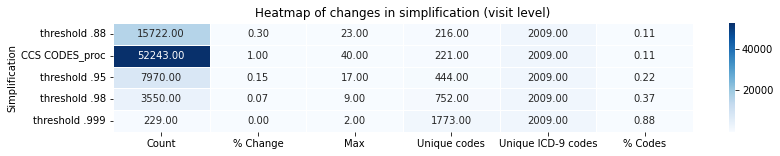

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

df = cpatient[
    ["Name", "count", "% Change", "max", "Unique_codes", "Unique_codes_icd9", "% Codes"]
].sort_values(by="Unique_codes")

df = df.rename(
    columns={
        "Unique_codes": "Unique codes",
        "Unique_codes_icd9": "Unique ICD-9 codes",
        "max": "Max",
        "count": "Count",
    }
)
# Set 'Name' column as index
df.set_index("Name", inplace=True)

# Create a custom color palette with different shades of blue
cmap = sns.color_palette("Blues", as_cmap=True)

# Create a heatmap
plt.figure(figsize=(13, 2))
sns.heatmap(df, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.title("Heatmap of changes in simplification (visit level)")

# Modify the y-axis label name
plt.ylabel("Simplification")

plt.show()

# Visit

In [39]:
archivo = "patient_nonfiltered.csv"
ruta = "./results_changes/"
cpatient = pd.read_csv(ruta + archivo)

cpatient["% Codes"] = cpatient["Unique_codes"] / cpatient["Unique_codes_icd9"]
cpatient = cpatient.rename(columns={"change": "% Change"})
cpatient["% Change"] = cpatient["count"] / 42214.0

cpatient["Name"] = cpatient["Name"].replace("CODES_proc", "CCS CODES")
cpatient["Name"] = cpatient["Name"].replace(
    "cat_threshold .95 most frequent_proc", "threshold .95"
)
cpatient["Name"] = cpatient["Name"].replace(
    "cat_threshold .88 most frequent", "threshold .88"
)
cpatient["Name"] = cpatient["Name"].replace(
    "cat_threshold .999 most frequent", "threshold .999"
)
cpatient["Name"] = cpatient["Name"].replace(
    "cat_threshold .98 most frequent", "threshold .98"
)
cpatient.columns

Index(['Unnamed: 0', 'Name', 'count', 'mean', 'std', 'min', '25%', '50%',
       '75%', 'max', 'Min >', 'Unique_codes', 'Unique_codes_icd9', '% Codes',
       '% Change'],
      dtype='object')

In [222]:
cpatient


Unnamed: 0            Name    count      mean       std  min  25%  50%  \
0           0  CCS CODES_proc  42214.0  5.686194  5.620025  1.0  2.0  4.0   
1           1   threshold .95   7449.0  1.616459  1.216452  1.0  1.0  1.0   
2           2   threshold .88  13905.0  2.080403  1.773861  1.0  1.0  1.0   
3           3   threshold .98   3425.0  1.403796  0.898231  1.0  1.0  1.0   
4           4  threshold .999    229.0  1.052402  0.223324  1.0  1.0  1.0   

   75%   max  Min >  Unique_codes  Unique_codes_icd9   % Codes  % Change  
0  7.0  98.0    1.0           221               2009  0.110005  1.000000  
1  2.0  26.0    1.0           444               2009  0.221005  0.176458  
2  2.0  37.0    1.0           216               2009  0.107516  0.329393  
3  1.0  10.0    1.0           752               2009  0.374316  0.081134  
4  1.0   2.0    1.0          1773               2009  0.882529  0.005425

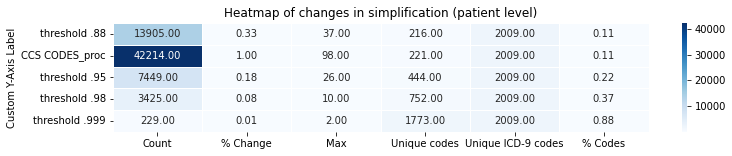

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = cpatient[
    ["Name", "count", "% Change", "max", "Unique_codes", "Unique_codes_icd9", "% Codes"]
].sort_values(by="Unique_codes")

df1 = df1.rename(
    columns={
        "Unique_codes": "Unique codes",
        "Unique_codes_icd9": "Unique ICD-9 codes",
        "max": "Max",
        "count": "Count",
    }
)
# Set 'Name' column as index
df1.set_index("Name", inplace=True)

# Create a custom color palette with shades of blue
cmap = sns.color_palette("Blues", as_cmap=True)

# Create a heatmap
plt.figure(figsize=(12, 2))
sns.heatmap(df1, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5)
plt.title("Heatmap of changes in simplification (patient level)")


# Modify the y-axis label
plt.ylabel("Custom Y-Axis Label")

plt.show()

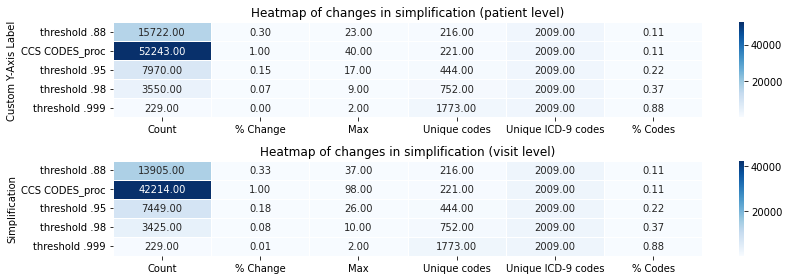

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a custom color palette with shades of blue
cmap = sns.color_palette("Blues", as_cmap=True)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=2, figsize=(12, 4))

# First Heatmap
sns.heatmap(df, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Heatmap of changes in simplification (patient level)")
axes[0].set_ylabel("Custom Y-Axis Label")

# Second Heatmap
sns.heatmap(df1, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Heatmap of changes in simplification (visit level)")
axes[1].set_ylabel("Simplification")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

# Mutual information

In [138]:
directory_path = "./models_cluster/"
mi_pa = pd.read_csv(directory_path + "output_mi_patient.csv")
mi_pa1 = pd.read_csv(directory_path + "output_vi.csv")
mi_pa = pd.DataFrame(mi_pa.values, columns=["Column1", "Column2", "MI", "RI"])
mi_pa1 = pd.DataFrame(mi_pa1.values, columns=["Column1", "Column2", "MI_vi", "RI_vi"])

In [139]:
mi_pa["Column1"] = mi_pa["Column1"].replace(
    "CCS CODES_proc_outs_visit_non_filtered.csv", "CCS CODES"
)
mi_pa["Column1"] = mi_pa["Column1"].replace(
    "ICD9_CODE_procedures_outs_visit_non_filtered.csv", "ICD-9 CODES"
)
mi_pa["Column2"] = mi_pa["Column2"].replace(
    "CCS CODES_proc_outs_visit_non_filtered.csv", "CCS CODES"
)
mi_pa["Column2"] = mi_pa["Column2"].replace(
    "ICD9_CODE_procedures_outs_visit_non_filtered.csv", "ICD-9 CODES"
)

mi_pa["Column1"] = mi_pa["Column1"].replace(
    "cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv", "threshold .95"
)
mi_pa["Column1"] = mi_pa["Column1"].replace(
    "cat_threshold .88 most frequent_outs_visit_non_filtered.csv", "threshold .88"
)
mi_pa["Column1"] = mi_pa["Column1"].replace(
    "cat_threshold .999 most frequent_outs_visit_non_filtered.csv", "threshold .999"
)
mi_pa["Column1"] = mi_pa["Column1"].replace(
    "cat_threshold .98 most frequent_outs_visit_non_filtered.csv", "threshold .98"
)
mi_pa["Column1"] = mi_pa["Column1"].replace(
    "sin_codigo_non_filtered.csv", "No ICD9-Codes"
)
mi_pa["Column2"] = mi_pa["Column2"].replace(
    "sin_codigo_non_filtered.csv", "No ICD9-Codes"
)
mi_pa["Column2"] = mi_pa["Column2"].replace(
    "cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv", "threshold .95"
)
mi_pa["Column2"] = mi_pa["Column2"].replace(
    "cat_threshold .88 most frequent_outs_visit_non_filtered.csv", "threshold .88"
)
mi_pa["Column2"] = mi_pa["Column2"].replace(
    "cat_threshold .999 most frequent_outs_visit_non_filtered.csv", "threshold .999"
)
mi_pa["Column2"] = mi_pa["Column2"].replace(
    "cat_threshold .98 most frequent_outs_visit_non_filtered.csv", "threshold .98"
)

In [140]:
mi_pa1["Column1"] = mi_pa1["Column1"].replace(
    "CCS CODES_proc_outs_visit_non_filtered.csv", "CCS CODES"
)
mi_pa1["Column1"] = mi_pa1["Column1"].replace(
    "ICD9_CODE_procedures_outs_visit_non_filtered.csv", "ICD-9 CODES"
)
mi_pa1["Column2"] = mi_pa1["Column2"].replace(
    "CCS CODES_proc_outs_visit_non_filtered.csv", "CCS CODES"
)
mi_pa1["Column2"] = mi_pa1["Column2"].replace(
    "ICD9_CODE_procedures_outs_visit_non_filtered.csv", "ICD-9 CODES"
)

mi_pa1["Column1"] = mi_pa1["Column1"].replace(
    "cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv", "threshold .95"
)
mi_pa1["Column1"] = mi_pa1["Column1"].replace(
    "cat_threshold .88 most frequent_outs_visit_non_filtered.csv", "threshold .88"
)
mi_pa1["Column1"] = mi_pa1["Column1"].replace(
    "cat_threshold .999 most frequent_outs_visit_non_filtered.csv", "threshold .999"
)
mi_pa1["Column1"] = mi_pa1["Column1"].replace(
    "cat_threshold .98 most frequent_outs_visit_non_filtered.csv", "threshold .98"
)
mi_pa1["Column1"] = mi_pa1["Column1"].replace(
    "sin_codigo_non_filtered.csv", "No ICD9-Codes"
)
mi_pa1["Column2"] = mi_pa1["Column2"].replace(
    "sin_codigo_non_filtered.csv", "No ICD9-Codes"
)
mi_pa1["Column2"] = mi_pa1["Column2"].replace(
    "cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv", "threshold .95"
)
mi_pa1["Column2"] = mi_pa1["Column2"].replace(
    "cat_threshold .88 most frequent_outs_visit_non_filtered.csv", "threshold .88"
)
mi_pa1["Column2"] = mi_pa1["Column2"].replace(
    "cat_threshold .999 most frequent_outs_visit_non_filtered.csv", "threshold .999"
)
mi_pa1["Column2"] = mi_pa1["Column2"].replace(
    "cat_threshold .98 most frequent_outs_visit_non_filtered.csv", "threshold .98"
)

In [141]:
mi_pa["Column2"].unique()


array(['threshold .95', 'threshold .999', 'threshold .98',
       'No ICD9-Codes', 'CCS CODES', 'ICD-9 CODES', 'threshold .88'],
      dtype=object)

In [148]:
mi_pa = mi_pa.fillna(0.999)
mi_pa1 = mi_pa1.fillna(0.98)

In [142]:
mi_pa1["Column1"].unique()


array(['threshold .88', 'threshold .95', 'threshold .999',
       'threshold .98', 'No ICD9-Codes', 'CCS CODES', 'ICD-9 CODES'],
      dtype=object)

In [143]:
mi_pa1["Column2"].unique()


array(['threshold .95', 'threshold .999', 'threshold .98',
       'No ICD9-Codes', 'CCS CODES', 'ICD-9 CODES', 'threshold .88'],
      dtype=object)

In [94]:
pivot_df1.dtypes


Column1
CCS CODES_proc_outs_visit_non_filtered.csv                          object
ICD9_CODE_procedures_outs_visit_non_filtered.csv                    object
cat_threshold .88 most frequent_outs_visit_non_filtered.csv         object
cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv    object
cat_threshold .98 most frequent_outs_visit_non_filtered.csv         object
cat_threshold .999 most frequent_outs_visit_non_filtered.csv        object
sin_codigo_non_filtered.csv                                         object
dtype: object

In [166]:
pivot_df1 = pivot_df1.replace("NaN", 0.984)
pivot_df1["threshold .88"] = pivot_df1["threshold .88"].fillna(0.984)
pivot_df1.isnull()

pivot_df1.isnull()

Column1         CCS CODES  ICD-9 CODES  No ICD9-Codes  threshold .88  \
Column2                                                                
CCS CODES           False        False          False          False   
ICD-9 CODES         False        False          False          False   
No ICD9-Codes       False        False          False          False   
threshold .88       False        False          False          False   
threshold .95       False        False          False          False   
threshold .98       False        False          False          False   
threshold .999      False        False          False          False   

Column1         threshold .95  threshold .98  threshold .999  
Column2                                                       
CCS CODES               False          False           False  
ICD-9 CODES             False          False           False  
No ICD9-Codes           False          False           False  
threshold .88           False          False           False  
threshold .95           False          False           False  
threshold .98           False          False           False  
threshold .999          False          False           False

In [163]:
pivot_df1

Column1         CCS CODES  ICD-9 CODES  No ICD9-Codes  threshold .88  \
Column2                                                                
CCS CODES           1.000        0.377          0.741          0.994   
ICD-9 CODES         0.377        0.980          0.387          0.381   
No ICD9-Codes       0.741        0.387          0.800          0.741   
threshold .88       0.994        0.381          0.741            NaN   
threshold .95       0.993        0.381          0.741          1.000   
threshold .98       0.412        0.769          0.426          0.415   
threshold .999      0.404        0.835          0.424          0.407   

Column1         threshold .95  threshold .98  threshold .999  
Column2                                                       
CCS CODES               0.993          0.412           0.404  
ICD-9 CODES             0.381          0.769           0.835  
No ICD9-Codes           0.741          0.426           0.424  
threshold .88           1.000          0.415           0.407  
threshold .95           1.000          0.415           0.407  
threshold .98           0.415          0.810           0.718  
threshold .999          0.407          0.718           0.816

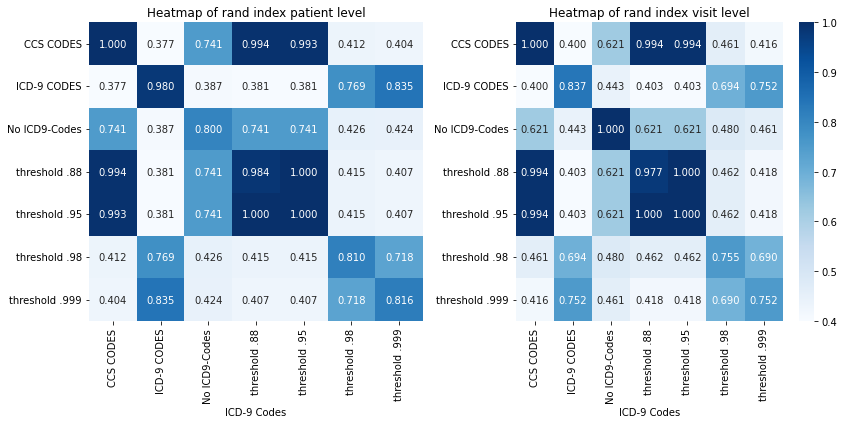

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the columns 'Column1', 'Column2', 'MI', and 'RI'

# Reshape the DataFrame using pivot
pivot_df1 = mi_pa.pivot(index="Column2", columns="Column1", values="RI")
pivot_df2 = mi_pa1.pivot(index="Column2", columns="Column1", values="RI_vi")
pivot_df1["threshold .88"] = pivot_df1["threshold .88"].fillna(0.984)
pivot_df2["threshold .88"] = pivot_df2["threshold .88"].fillna(0.9774)

pivot_df1 = pivot_df1.astype(float)
pivot_df1 = pivot_df1.round(3)
pivot_df2 = pivot_df2.astype(float)
pivot_df2 = pivot_df2.round(3)
# Create the first subplot for the first heatmap
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)


sns.heatmap(pivot_df1, cmap="Blues", annot=True, fmt=".3f", cbar=False)
plt.xlabel("ICD-9 Codes")
plt.ylabel("")
plt.title("Heatmap of rand index patient level")

# Create the second subplot for the second heatmap
plt.subplot(1, 2, 2)
sns.heatmap(pivot_df2, cmap="Blues", annot=True, fmt=".3f")
plt.xlabel("ICD-9 Codes")
plt.ylabel("")
plt.title("Heatmap of rand index visit level")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

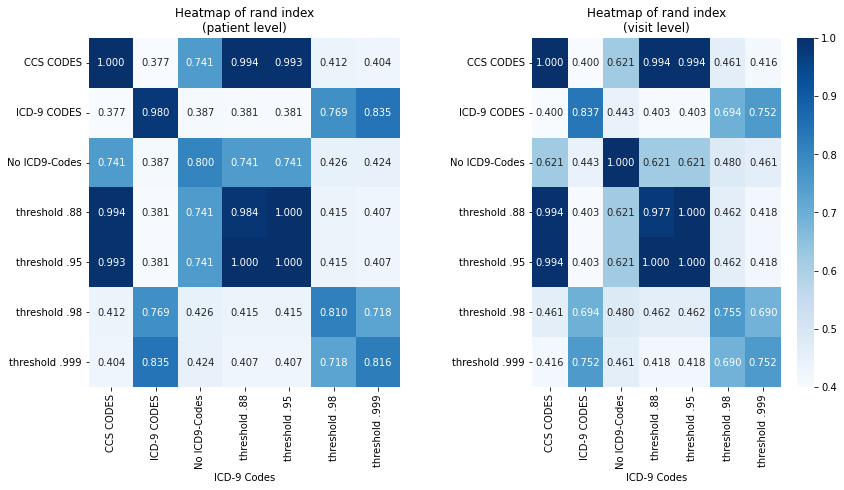

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the columns 'Column1', 'Column2', 'MI', and 'RI'

# Reshape the DataFrame using pivot
pivot_df1 = mi_pa.pivot(index="Column2", columns="Column1", values="RI")
pivot_df2 = mi_pa1.pivot(index="Column2", columns="Column1", values="RI_vi")
pivot_df1["threshold .88"] = pivot_df1["threshold .88"].fillna(0.984)
pivot_df2["threshold .88"] = pivot_df2["threshold .88"].fillna(0.9774)

pivot_df1 = pivot_df1.astype(float)
pivot_df1 = pivot_df1.round(3)
pivot_df2 = pivot_df2.astype(float)
pivot_df2 = pivot_df2.round(3)

# Create the first subplot for the first heatmap
plt.figure(figsize=(13, 8))
plt.subplot(1, 2, 1)

sns.heatmap(pivot_df1, cmap="Blues", annot=True, fmt=".3f", cbar=False)
plt.xlabel("ICD-9 Codes")
plt.ylabel("")
plt.title(
    "Heatmap of rand index\n(patient level)"
)  # Add a line break for spacing in the title

# Create the second subplot for the second heatmap
plt.subplot(1, 2, 2)
sns.heatmap(pivot_df2, cmap="Blues", annot=True, fmt=".3f")
plt.xlabel("ICD-9 Codes")
plt.ylabel("")
plt.title(
    "Heatmap of rand index\n(visit level)"
)  # Add a line break for spacing in the title

# Adjust the spacing between subplots and increase spacing between graphs
plt.tight_layout(pad=5.0)  # Increase the pad value for more spacing

# Show the plot
plt.show()

# Demographics

In [142]:
import pandas as pd


In [44]:
archivo_input_label = "data_preprocess_non_filtered.csv"
df = pd.read_csv("./data/" + archivo_input_label)
df.shape

(58976, 25)

In [144]:
df


Unnamed: 0 ADMISSION_TYPE         ADMISSION_LOCATION  \
0               0      EMERGENCY       EMERGENCY ROOM ADMIT   
1               1       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2               2      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3               3      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
4               4      EMERGENCY       EMERGENCY ROOM ADMIT   
...           ...            ...                        ...   
58971       58971      EMERGENCY  CLINIC REFERRAL/PREMATURE   
58972       58972      EMERGENCY  CLINIC REFERRAL/PREMATURE   
58973       58973       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
58974       58974      EMERGENCY       EMERGENCY ROOM ADMIT   
58975       58975      EMERGENCY  CLINIC REFERRAL/PREMATURE   

              DISCHARGE_LOCATION INSURANCE LANGUAGE           RELIGION  \
0      DISC-TRAN CANCER/CHLDRN H   Private      NaN       UNOBTAINABLE   
1               HOME HEALTH CARE  Medicare      NaN           CATHOLIC   
2               HOME HEALTH CARE  Medicare     ENGL           CATHOLIC   
3                           HOME   Private      NaN  PROTESTANT QUAKER   
4                           HOME   Private      NaN       UNOBTAINABLE   
...                          ...       ...      ...                ...   
58971                       HOME   Private     ENGL      NOT SPECIFIED   
58972               DEAD/EXPIRED  Medicare     ENGL           CATHOLIC   
58973           HOME HEALTH CARE   Private     ENGL      NOT SPECIFIED   
58974                        SNF   Private     ENGL           CATHOLIC   
58975                       HOME   Private     ENGL           CATHOLIC   

      MARITAL_STATUS ETHNICITY  \
0            MARRIED     WHITE   
1            MARRIED     WHITE   
2            MARRIED     WHITE   
3             SINGLE     WHITE   
4            MARRIED     WHITE   
...              ...       ...   
58971         SINGLE     WHITE   
58972        WIDOWED     WHITE   
58973        MARRIED     WHITE   
58974        MARRIED     WHITE   
58975        MARRIED     WHITE   

                                               DIAGNOSIS  ...  HADM_ID  \
0                                BENZODIAZEPINE OVERDOSE  ...   165315   
1      CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...  ...   152223   
2                                             BRAIN MASS  ...   124321   
3                         INTERIOR MYOCARDIAL INFARCTION  ...   161859   
4                                ACUTE CORONARY SYNDROME  ...   129635   
...                                                  ...  ...      ...   
58971                                             TRAUMA  ...   191113   
58972                                                SAH  ...   101071   
58973                                   RENAL CANCER/SDA  ...   122631   
58974                                           S/P FALL  ...   170407   
58975                            INTRACRANIAL HEMORRHAGE  ...   190264   

        ADMITTIME            DISCHTIME LOSRD                  age   year_age  \
0      2196-04-09  2196-04-10 15:54:00     1  23714 days, 0:00:00  64.969863   
1      2153-09-03  2153-09-08 19:10:00     5  25980 days, 0:00:00  71.178082   
2      2157-10-18  2157-10-25 14:00:00     6  27486 days, 0:00:00  75.304110   
3      2139-06-06  2139-06-09 12:48:00     2  14250 days, 0:00:00  39.041096   
4      2160-11-02  2160-11-05 14:55:00     3  21531 days, 0:00:00  58.989041   
...           ...                  ...   ...                  ...        ...   
58971  2131-03-30  2131-04-02 15:02:00     2   7085 days, 0:00:00  19.410959   
58972  2151-03-05  2151-03-06 09:10:00     0  30480 days, 0:00:00  83.506849   
58973  2200-09-12  2200-09-20 12:08:00     8  15534 days, 0:00:00  42.558904   
58974  2128-11-11  2128-12-22 13:11:00    41  22195 days, 0:00:00  60.808219   
58975  2131-10-25  2131-10-26 17:44:00     1  23273 days, 0:00:00  63.761644   

                                    ICD9_CODE_procedures  \
0                                     [967

In [45]:
df = pd.read_csv("./data/" + archivo_input_label)

In [46]:
adm = pd.read_csv(
    "/Users/cgarciay/Desktop/Laval_Master_Computer/research/MIMIC/ADMISSIONS.csv.gz"
)

In [4]:
adm.columns


Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [47]:
import pandas as pd

# Assuming you have a DataFrame named df with a "subject" column and an "admission" column

# Group the DataFrame by "subject" and count the number of unique "admission" values for each subject
subject_counts = adm.groupby("SUBJECT_ID")["HADM_ID"].nunique()

# Filter the subjects that have more than one admission
subjects_with_multiple_admissions = subject_counts[subject_counts > 1]

# Count the number of subjects with multiple admissions
count = len(subjects_with_multiple_admissions)

# Print the count
print(count)


7537


In [182]:
7505 / 53423

0.14048256368979653

In [48]:
new_column_names = {
    "ADMISSION_TYPE": "Admission type",
    "ADMISSION_LOCATION": "Admission location",
    "DISCHARGE_LOCATION": "Discharge location",
    "INSURANCE": "Insurance",
    "LANGUAGE": "Language",
    "RELIGION": "Religion",
    "MARITAL_STATUS": "Marital status",
    "ETHNICITY": "Ethnicity",
    "HOSPITAL_EXPIRE_FLAG": "Death",
    "HAS_CHARTEVENTS_DATA": "Has Chart Events",
}

adm = adm.rename(columns=new_column_names)

In [149]:
adm["Death"] = np.where(adm["Death"] == 1, "Died", "Survived")

In [150]:
adm.columns


Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'Admission type', 'Admission location',
       'Discharge location', 'Insurance', 'Language', 'Religion',
       'Marital status', 'Ethnicity', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'Death', 'Has Chart Events'],
      dtype='object')

In [8]:
adm.columns


Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [151]:
# adm["Death"].value_counts()

import numpy as np

adm["Has Chart Events"] = np.where(adm["Has Chart Events"] == 1, "Yes", "No")

In [123]:
adm.drop_duplicates().shape


(58976, 19)

In [122]:
adm.ADMITTIME.nunique()


58651

In [152]:
adm["Ethnicity"].value_counts()
adm["Death"].value_counts()
adm["Ethnicity"] = np.where(
    adm["Ethnicity"] == "BLACK/AFRICAN AMERICAN", "AFRICAN AMERICAN", adm["Ethnicity"]
)

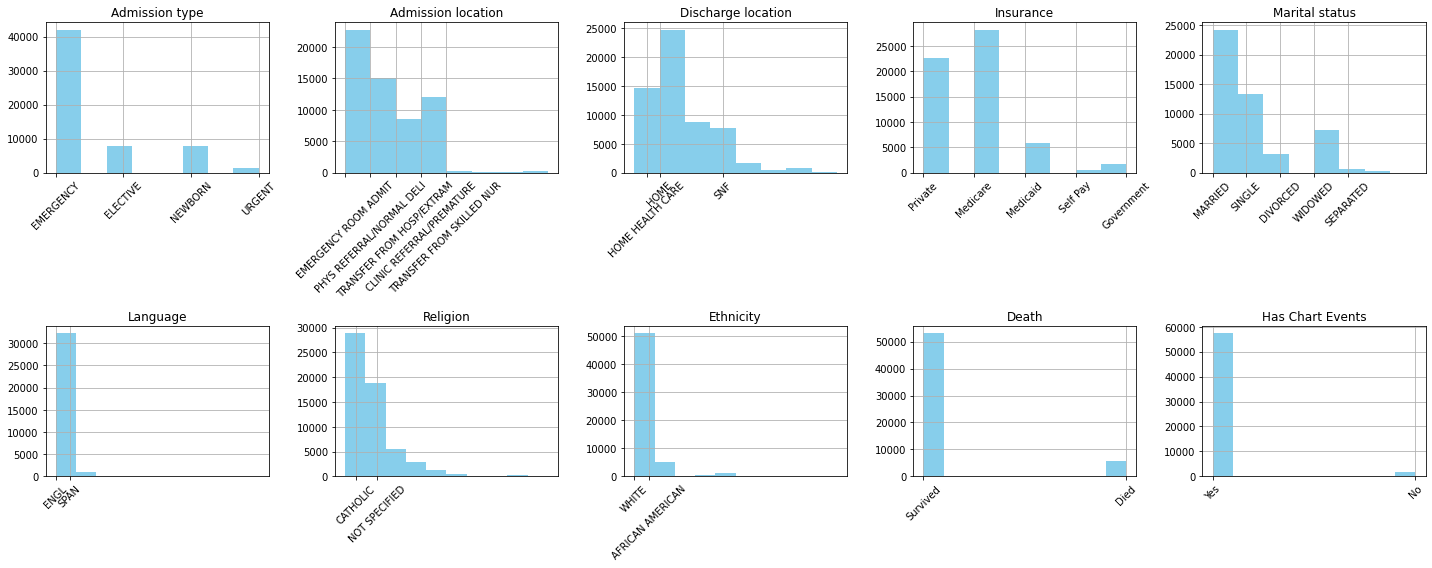

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'adm' is the DataFrame containing the data
# and 'columns' is the list of column names

# Select the top 5 and bottom 5 columns
top_columns = [
    "Admission type",
    "Admission location",
    "Discharge location",
    "Insurance",
    "Marital status",
]
bottom_columns = ["Language", "Religion", "Ethnicity", "Death", "Has Chart Events"]

# Create subplots for the histograms
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Plot histograms for the top columns
for i, column in enumerate(top_columns):
    ax = axes[0, i]
    adm[column].hist(ax=ax, bins=8, color="skyblue")  # Change the color to 'skyblue'
    ax.set_title(column)
    # Get the 5 most common categories
    if column == "Discharge location":
        top_categories = adm[column].value_counts().head(3)
    else:
        top_categories = adm[column].value_counts().head(5)
    # Set the x-axis labels to the top categories
    ax.set_xticks(top_categories.index)
    ax.set_xticklabels(top_categories.index, rotation=45)

# Plot histograms for the bottom columns
for i, column in enumerate(bottom_columns):
    ax = axes[1, i]
    adm[column].hist(
        ax=ax, bins=10, color="skyblue"
    )  # Change the color to 'deepskyblue'
    ax.set_title(column)
    # Get the 5 most common categories
    top_categories = adm[column].value_counts().head(2)
    # Set the x-axis labels to the top categories
    ax.set_xticks(top_categories.index)
    ax.set_xticklabels(top_categories.index, rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the histograms
plt.show()

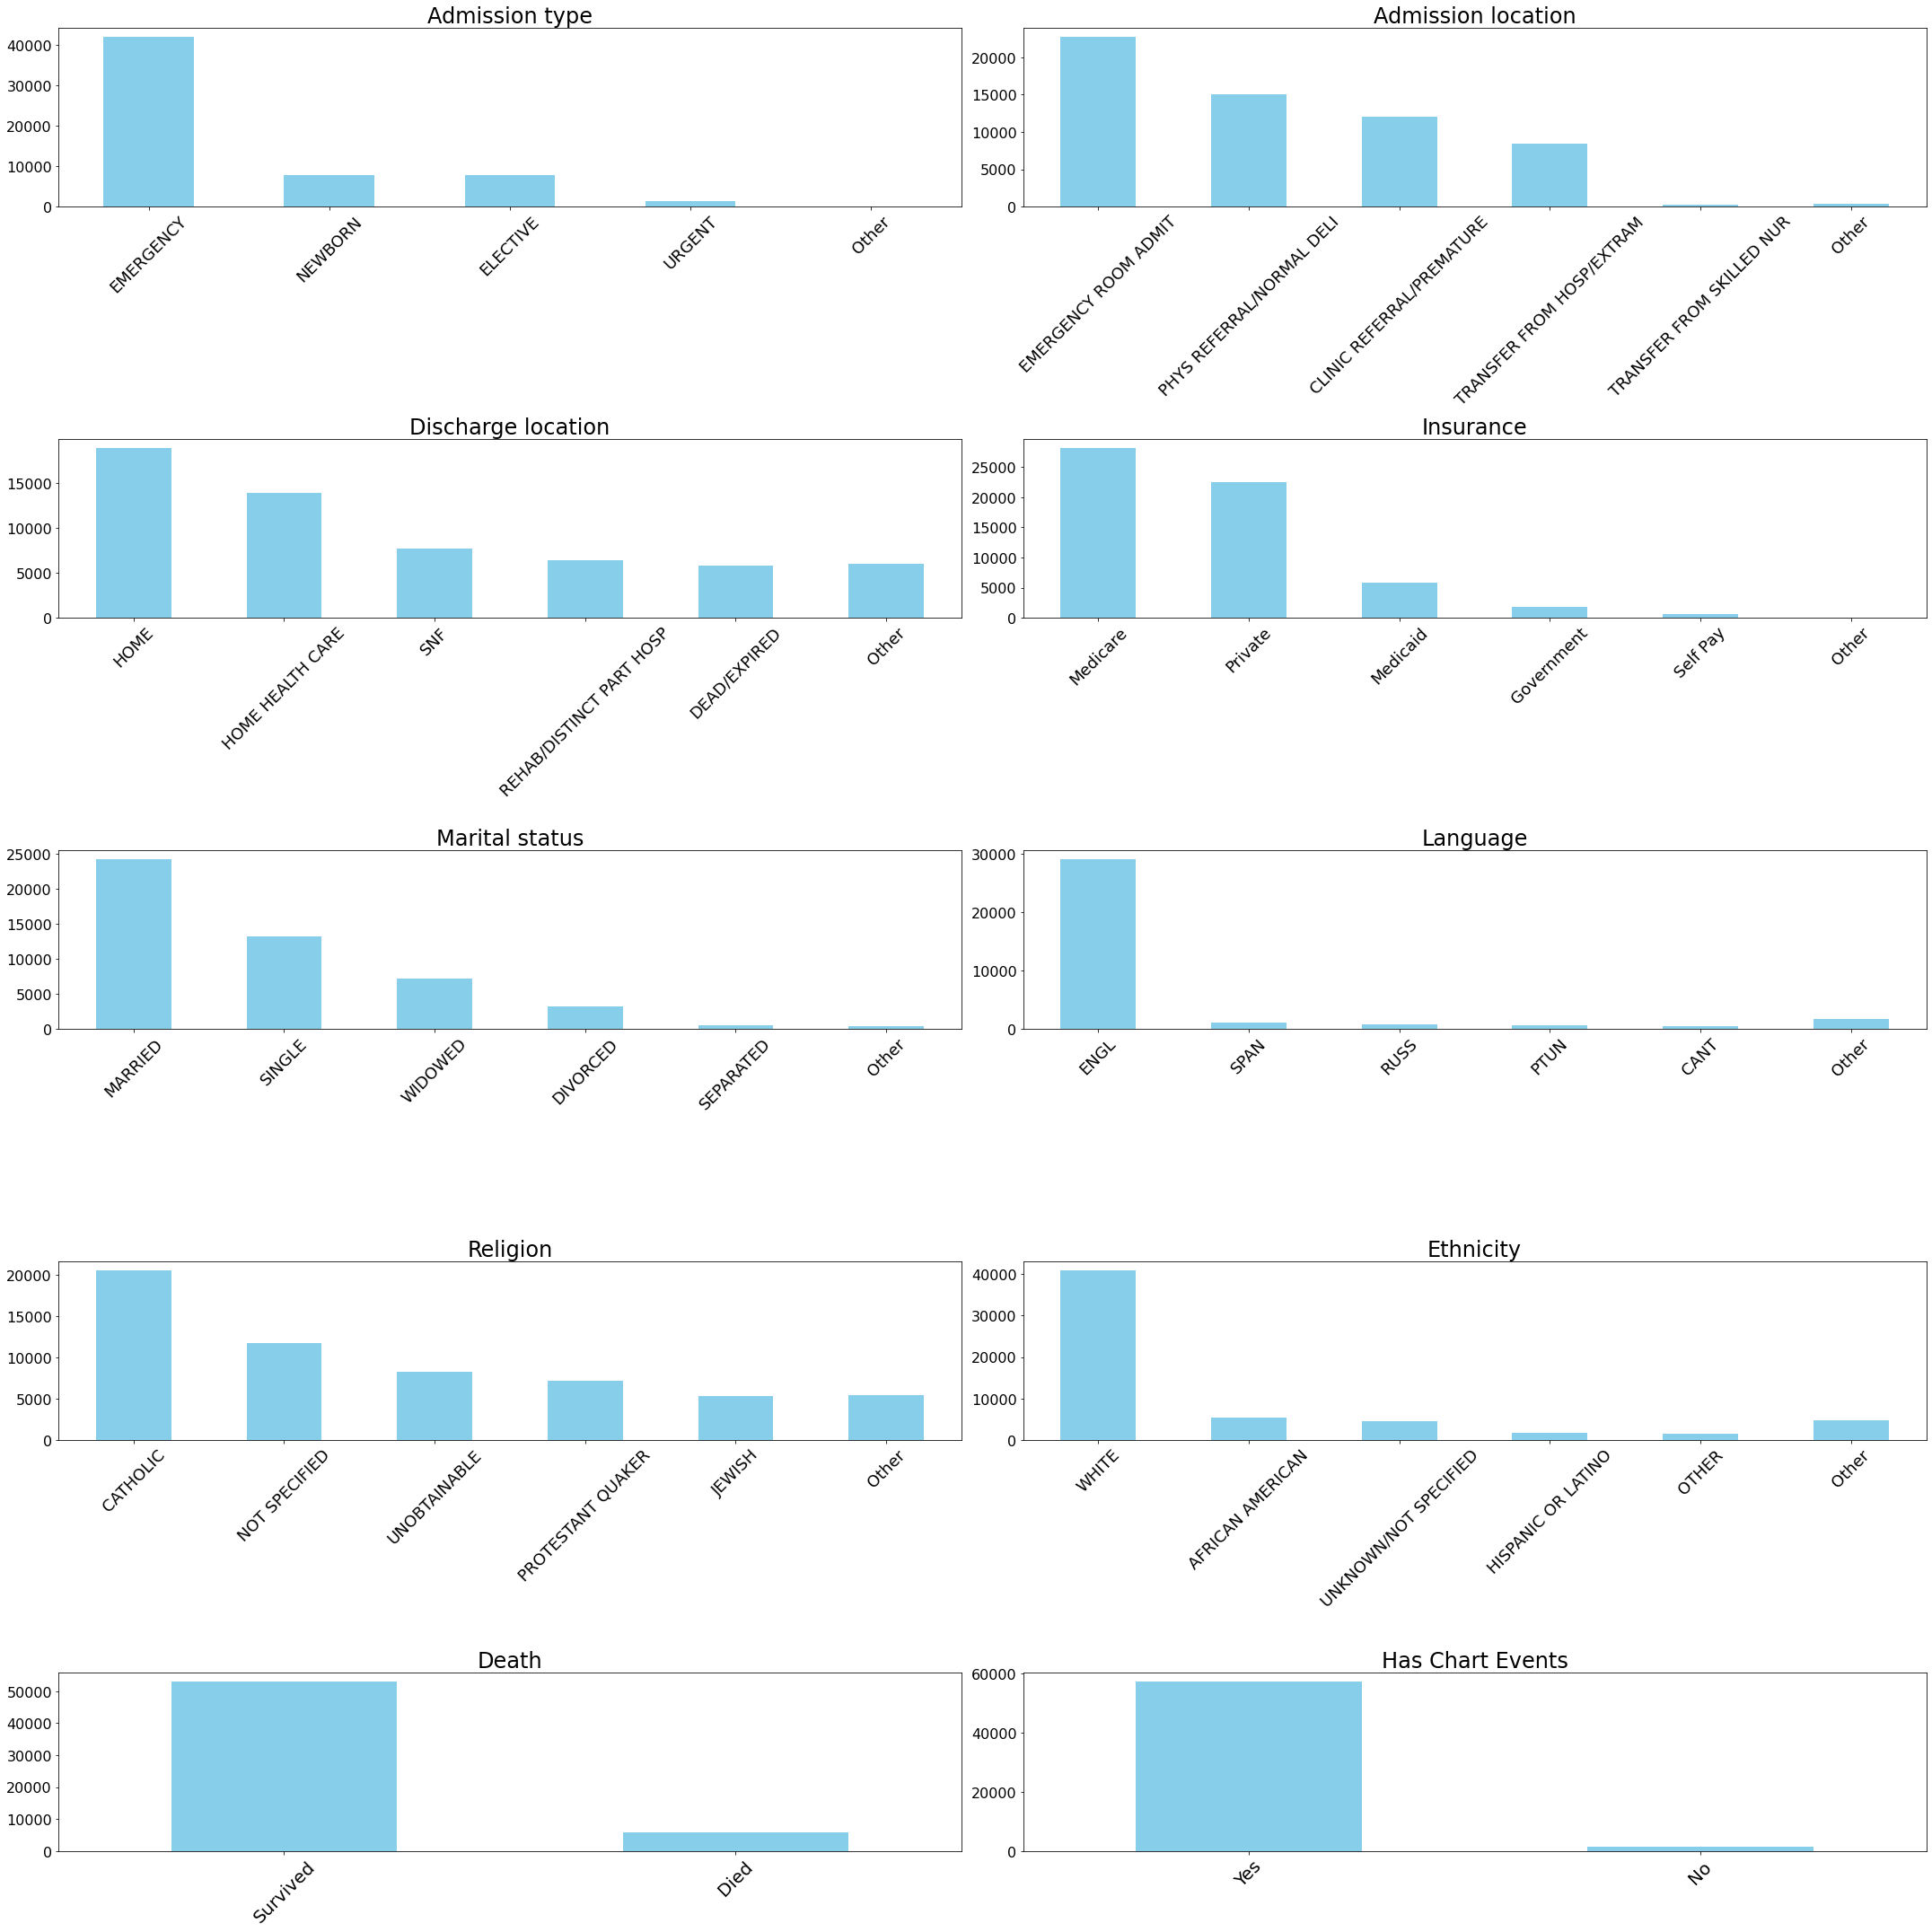

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

top_columns = [
    "Admission type",
    "Admission location",
    "Discharge location",
    "Insurance",
    "Marital status",
]
bottom_columns = ["Language", "Religion", "Ethnicity", "Death", "Has Chart Events"]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))

for i, column in enumerate(top_columns + bottom_columns):
    if column in ["Death", "Has Chart Events"]:
        ax = axes[i // 2, i % 2]
        top_categories = adm[column].value_counts()
        top_categories.plot(kind="bar", ax=ax, color="skyblue")
        ax.set_title(column, fontsize=24)
        ax.set_xticklabels(top_categories.index, rotation=45, fontsize=20)
        ax.tick_params(axis="y", labelsize=16)
    else:
        ax = axes[i // 2, i % 2]
        value_counts = adm[column].value_counts()
        top_categories = value_counts.head(5)
        other_count = value_counts.sum() - top_categories.sum()
        categories = top_categories.append(pd.Series([other_count], index=["Other"]))
        categories.plot(kind="bar", ax=ax, color="skyblue")
        ax.set_title(column, fontsize=24)
        ax.set_xticklabels(categories.index, rotation=45, fontsize=18)
        ax.tick_params(axis="y", labelsize=16)

plt.tight_layout()
plt.show()

In [ ]:
['ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY',
       'GENDER', 'EXPIRE_FLAG', ]]


In [8]:
df["age"].describe()

count       58976
unique      20337
top       0:00:00
freq         7840
Name: age, dtype: object

In [43]:
import pandas as pd

# Assuming 'df' is the DataFrame containing the data

# Get the name of all columns
column_names = adm.columns.tolist()

# Get the number of categories in each column
num_categories = [adm[column].nunique() for column in column_names]

# Create a new DataFrame with the column names and number of categories
table_data = {"Column Name": column_names, "Number of Categories": num_categories}
table_df = pd.DataFrame(table_data)

# Display the table
print(table_df)

           Column Name  Number of Categories
0               ROW_ID                 58976
1           SUBJECT_ID                 46520
2              HADM_ID                 58976
3            ADMITTIME                 58651
4            DISCHTIME                 58657
5            DEATHTIME                  5834
6       Admission type                     4
7   Admission location                     9
8   Discharge location                    17
9            Insurance                     5
10            Language                    75
11            Religion                    20
12      Marital status                     7
13           Ethnicity                    41
14           EDREGTIME                 30874
15           EDOUTTIME                 30864
16           DIAGNOSIS                 15691
17               Death                     2
18    Has Chart Events                     2


In [44]:
adm.columns


Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'Admission type', 'Admission location',
       'Discharge location', 'Insurance', 'Language', 'Religion',
       'Marital status', 'Ethnicity', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'Death', 'Has Chart Events'],
      dtype='object')

In [49]:
bins = [0, 18, 30, 40, 50, 60, 250]  # Define the age intervals for bins

# Create labels for the bins
labels = [
    "0-18",
    "19-30",
    "31-40",
    "41-50",
    "51-60",
    "61-100",
]  # Labels for each bin range

# Use cut to create bins from the 'age' column
df["age_group"] = pd.cut(df["year_age"], bins=bins, labels=labels, right=False)


# para grupo lenght of stay
bins = [-1, 0, 25, 100, 400, 500, 700, 4107]  # Define the age intervals for bins

# Create labels for the bins
labels = [
    "0",
    "1-25",
    "26-100",
    "101-401",
    "402-500",
    "501-700",
    "701-4107",
]  # Labels for each bin range

# Use cut to create bins from the 'age' column
df["INTERVAL_group"] = pd.cut(
    df["LOSRD"], bins=bins, labels=labels, right=False
)  # Assign each value to a bin
# Assign each value to a bin
# df.loc[df['INTERVAL_group'].isnull(), 'INTERVAL_group'] = 0

In [10]:
df["INTERVAL_group"].unique()

['1-25', '26-100', '101-401', '0']
Categories (7, object): ['0' < '1-25' < '26-100' < '101-401' < '402-500' < '501-700' < '701-4107']

In [11]:
df["age_group"].unique()

['61-100', '31-40', '51-60', '0-18', '41-50', '19-30']
Categories (6, object): ['0-18' < '19-30' < '31-40' < '41-50' < '51-60' < '61-100']

In [12]:
df.columns


Index(['Unnamed: 0', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'GENDER', 'EXPIRE_FLAG', 'DOB', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'LOSRD', 'age', 'year_age', 'ICD9_CODE_procedures',
       'CCS CATEGORY DESCRIPTION_proc', 'CCS CODES_proc',
       'cat_threshold .95 most frequent_proc', 'age_group', 'INTERVAL_group'],
      dtype='object')

/var/folders/xn/hrsr6_j92psb5bqf9kjzwv8w0000gp/T/ipykernel_87648/714467749.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = df.groupby('SUBJECT_ID')['ADMISSION_TYPE', 'INSURANCE', 'GENDER', 'EXPIRE_FLAG', 'age_group', 'INTERVAL_group'].apply(lambda x: x.mode().iloc[0])


KeyError: "Columns not found: 'INTERVAL_group', 'age_group'"

In [50]:
import pandas as pd

# Group the DataFrame by 'ADMISSION_TYPE' and calculate the mode of the variables
grouped_df = df.groupby("SUBJECT_ID")[
    "ADMISSION_TYPE",
    "INSURANCE",
    "GENDER",
    "EXPIRE_FLAG",
].apply(lambda x: x.mode().iloc[0])

# Print the grouped DataFrame

/var/folders/xn/hrsr6_j92psb5bqf9kjzwv8w0000gp/T/ipykernel_24008/3727224569.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = df.groupby("SUBJECT_ID")[


In [140]:
grouped_df["EXPIRE_FLAG"].value_counts()

0.0    30761
1.0    15759
Name: EXPIRE_FLAG, dtype: int64

In [51]:
gender_map2 = {1.0: "DIED", 0.0: "SURVIVED"}

# Use the map function to create a new column 'gender_label'
grouped_df["EXPIRE_FLAG"] = grouped_df["EXPIRE_FLAG"].map(gender_map2)


df["EXPIRE_FLAG"] = df["EXPIRE_FLAG"].map(gender_map2)

In [10]:
df.columns


Index(['Unnamed: 0', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'GENDER', 'EXPIRE_FLAG', 'DOB', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'LOSRD', 'age', 'year_age', 'ICD9_CODE_procedures',
       'CCS CATEGORY DESCRIPTION_proc', 'CCS CODES_proc',
       'cat_threshold .95 most frequent_proc', 'age_group', 'INTERVAL_group'],
      dtype='object')

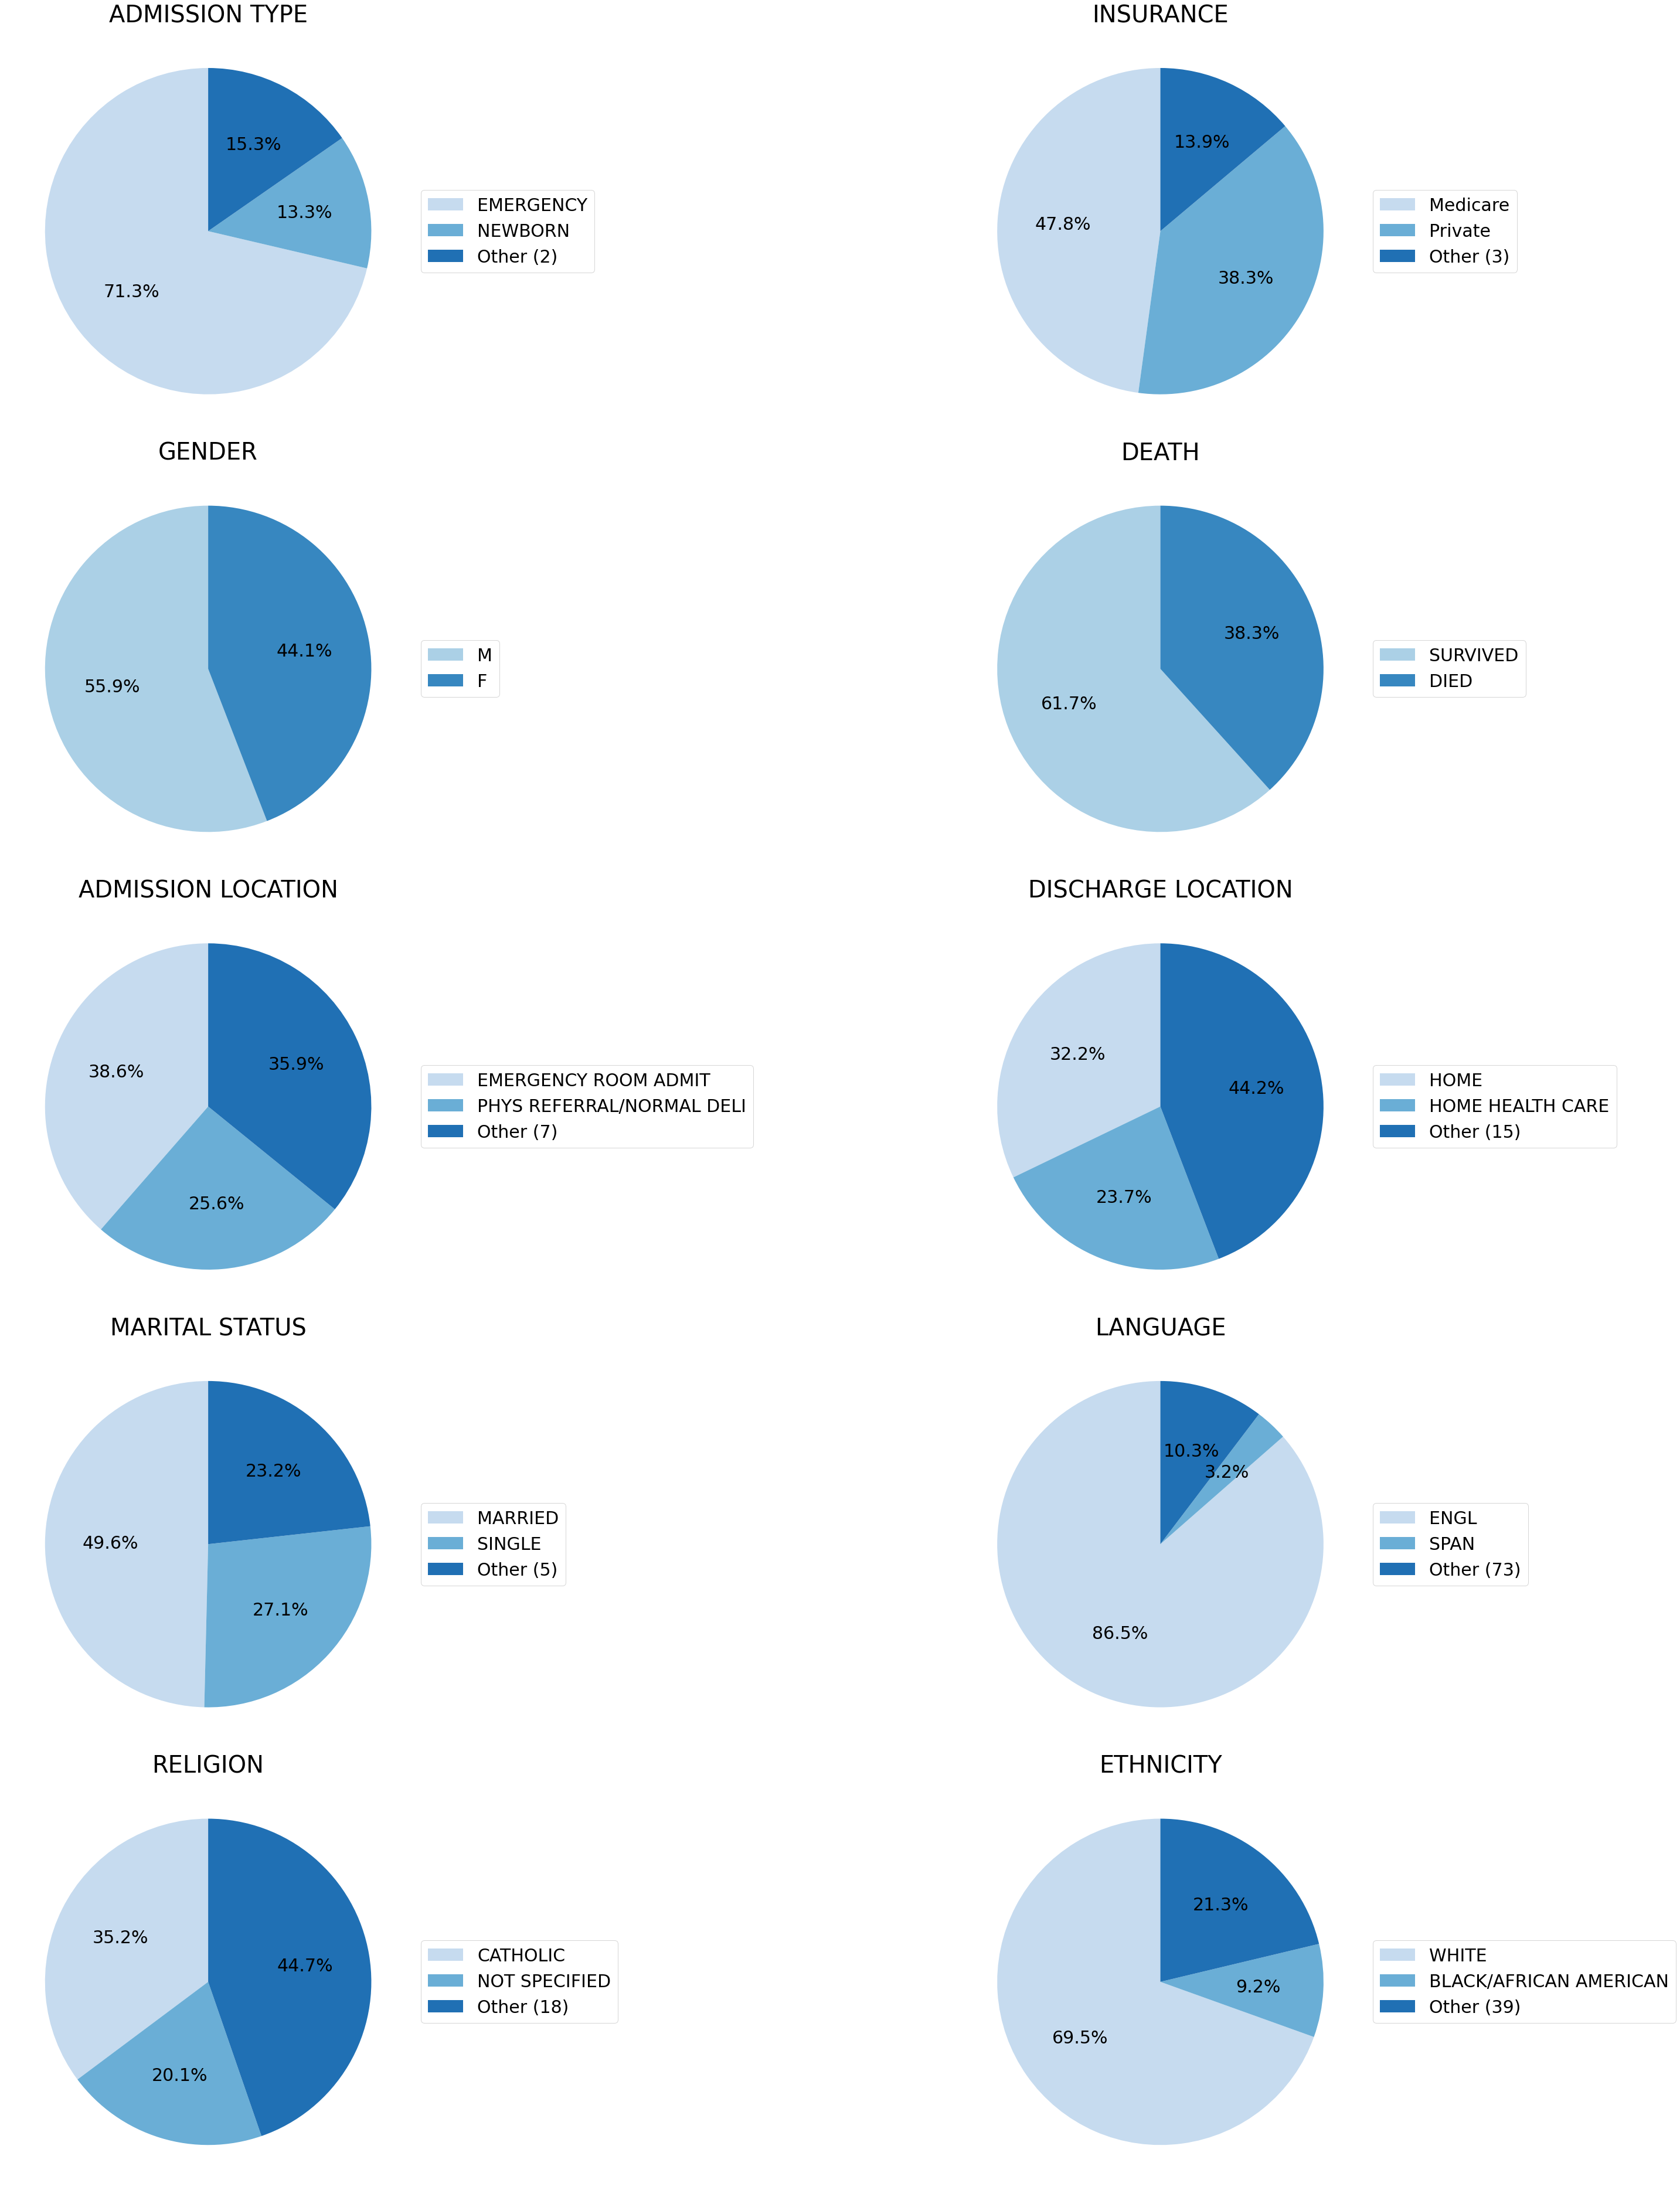

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped_df = df
variables = [
    "ADMISSION_TYPE",
    "INSURANCE",
    "GENDER",
    "EXPIRE_FLAG",
    "ADMISSION_LOCATION",
    "DISCHARGE_LOCATION",
    "MARITAL_STATUS",
    "LANGUAGE",
    "RELIGION",
    "ETHNICITY",
]
title = [
    "ADMISSION TYPE",
    "INSURANCE",
    "GENDER",
    "DEATH",
    "ADMISSION LOCATION",
    "DISCHARGE LOCATION",
    "MARITAL STATUS",
    "LANGUAGE",
    "RELIGION",
    "ETHNICITY",
]
fig, axes = plt.subplots(5, 2, figsize=(50, 52))

fig.patch.set_facecolor("white")

axes = axes.flatten()

for i, variable in enumerate(variables):
    counts = grouped_df[variable].value_counts()
    if variable != "EXPIRE_FLAG" and variable != "GENDER":
        top_2 = counts.head(2)
        other_count = counts.shape[0] - 2
        other_label = f"Other ({other_count:,})"
        top_2_counts = top_2.append(
            pd.Series([counts.sum() - top_2.sum()], index=[other_label])
        )
        colors = sns.color_palette("Blues", len(top_2_counts))
    else:
        top_2_counts = counts.head(2)  # Select top 2 categories for other variables
        colors = sns.color_palette("Blues", len(top_2_counts))

    pie = axes[i].pie(
        top_2_counts,
        labels=None,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors,
        textprops={"fontsize": 30},
    )
    axes[i].set_title(title[i], fontsize=40)
    #axes[i].legend(pie[0], top_2_counts.index, loc="best", fontsize=30)
    axes[i].legend(
    pie[0],
    top_2_counts.index,
    
    loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=30
)
    axes[i].set_aspect("equal")  # Ensure pie is circular
    axes[i].set_xlabel("")  # Remove x-axis label
    axes[i].set_ylabel("")  # Remove y-axis label

plt.tight_layout()
plt.show()

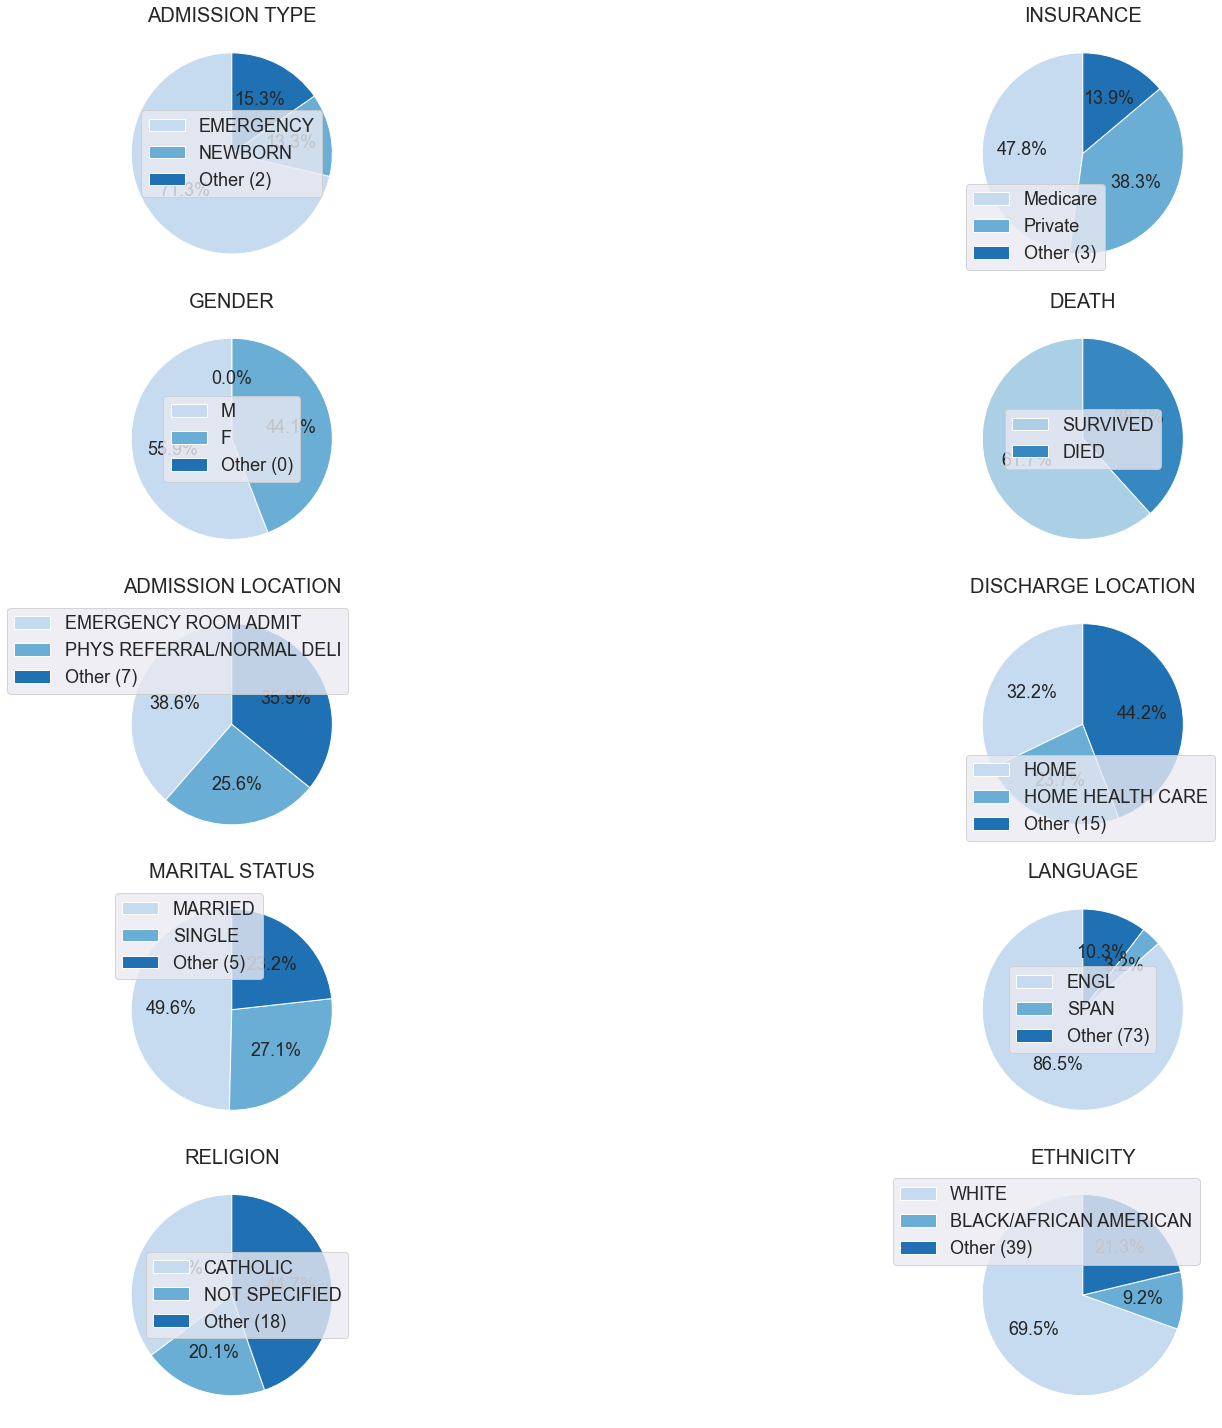

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped_df = df
variables = [
    "ADMISSION_TYPE",
    "INSURANCE",
    "GENDER",
    "EXPIRE_FLAG",
    "ADMISSION_LOCATION",
    "DISCHARGE_LOCATION",
    "MARITAL_STATUS",
    "LANGUAGE",
    "RELIGION",
    "ETHNICITY",
]
title = [
    "ADMISSION TYPE",
    "INSURANCE",
    "GENDER",
    "DEATH",
    "ADMISSION LOCATION",
    "DISCHARGE LOCATION",
    "MARITAL STATUS",
    "LANGUAGE",
    "RELIGION",
    "ETHNICITY",
]
fig, axes = plt.subplots(5, 2, figsize=(30, 20))

fig.patch.set_facecolor("white")

axes = axes.flatten()

for i, variable in enumerate(variables):
    counts = grouped_df[variable].value_counts()
    if variable != "EXPIRE_FLAG":
        top_2 = counts.head(2)
        other_count = counts.shape[0] - 2
        other_label = f"Other ({other_count:,})"
        top_2_counts = top_2.append(
            pd.Series([counts.sum() - top_2.sum()], index=[other_label])
        )
        colors = sns.color_palette("Blues", len(top_2_counts))
    else:
        top_2_counts = counts.head(2)  # Select top 2 categories for other variables
        colors = sns.color_palette("Blues", len(top_2_counts))

    pie = axes[i].pie(
        top_2_counts,
        labels=None,
        autopct="%1.1f%%",
        startangle=90,
        colors=colors,
        textprops={"fontsize": 18},
    )
    axes[i].set_title(title[i], fontsize=20)
    axes[i].legend(pie[0], top_2_counts.index, loc="best", fontsize=18)
    axes[i].set_aspect("equal")  # Ensure pie is circular
    axes[i].set_xlabel("")  # Remove x-axis label
    axes[i].set_ylabel("")  # Remove y-axis label

plt.tight_layout()
plt.show()

In [ ]:
pie = axes[i].pie(
    top_2_counts,
    labels=None,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    textprops={"fontsize": 24},
)

IndexError: index 6 is out of bounds for axis 0 with size 6

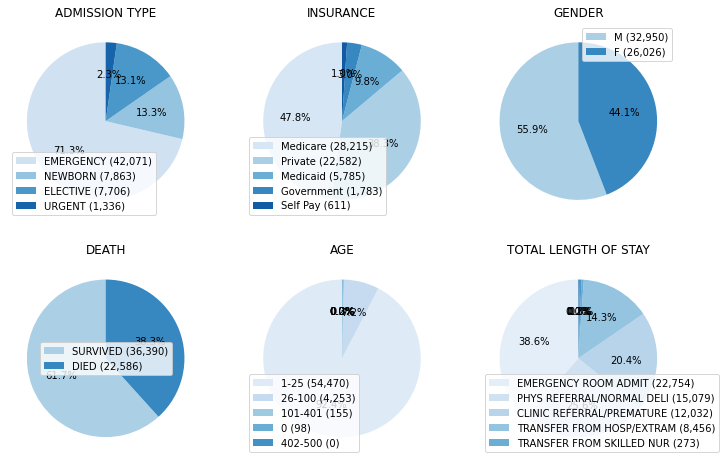

In [11]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' with the required variables
grouped_df = df
# Create a list of variable names
variables = [
    "ADMISSION_TYPE",
    "INSURANCE",
    "GENDER",
    "EXPIRE_FLAG",
    "INTERVAL_group",
    "ADMISSION_LOCATION",
    "DISCHARGE_LOCATION",
    "MARITAL_STATUS",
    "LANGUAGE",
    "RELIGION",
    "ETHNICITY",
    "year_age",
]
title = [
    "ADMISSION TYPE",
    "INSURANCE",
    "GENDER",
    "DEATH",
    "AGE",
    "TOTAL LENGTH OF STAY",
]
# Create a figure with 2 rows and 3 columns to accommodate the 6 pie charts
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Set the background color to white
fig.patch.set_facecolor("white")

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over the variables and create a pie chart for each
for i, variable in enumerate(variables):
    # Count the occurrences of each category in the variable
    counts = grouped_df[variable].value_counts()

    # Create the pie chart with a different shade of blue for each chart
    colors = sns.color_palette("Blues", len(counts))
    pie = axes[i].pie(
        counts, labels=None, autopct="%1.1f%%", startangle=90, colors=colors
    )
    axes[i].set_title(title[i])

    # Get the top 5 categories and their counts
    if variable == "LANGUAGE":
        top_2 = counts.head(2)
        labels = [
            f"{label} ({count:,})" for label, count in zip(top_2.index, top_2.values)
        ]
        legend_labels = [
            f"{label} ({count:,})"
            for label, count in zip(counts.index[:5], counts.values[:5])
        ]
    else:
        top_5 = counts.head(5)
        labels = [
            f"{label} ({count:,})" for label, count in zip(top_5.index, top_5.values)
        ]
        legend_labels = labels

    # Set the labels for the pie chart with better positioning
    axes[i].legend(pie[0], legend_labels, loc="best")

# Adjust the spacing between subplots
# plt.title("Visit level variables")
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
df.columns

Index(['Unnamed: 0', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'GENDER', 'EXPIRE_FLAG', 'DOB', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'LOSRD', 'age', 'year_age', 'ICD9_CODE_procedures',
       'CCS CATEGORY DESCRIPTION_proc', 'CCS CODES_proc',
       'cat_threshold .95 most frequent_proc', 'age_group', 'INTERVAL_group'],
      dtype='object')

In [7]:
df.columns


Index(['Unnamed: 0', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'GENDER', 'EXPIRE_FLAG', 'DOB', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'LOSRD', 'age', 'year_age', 'ICD9_CODE_procedures',
       'CCS CATEGORY DESCRIPTION_proc', 'CCS CODES_proc',
       'cat_threshold .95 most frequent_proc', 'age_group', 'INTERVAL_group'],
      dtype='object')

In [64]:
df.age


0        23714 days, 0:00:00
1        25980 days, 0:00:00
2        27486 days, 0:00:00
3        14250 days, 0:00:00
4        21531 days, 0:00:00
                ...         
58971     7085 days, 0:00:00
58972    30480 days, 0:00:00
58973    15534 days, 0:00:00
58974    22195 days, 0:00:00
58975    23273 days, 0:00:00
Name: age, Length: 58976, dtype: object

In [53]:
def mode(x):
    """function to obtain the mode"""
    return x.mode()[0]


grouped_df1 = (
    df.groupby("SUBJECT_ID")
    .agg({"age": "max", "LOSRD": "sum", "GENDER": mode})
    .reset_index()
)

In [54]:
df2 = pd.read_csv("./data/ICD9_CODE_procedures_outs_visit_non_filtered.csv")

In [178]:
df2.shape


(50565, 2010)

In [179]:
df2.LOSRD_sum.max()


4998

In [180]:
df2.LOSRD_sum.describe()


count    50565.000000
mean        76.550361
std        179.979323
min          1.000000
25%          8.000000
50%         24.000000
75%         66.000000
max       4998.000000
Name: LOSRD_sum, dtype: float64

In [40]:
aux = df2[df2["LOSRD_sum"] < 200]
aux.shape

(45956, 2010)

In [192]:
45956 / 50565

0.9088499950558687

In [135]:
df2[df2["Age_max"] < 0]

Empty DataFrame
Columns: [Unnamed: 0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 28, 31, 32, 33, 34, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 91, 92, 93, 94, 101, 102, 106, 109, 110, 113, 114, 115, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 131, 132, 139, 149, 151, 152, 153, 157, 159, 184, 199, 202, 203, 204, 205, 206, 207, 211, 212, 214, ...]
Index: []

In [55]:
df["Age_max"] = df["year_age"]


In [56]:
grouped_df1 = (
    df2.groupby("SUBJECT_ID")
    .agg({"Age_max": "max", "LOSRD_sum": "sum", "GENDER": mode, "L_1s_last_p1": mode})
    .reset_index()
)

In [115]:
df2["GENDER"]

0        1.0
1        1.0
2        0.0
3        1.0
4        0.0
        ... 
50560    1.0
50561    1.0
50562    0.0
50563    0.0
50564    0.0
Name: GENDER, Length: 50565, dtype: float64

In [57]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with a column named 'gender' containing 1s and 0s

# Create a dictionary to map the values
gender_map = {1: "Male", 0: "Female"}
gender_map2 = {1.0: "Male", 0.0: "Female"}

# Use the map function to create a new column 'gender_label'
# df2['GENDER'] = df2['GENDER'].map(gender_map)
grouped_df1["GENDER"] = grouped_df1["GENDER"].map(gender_map2)
df2["GENDER"] = df2["GENDER"].map(gender_map2)

In [117]:
df2["GENDER"]

0          Male
1          Male
2        Female
3          Male
4        Female
          ...  
50560      Male
50561      Male
50562    Female
50563    Female
50564    Female
Name: GENDER, Length: 50565, dtype: object

In [161]:
grouped_df1[grouped_df1["GENDER"] == "Female"]["Age_max"]

Series([], Name: Age_max, dtype: float64)

In [58]:
print(grouped_df1["GENDER"].value_counts())
gender_map = {1.0: "Male", 0.0: "Female"}

# Use the map function to create a new column 'gender_label'
grouped_df1["Gender"] = grouped_df1["GENDER"].map(gender_map)
grouped_df1["GENDER"] = np.where(grouped_df1["GENDER"] == 1.0, "Male", "Female")

Male      23405
Female    17611
Name: GENDER, dtype: int64


In [78]:
grouped_df1[grouped_df1["GENDER"] == 1.0]

Empty DataFrame
Columns: [SUBJECT_ID, Age_max, LOSRD_sum, GENDER, L_1s_last_p1, Gender]
Index: []

In [73]:
grouped_df1[grouped_df1["GENDER"] == "Male"]

Empty DataFrame
Columns: [SUBJECT_ID, Age_max, LOSRD_sum, GENDER, L_1s_last_p1, Gender]
Index: []

In [122]:
grouped_df1["Age_max"] = [int(i) for i in grouped_df1.Age_max]

In [139]:
df2.iloc[:, -17:]

9995  9999  SUBJECT_ID  HADM_ID    Age_max  LOSRD_sum  L_1s_last  \
0       0.0   0.0           2   163353   0.000000          3          0   
1       0.0   0.0           3   145834  76.575342         60          0   
2       0.0   0.0           4   185777  47.876712         21          0   
3       0.0   0.0           5   178980   0.000000          2          0   
4       0.0   0.0           6   107064  65.983562         80          0   
...     ...   ...         ...      ...        ...        ...        ...   
50560   0.0   0.0       99985   176670  53.843836         80          0   
50561   0.0   0.0       99991   151118  47.747945         84          0   
50562   0.0   0.0       99992   197084  65.813699          4          0   
50563   0.0   0.0       99995   137810  88.756164          9          0   
50564   0.0   0.0       99999   113369  64.021918         25          0   

       LOSRD_avg  ADMISSION_TYPE  ADMISSION_LOCATION  DISCHARGE_LOCATION  \
0              3             2.0                 4.0                 4.0   
1             10             1.0                 2.0                15.0   
2              7             1.0                 2.0                 6.0   
3              2             2.0                 4.0                 4.0   
4             16             0.0                 4.0                 5.0   
...          ...             ...                 ...                 ...   
50560         16             1.0                 2.0                 5.0   
50561         12             0.0                 4.0                 4.0   
50562          2             1.0                 1.0                15.0   
50563          3             0.0                 4.0                 4.0   
50564          5             0.0                 4.0                15.0   

       INSURANCE  RELIGION  MARITAL_STATUS  ETHNICITY  GENDER  L_1s_last_p1  
0            3.0      14.0             6.0        2.0    Male           0.0  
1            2.0       3.0             2.0       36.0    Male           0.0  
2            3.0      16.0             4.0       36.0  Female           0.0  
3            3.0       2.0             6.0        2.0    Male           0.0  
4            2.0      14.0             2.0       36.0  Female           0.0  
...          ...       ...             ...        ...     ...           ...  
50560        3.0      10.0             2.0       36.0    Male           0.0  
50561        3.0      14.0             2.0       36.0    Male           0.0  
50562        2.0       3.0             7.0       36.0  Female           0.0  
50563        2.0      14.0             2.0       36.0  Female           0.0  
50564        2.0       9.0             3.0       17.0  Female           0.0  

[50565 rows x 17 columns]

/var/folders/xn/hrsr6_j92psb5bqf9kjzwv8w0000gp/T/ipykernel_52075/291289506.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


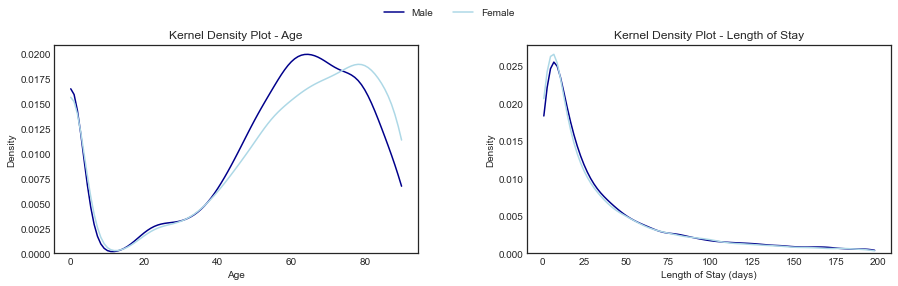

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming 'grouped_df1' is your DataFrame with 'Age_max', 'LOSRD_sum', and 'GENDER' columns

# Set the background style
plt.style.use("seaborn-white")

# Define two shades of blue
dark_blue = "#00008B"  # A dark blue
light_blue = "#ADD8E6"  # A light blue

# Create two figures and axes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Calculate the kernel density estimate for 'Age_max' for each gender
age_max_male = df2[df2["GENDER"] == "Male"]["Age_max"]
age_max_female = df2[df2["GENDER"] == "Female"]["Age_max"]
kde_age_max_male = gaussian_kde(age_max_male)
kde_age_max_female = gaussian_kde(age_max_female)

# Generate x-values for the kernel density estimate
x_age_max = np.linspace(age_max_male.min(), age_max_male.max(), 100)

# Plot the kernel density estimate for 'Age_max' with the dark blue for male and light blue for female
ax1.plot(x_age_max, kde_age_max_male(x_age_max), color=dark_blue, label="Male")
ax1.plot(x_age_max, kde_age_max_female(x_age_max), color=light_blue, label="Female")

# Set the labels and title for the 'Age_max' plot
ax1.set_xlabel("Age")
ax1.set_ylabel("Density")
ax1.set_title("Kernel Density Plot - Age")
ax1.set_ylim(bottom=0)  # Set the y-axis limit to start at zero

# Calculate the kernel density estimate for 'LOSRD_sum' for each gender
aux = df2[df2["LOSRD_sum"] < 200]
losrd_sum_male = aux[aux["GENDER"] == "Male"]["LOSRD_sum"]
losrd_sum_female = aux[aux["GENDER"] == "Female"]["LOSRD_sum"]
kde_losrd_sum_male = gaussian_kde(losrd_sum_male)
kde_losrd_sum_female = gaussian_kde(losrd_sum_female)

# Generate x-values for the kernel density estimate
x_losrd_sum = np.linspace(losrd_sum_male.min(), losrd_sum_male.max(), 100)

# Plot the kernel density estimate for 'LOSRD_sum' with the dark blue for male and light blue for female
ax2.plot(x_losrd_sum, kde_losrd_sum_male(x_losrd_sum), color=dark_blue, label="Male")
ax2.plot(
    x_losrd_sum, kde_losrd_sum_female(x_losrd_sum), color=light_blue, label="Female"
)

# Set the labels and title for the 'LOSRD_sum' plot
ax2.set_xlabel("Length of Stay (days)")
ax2.set_ylabel("Density")
ax2.set_title("Kernel Density Plot - Length of Stay")
ax2.set_ylim(bottom=0)  # Set the y-axis limit to start at zero

# Remove the legends from the individual plots
ax1.legend().remove()
ax2.legend().remove()

# Adjust the layout before adding a common legend
plt.subplots_adjust(wspace=0.3, top=0.85)

# Create a common legend for both plots with corrected labels
fig.legend(labels=["Male", "Female"], loc="upper center", ncol=2)

# Show the plots
plt.show()

In [65]:
df.SUBJECT_ID.nunique()

46520

In [66]:
46517/46520

0.9999355116079106

In [67]:
 7364/7537

0.9770465702534165

/var/folders/xn/hrsr6_j92psb5bqf9kjzwv8w0000gp/T/ipykernel_24008/239617766.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


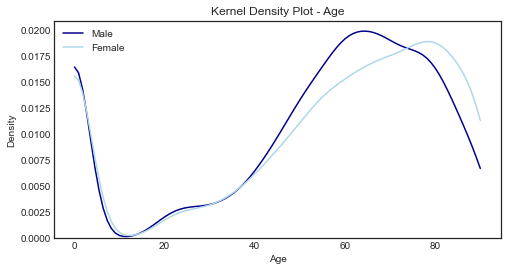

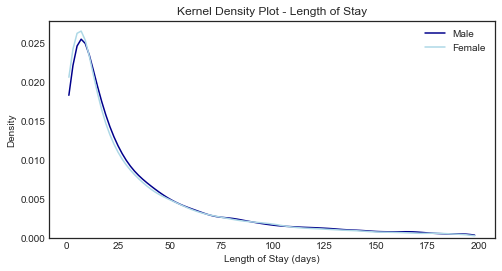

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming 'grouped_df1' is your DataFrame with 'Age_max', 'LOSRD_sum', and 'GENDER' columns

# Set the background style
plt.style.use("seaborn-white")

# Define two shades of blue
dark_blue = "#00008B"  # A dark blue
light_blue = "#ADD8E6"  # A light blue

# Create the first plot for 'Age_max'
fig, ax1 = plt.subplots(figsize=(8, 4))

# Calculate the kernel density estimate for 'Age_max' for each gender
age_max_male = df2[df2["GENDER"] == "Male"]["Age_max"]
age_max_female = df2[df2["GENDER"] == "Female"]["Age_max"]
kde_age_max_male = gaussian_kde(age_max_male)
kde_age_max_female = gaussian_kde(age_max_female)

# Generate x-values for the kernel density estimate
x_age_max = np.linspace(age_max_male.min(), age_max_male.max(), 100)

# Plot the kernel density estimate for 'Age_max' with the dark blue for male and light blue for female
ax1.plot(x_age_max, kde_age_max_male(x_age_max), color=dark_blue, label="Male")
ax1.plot(x_age_max, kde_age_max_female(x_age_max), color=light_blue, label="Female")

# Set the labels and title for the 'Age_max' plot
ax1.set_xlabel("Age")
ax1.set_ylabel("Density")
ax1.set_title("Kernel Density Plot - Age")
ax1.set_ylim(bottom=0)  # Set the y-axis limit to start at zero

# Add a legend to the 'Age_max' plot
ax1.legend()

# Create the second plot for 'LOSRD_sum'
fig, ax2 = plt.subplots(figsize=(8, 4))

# Calculate the kernel density estimate for 'LOSRD_sum' for each gender
aux = df2[df2["LOSRD_sum"] < 200]
losrd_sum_male = aux[aux["GENDER"] == "Male"]["LOSRD_sum"]
losrd_sum_female = aux[aux["GENDER"] == "Female"]["LOSRD_sum"]
kde_losrd_sum_male = gaussian_kde(losrd_sum_male)
kde_losrd_sum_female = gaussian_kde(losrd_sum_female)

# Generate x-values for the kernel density estimate
x_losrd_sum = np.linspace(losrd_sum_male.min(), losrd_sum_male.max(), 100)

# Plot the kernel density estimate for 'LOSRD_sum' with the dark blue for male and light blue for female
ax2.plot(x_losrd_sum, kde_losrd_sum_male(x_losrd_sum), color=dark_blue, label="Male")
ax2.plot(
    x_losrd_sum, kde_losrd_sum_female(x_losrd_sum), color=light_blue, label="Female"
)

# Set the labels and title for the 'LOSRD_sum' plot
ax2.set_xlabel("Length of Stay (days)")
ax2.set_ylabel("Density")
ax2.set_title("Kernel Density Plot - Length of Stay")
ax2.set_ylim(bottom=0)  # Set the y-axis limit to start at zero

# Add a legend to the 'LOSRD_sum' plot
ax2.legend()

# Show the plots
plt.show()

/var/folders/xn/hrsr6_j92psb5bqf9kjzwv8w0000gp/T/ipykernel_24008/2415479981.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


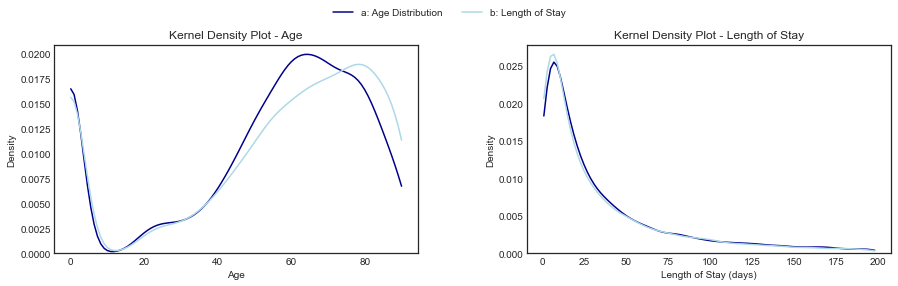

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming 'grouped_df1' is your DataFrame with 'Age_max', 'LOSRD_sum', and 'GENDER' columns

# Set the background style
plt.style.use("seaborn-white")

# Define two shades of blue
dark_blue = "#00008B"  # A dark blue
light_blue = "#ADD8E6"  # A light blue

# Create two figures and axes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Calculate the kernel density estimate for 'Age_max' for each gender
age_max_male = df2[df2["GENDER"] == "Male"]["Age_max"]
age_max_female = df2[df2["GENDER"] == "Female"]["Age_max"]
kde_age_max_male = gaussian_kde(age_max_male)
kde_age_max_female = gaussian_kde(age_max_female)

# Generate x-values for the kernel density estimate
x_age_max = np.linspace(age_max_male.min(), age_max_male.max(), 100)

# Plot the kernel density estimate for 'Age_max' with the dark blue for male and light blue for female
ax1.plot(x_age_max, kde_age_max_male(x_age_max), color=dark_blue, label="Male")
ax1.plot(x_age_max, kde_age_max_female(x_age_max), color=light_blue, label="Female")

# Set the labels and title for the 'Age_max' plot
ax1.set_xlabel("Age")
ax1.set_ylabel("Density")
ax1.set_title("Kernel Density Plot - Age")
ax1.set_ylim(bottom=0)  # Set the y-axis limit to start at zero

# Calculate the kernel density estimate for 'LOSRD_sum' for each gender
aux = df2[df2["LOSRD_sum"] < 200]
losrd_sum_male = aux[aux["GENDER"] == "Male"]["LOSRD_sum"]
losrd_sum_female = aux[aux["GENDER"] == "Female"]["LOSRD_sum"]
kde_losrd_sum_male = gaussian_kde(losrd_sum_male)
kde_losrd_sum_female = gaussian_kde(losrd_sum_female)

# Generate x-values for the kernel density estimate
x_losrd_sum = np.linspace(losrd_sum_male.min(), losrd_sum_male.max(), 100)

# Plot the kernel density estimate for 'LOSRD_sum' with the dark blue for male and light blue for female
ax2.plot(x_losrd_sum, kde_losrd_sum_male(x_losrd_sum), color=dark_blue, label="Male")
ax2.plot(
    x_losrd_sum, kde_losrd_sum_female(x_losrd_sum), color=light_blue, label="Female"
)

# Set the labels and title for the 'LOSRD_sum' plot
ax2.set_xlabel("Length of Stay (days)")
ax2.set_ylabel("Density")
ax2.set_title("Kernel Density Plot - Length of Stay")
ax2.set_ylim(bottom=0)  # Set the y-axis limit to start at zero

# Remove the legends from the individual plots
ax1.legend().remove()
ax2.legend().remove()

# Adjust the layout before adding a common legend
plt.subplots_adjust(wspace=0.3, top=0.85)

# Create a common legend for both plots with corrected labels
fig.legend(labels=["a: Age Distribution", "b: Length of Stay"], loc="upper center", ncol=2)

# Show the plots
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


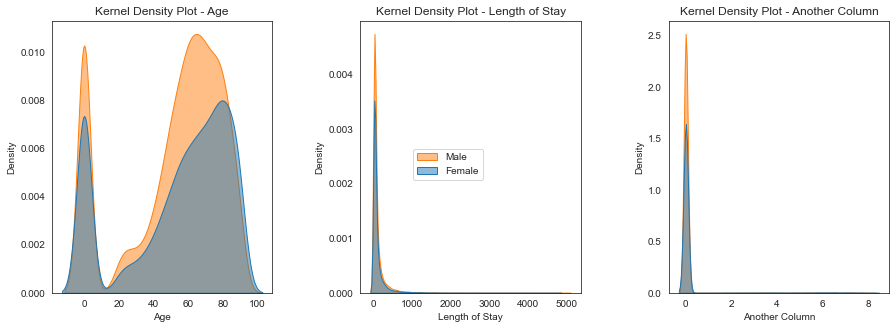

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the 'age' and 'lord' columns

# Set the background color to white
sns.set_style("white")

# Create three subplots in a single figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
sns.kdeplot(
    data=grouped_df1,
    x="Age_max",
    fill=True,
    hue="GENDER",
    color="#ADD8E6",
    alpha=0.5,
    ax=ax1,
)
ax1.set_xlabel("Age")
ax1.set_ylabel("Density")
ax1.set_title("Kernel Density Plot - Age")

# Plot 2
sns.kdeplot(
    data=grouped_df1,
    x="LOSRD_sum",
    fill=True,
    hue="GENDER",
    color="#E0FFFF",
    alpha=0.5,
    ax=ax2,
)
ax2.set_xlabel("Length of Stay")
ax2.set_ylabel("Density")
ax2.set_title("Kernel Density Plot - Length of Stay")

# Plot 3
sns.kdeplot(
    data=grouped_df1,
    x="L_1s_last_p1",
    fill=True,
    hue="GENDER",
    color="#FFC0CB",
    alpha=0.5,
    ax=ax3,
)
ax3.set_xlabel("Another Column")
ax3.set_ylabel("Density")
ax3.set_title("Kernel Density Plot - Another Column")

# Remove the legends from all plots
ax1.legend().remove()
ax2.legend().remove()
ax3.legend().remove()

# Create a common legend for all plots
legend_labels = ["Male", "Female"]
fig.legend(labels=legend_labels, loc="center")

plt.subplots_adjust(wspace=0.4)

# Show the plots
plt.show()

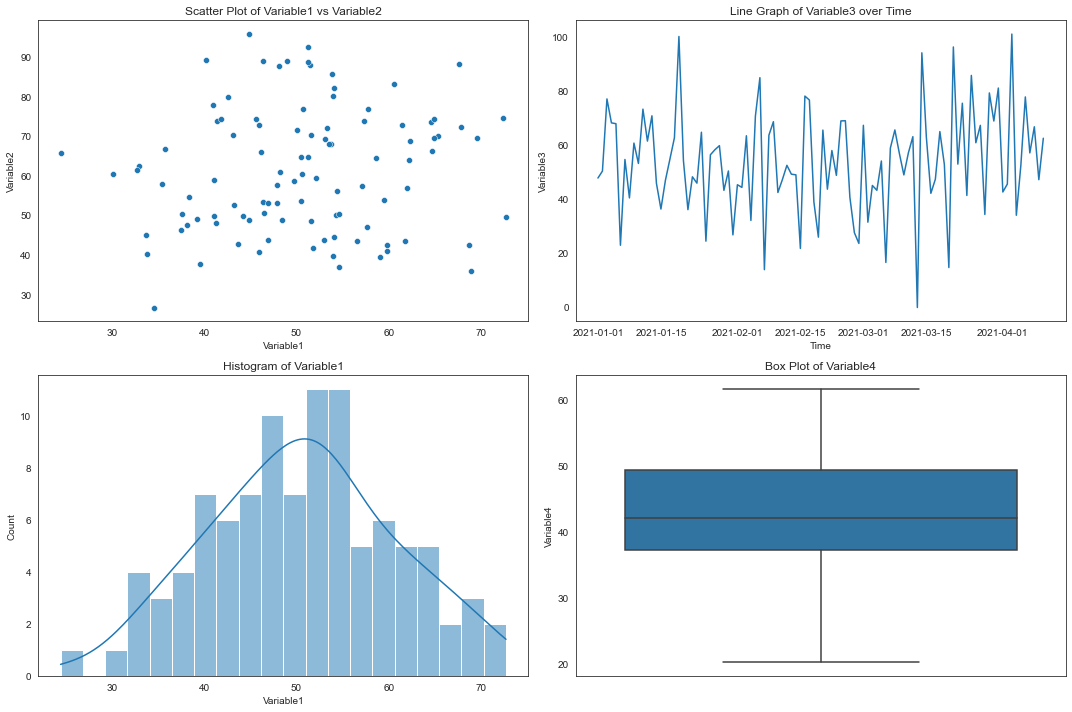

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Generate some sample data
np.random.seed(0)
data = pd.DataFrame(
    {
        "Variable1": np.random.normal(loc=50, scale=10, size=100),
        "Variable2": np.random.normal(loc=60, scale=15, size=100),
        "Variable3": np.random.normal(loc=55, scale=20, size=100),
        "Time": pd.date_range("20210101", periods=100),
    }
)

data["Variable4"] = (
    data["Variable1"] * 0.5
    + data["Variable2"] * 0.3
    + np.random.normal(loc=0, scale=5, size=100)
)

# Create a 2x2 grid of plots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Scatter Plot
sns.scatterplot(x="Variable1", y="Variable2", data=data, ax=ax[0, 0])
ax[0, 0].set_title("Scatter Plot of Variable1 vs Variable2")

# Line Graph
sns.lineplot(x="Time", y="Variable3", data=data, ax=ax[0, 1])
ax[0, 1].set_title("Line Graph of Variable3 over Time")

# Histogram
sns.histplot(data["Variable1"], bins=20, kde=True, ax=ax[1, 0])
ax[1, 0].set_title("Histogram of Variable1")

# Box Plot
sns.boxplot(y=data["Variable4"], ax=ax[1, 1])
ax[1, 1].set_title("Box Plot of Variable4")

plt.tight_layout()
plt.show()

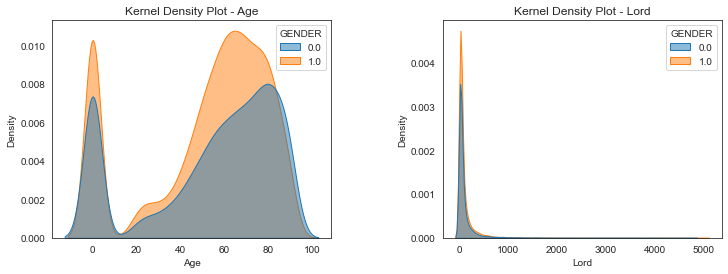

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with the 'age' and 'lord' columns

# Set the background color to white
sns.set_style("white")

# Create two figures and axes side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the kernel density estimate for 'age' with a green shade
sns.kdeplot(
    data=grouped_df1,
    x="Age_max",
    fill=True,
    hue="GENDER",
    color="green",
    alpha=0.5,
    ax=ax1,
)

# Set the labels and title for the 'age' plot
ax1.set_xlabel("Age")
ax1.set_ylabel("Density")
ax1.set_title("Kernel Density Plot - Age")

# Plot the kernel density estimate for 'lord' with a green shade
sns.kdeplot(
    data=grouped_df1,
    x="LOSRD_sum",
    fill=True,
    hue="GENDER",
    color="green",
    alpha=0.5,
    ax=ax2,
)

# Set the labels and title for the 'lord' plot
ax2.set_xlabel("Lord")
ax2.set_ylabel("Density")
ax2.set_title("Kernel Density Plot - Lord")

# Change the majority of 'GENDER' labels to 'Male' (1.0) and the minority to 'Female' (0.0)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plots
plt.show()

# Preds

In [1]:
from function_pred import *
%load_ext autoreload
%autoreload 2
days = '30'
ejemplo_dir = './input_model_pred/'
archivo_input_label = 'data_preprocess_non_filtered.csv'


path = "./input_model_pred/" + "images"
days_list = ["90"]
ficheros = read_director(ejemplo_dir)
len(ficheros)


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


['.DS_Store', 'cat_threshold .88 most frequent_outs_visit_non_filtered.csv', 'cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv', 'cat_threshold .999 most frequent_outs_visit_non_filtered.csv', 'cat_threshold .98 most frequent_outs_visit_non_filtered.csv', 'sin_codigo_non_filtered.csv', 'CCS CODES_proc_outs_visit_non_filtered.csv', 'ICD9_CODE_procedures_outs_visit_non_filtered.csv']


7

In [17]:
for i in ficheros:
    print(i)

ficheros = [i for i in ficheros if i != "sin_codigo_non_filtered.csv"]
ficheros

cat_threshold .88 most frequent_outs_visit_non_filtered.csv
cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv
cat_threshold .999 most frequent_outs_visit_non_filtered.csv
cat_threshold .98 most frequent_outs_visit_non_filtered.csv
CCS CODES_proc_outs_visit_non_filtered.csv
ICD9_CODE_procedures_outs_visit_non_filtered.csv


['cat_threshold .88 most frequent_outs_visit_non_filtered.csv',
 'cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv',
 'cat_threshold .999 most frequent_outs_visit_non_filtered.csv',
 'cat_threshold .98 most frequent_outs_visit_non_filtered.csv',
 'CCS CODES_proc_outs_visit_non_filtered.csv',
 'ICD9_CODE_procedures_outs_visit_non_filtered.csv']

In [34]:
X_aux = pd.read_csv(
    ejemplo_dir+'cat_threshold .88 most frequent_outs_visit_non_filtered.csv')
X_aux.columns[-17:]


Index(['9971', '9983', 'SUBJECT_ID', 'HADM_ID', 'Age_max', 'LOSRD_sum',
       'L_1s_last', 'LOSRD_avg', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'RELIGION', 'MARITAL_STATUS',
       'ETHNICITY', 'GENDER', 'L_1s_last_p1'],
      dtype='object')

In [35]:
dataframes = []
for i in ficheros:
    if i in [
        "ICD9_CODE_procedures.csv",
        "CCS CODES_proc.csv",
        "cat_threshold .999 most frequent",
    ]:
        prepo = "max"
    elif i in [
        "cat_threshold .95 most frequent_proc",
        "cat_threshold .88 most frequent",
    ]:
        prepo = "power"
    else:
        prepo = "std"
    print(prepo)

    # se obtiene la matriz de features y la variable response
    X_aux = pd.read_csv(ejemplo_dir + i)

    # if it's not BERT embedding, we do the preprocessing
    X_aux = X_aux.drop(
        [
            "HADM_ID",
            "SUBJECT_ID",
            "Unnamed: 0",
            "L_1s_last",
            "HADM_ID",
            "Age_max",
            "LOSRD_sum",
            "L_1s_last",
            "LOSRD_avg",
            "ADMISSION_TYPE",
            "ADMISSION_LOCATION",
            "DISCHARGE_LOCATION",
            "INSURANCE",
            "RELIGION",
            "MARITAL_STATUS",
            "ETHNICITY",
            "GENDER",
            "L_1s_last_p1",
        ],
        axis=1,
    )

    try:
        X = X_aux.values
        dataframes.append(pd.DataFrame(X))
    except:
        pass

std
std
std
std
std
std


In [25]:
dataframes[0]


0    1         2    3    4    5    6    7    8    9    ...   218  \
0      0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   3.0   
1      0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  10.0   
2      0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   7.0   
3      0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   2.0   
4      0.000014  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  16.0   
...         ...  ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
50560  0.000000  0.0  0.000005  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  16.0   
50561  0.000009  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  12.0   
50562  0.000000  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   2.0   
50563  0.000009  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   3.0   
50564  0.000009  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   5.0   

       219  220   221  222   223  224   225  226  227  
0      2.0  4.0   4.0  3.0  14.0  6.0   2.0  1.0  0.0  
1      1.0  2.0  15.0  2.0   3.0  2.0  36.0  1.0  0.0  
2      1.0  2.0   6.0  3.0  16.0  4.0  36.0  0.0  0.0  
3      2.0  4.0   4.0  3.0   2.0  6.0   2.0  1.0  0.0  
4      0.0  4.0   5.0  2.0  14.0  2.0  36.0  0.0  0.0  
...    ...  ...   ...  ...   ...  ...   ...  ...  ...  
50560  1.0  2.0   5.0  3.0  10.0  2.0  36.0  1.0  0.0  
50561  0.0  4.0   4.0  3.0  14.0  2.0  36.0  1.0  0.0  
50562  1.0  1.0  15.0  2.0   3.0  7.0  36.0  0.0  0.0  
50563  0.0  4.0   4.0  2.0  14.0  2.0  36.0  0.0  0.0  
50564  0.0  4.0  15.0  2.0   9.0  3.0  17.0  0.0  0.0  

[50565 rows x 228 columns]

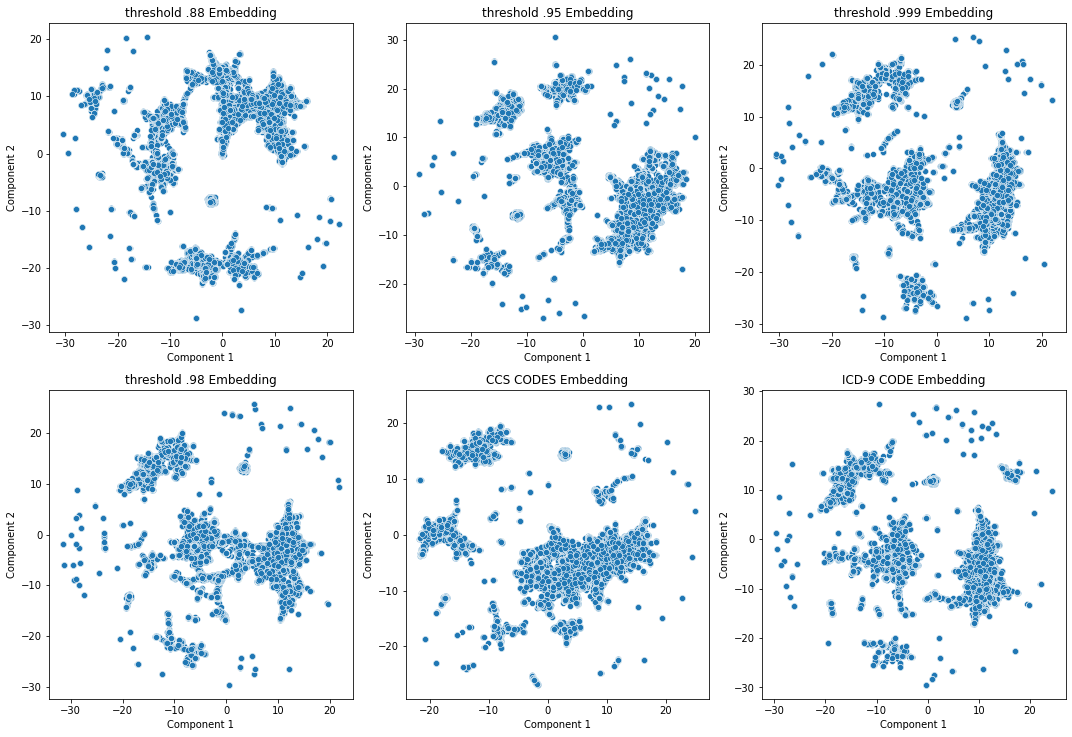

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pacmap

# Assuming you have a list of 7 DataFrames
# dataframes = [df1, df2, df3, df4, df5, df6, df7]
title = [
    "threshold .88",
    "threshold .95",
    "threshold .999",
    "threshold .98",
    "CCS CODES",
    "ICD-9 CODE",
]
# Set up the matplotlib figure
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15)
)  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easy looping

# Loop through each DataFrame, perform PaCMAP embedding, and create a subplot
for i, df in enumerate(dataframes):
    # Perform PaCMAP embedding for each DataFrame
    embedding = pacmap.PaCMAP(
        n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0
    )
    X_transformed = embedding.fit_transform(df, init="pca")

    # Plotting the transformed data
    sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], ax=axes[i])
    axes[i].set_title(title[i] + " Embedding")
    axes[i].set_xlabel("Component 1")
    axes[i].set_ylabel("Component 2")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## preds results

In [43]:
res = pd.read_csv("./results_pred/results_prediction_30+_realv3.csv")

In [42]:
res.shape


(56, 18)

In [43]:
res.drop_duplicates()


(56, 18)

In [46]:
res.columns


Index(['Unnamed: 0', 'f1_test', 'f1_train', 'sensitivity_test',
       'specificity_test', 'precision_test', 'accuracy_test',
       'sensitivity_train', 'specificity_train', 'precision_train',
       'accuracy_train', 'confusion matrix', 'Sampling', 'Feature selection',
       'Classifiers', 'Mapping', 'var_change', 'var_ini'],
      dtype='object')

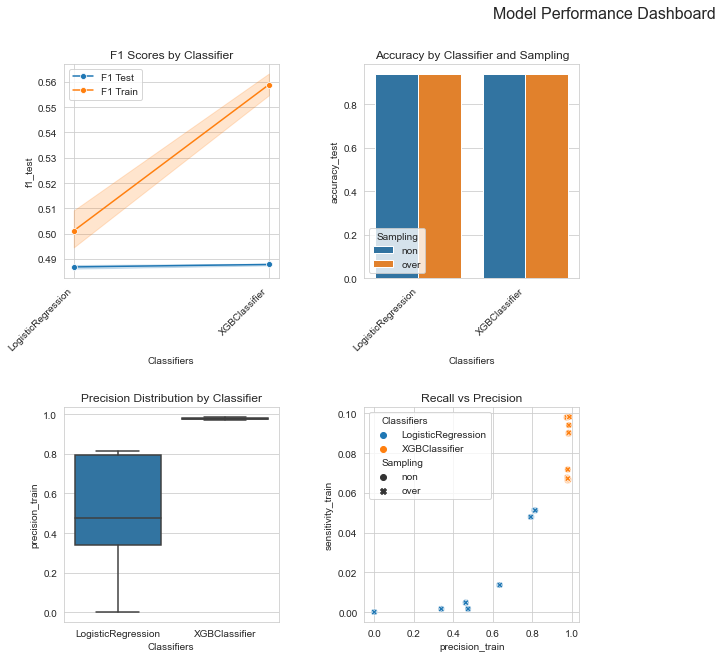

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe with the data
# df = pd.read_csv('your_data.csv')  # If your data is in a CSV file

# Set the style
sns.set_style("whitegrid")

# Create a figure for the combined dashboard
fig = plt.figure(figsize=(20, 10))

# Create a grid for the subplots
grid = plt.GridSpec(2, 4, hspace=0.6, wspace=0.4)

# Add a line chart for F1 scores on the top left of the grid
ax1 = fig.add_subplot(grid[0, 0])
sns.lineplot(
    data=res, x="Classifiers", y="f1_test", marker="o", label="F1 Test", ax=ax1
)
sns.lineplot(
    data=res, x="Classifiers", y="f1_train", marker="o", label="F1 Train", ax=ax1
)
ax1.set_title("F1 Scores by Classifier")
ax1.set_xticklabels(res["Classifiers"].unique(), rotation=45, ha="right")

# Add a bar chart for accuracy on the top right of the grid
ax2 = fig.add_subplot(grid[0, 1])
sns.barplot(data=res, x="Classifiers", y="accuracy_test", hue="Sampling", ax=ax2)
ax2.set_title("Accuracy by Classifier and Sampling")
ax2.set_xticklabels(res["Classifiers"].unique(), rotation=45, ha="right")

# Add a box plot for precision on the bottom left of the grid
ax3 = fig.add_subplot(grid[1, 0])
sns.boxplot(data=res, x="Classifiers", y="precision_train", ax=ax3)
ax3.set_title("Precision Distribution by Classifier")
# ax3.set_xticklabels(df['Classifiers'].unique(), rotation=45, ha='right')

# Add a scatter plot for recall vs. precision on the bottom right of the grid
ax4 = fig.add_subplot(grid[1, 1])
sns.scatterplot(
    data=res,
    x="precision_train",
    y="sensitivity_train",
    hue="Classifiers",
    style="Sampling",
    ax=ax4,
)
ax4.set_title("Recall vs Precision")

# Adjust subplots
plt.subplots_adjust(top=0.9)

# Add an overall title
plt.suptitle("Model Performance Dashboard", fontsize=16)

# Show the plot
plt.show()

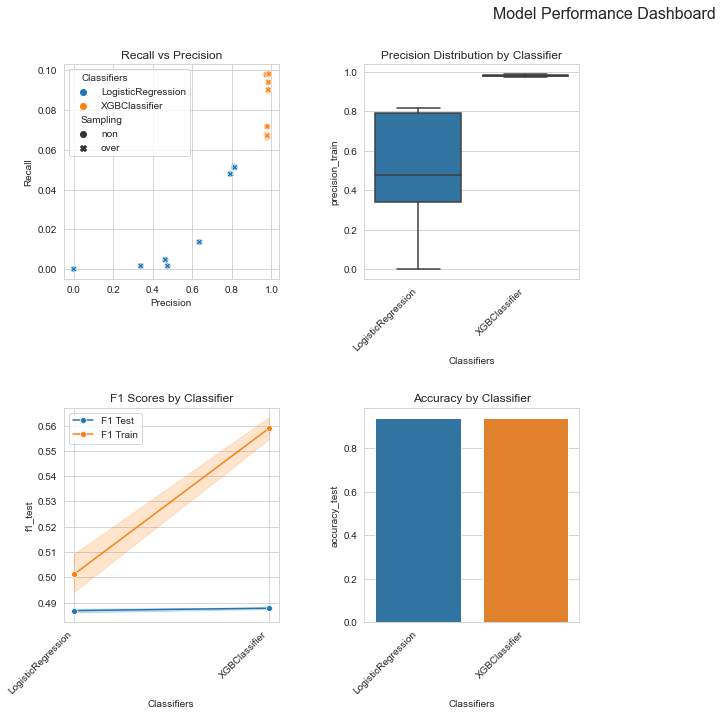

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe with the data
# df = pd.read_csv('your_data.csv')  # If your data is in a CSV file

# Set the style
sns.set_style("whitegrid")

# Create a figure for the combined dashboard
fig = plt.figure(figsize=(20, 10))

# Create a grid for the subplots
grid = plt.GridSpec(2, 4, hspace=0.6, wspace=0.4)

# Add a scatter plot for recall vs. precision on the top left of the grid
ax1 = fig.add_subplot(grid[0, 0])
sns.scatterplot(
    data=res,
    x="precision_train",
    y="sensitivity_train",
    hue="Classifiers",
    style="Sampling",
    ax=ax1,
)
ax1.set_title("Recall vs Precision")
ax1.set_xlabel("Precision")
ax1.set_ylabel("Recall")

# Add a box plot for precision on the top right of the grid
ax2 = fig.add_subplot(grid[0, 1])
sns.boxplot(data=res, x="Classifiers", y="precision_train", ax=ax2)
ax2.set_title("Precision Distribution by Classifier")
ax2.set_xticklabels(res["Classifiers"].unique(), rotation=45, ha="right")

# Add a line chart for F1 scores on the bottom left of the grid
ax3 = fig.add_subplot(grid[1, 0])
sns.lineplot(
    data=res, x="Classifiers", y="f1_test", marker="o", label="F1 Test", ax=ax3
)
sns.lineplot(
    data=res, x="Classifiers", y="f1_train", marker="o", label="F1 Train", ax=ax3
)
ax3.set_title("F1 Scores by Classifier")
ax3.set_xticklabels(res["Classifiers"].unique(), rotation=45, ha="right")

# Add a bar chart for accuracy on the bottom right of the grid
ax4 = fig.add_subplot(grid[1, 1])
sns.barplot(data=res, x="Classifiers", y="accuracy_test", ax=ax4)
ax4.set_title("Accuracy by Classifier")
ax4.set_xticklabels(res["Classifiers"].unique(), rotation=45, ha="right")

# Adjust subplots
plt.subplots_adjust(top=0.9)

# Add an overall title
plt.suptitle("Model Performance Dashboard", fontsize=16)

# Show the plot
plt.show()

In [62]:
res["Classifiers"].unique()


array(['LogisticRegression', 'XGBClassifier'], dtype=object)

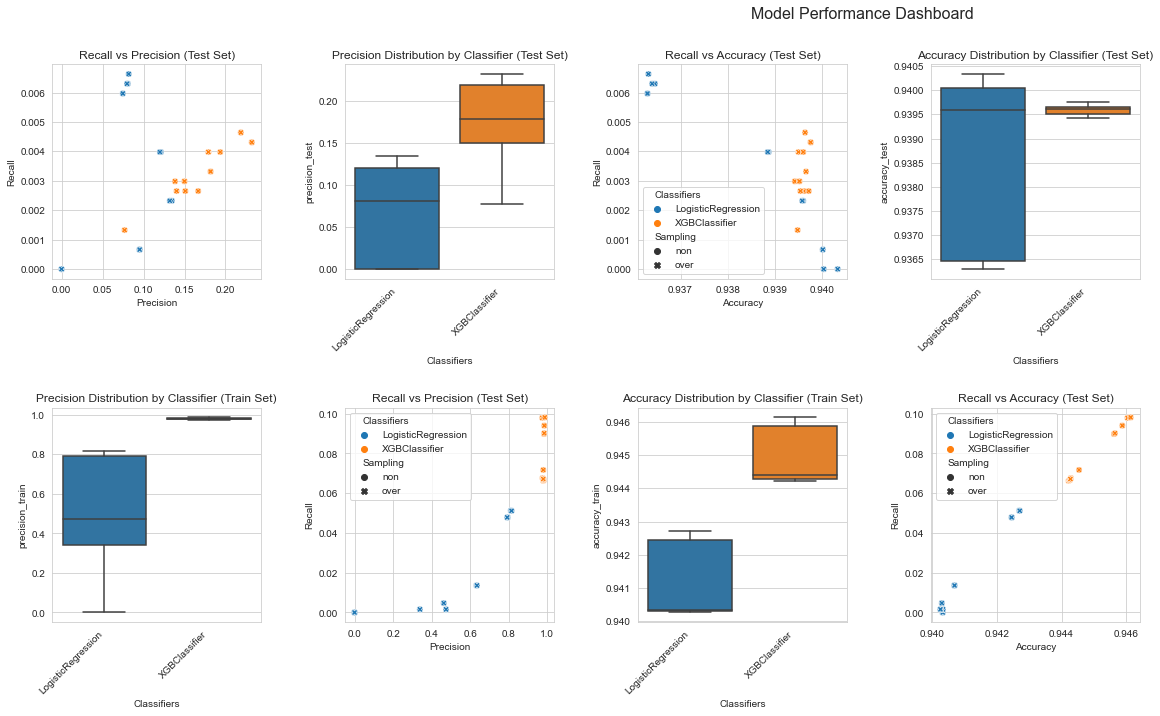

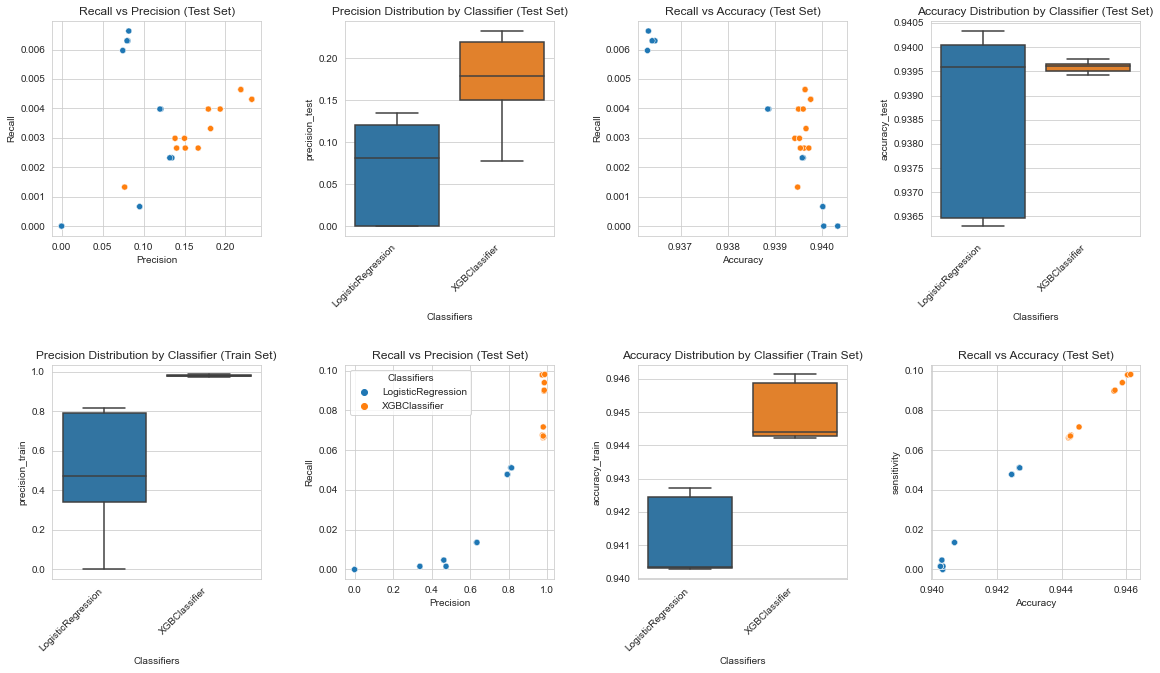

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe with the data
# df = pd.read_csv('your_data.csv')  # If your data is in a CSV file

# Set the style
sns.set_style("whitegrid")

# Create a figure for the combined dashboard
fig = plt.figure(figsize=(30, 10))

# Create a grid for the subplots
grid = plt.GridSpec(2, 6, hspace=0.6, wspace=0.4)

# Add a scatter plot for recall vs. precision on the top left of the grid (using test set data)
ax1 = fig.add_subplot(grid[0, 0])
scatterplot = sns.scatterplot(
    data=res, x="precision_test", y="sensitivity_test", hue="Classifiers", ax=ax1
)
ax1.set_title("Recall vs Precision (Test Set)")
ax1.set_xlabel("Precision")
ax1.set_ylabel("Recall")

# Add a box plot for precision on the top right of the grid (using test set data)
ax2 = fig.add_subplot(grid[0, 1])
sns.boxplot(data=res, x="Classifiers", y="precision_test", ax=ax2)
ax2.set_title("Precision Distribution by Classifier (Test Set)")
ax2.set_xticklabels(res["Classifiers"].unique(), rotation=45, ha="right")

# Add a line chart for F1 scores on the bottom left of the grid
ax3 = fig.add_subplot(grid[1, 0])
sns.boxplot(data=res, x="Classifiers", y="precision_train", ax=ax3)
ax3.set_title("Precision Distribution by Classifier (Train Set)")
ax3.set_xticklabels(res["Classifiers"].unique(), rotation=45, ha="right")

# Add a bar chart for accuracy on the bottom right of the grid
ax4 = fig.add_subplot(grid[1, 1])
sns.scatterplot(
    data=res, x="precision_train", y="sensitivity_train", hue="Classifiers", ax=ax4
)
ax4.set_title("Recall vs Precision (Test Set)")
ax4.set_xlabel("Precision")
ax4.set_ylabel("Recall")

# Add a scatter plot for recall vs. accuracy on the top middle of the grid (using test set data)
ax5 = fig.add_subplot(grid[0, 2])
sns.scatterplot(
    data=res, x="accuracy_test", y="sensitivity_test", hue="Classifiers", ax=ax5
)
ax5.set_title("Recall vs Accuracy (Test Set)")
ax5.set_xlabel("Accuracy")
ax5.set_ylabel("Recall")

# Add a box plot for accuracy on the top right of the grid (using test set data)
ax6 = fig.add_subplot(grid[0, 3])
sns.boxplot(data=res, x="Classifiers", y="accuracy_test", ax=ax6)
ax6.set_title("Accuracy Distribution by Classifier (Test Set)")
ax6.set_xticklabels(res["Classifiers"].unique(), rotation=45, ha="right")

# Add a line chart for F1 scores on the bottom middle of the grid
ax7 = fig.add_subplot(grid[1, 2])
sns.boxplot(data=res, x="Classifiers", y="accuracy_train", ax=ax7)
ax7.set_title("Accuracy Distribution by Classifier (Train Set)")
ax7.set_xticklabels(res["Classifiers"].unique(), rotation=45, ha="right")

# Add a bar chart for accuracy on the bottom right of the grid
ax8 = fig.add_subplot(grid[1, 3])
sns.scatterplot(
    data=res, x="accuracy_train", y="sensitivity_train", hue="Classifiers", ax=ax8
)
ax8.set_title("Recall vs Accuracy (Test Set)")
ax8.set_xlabel("Accuracy")
ax8.set_ylabel("sensitivity")

# Remove the legend from all scatter plots except the first one
for ax in [ax1, ax5, ax8]:
    try:
        ax.get_legend().remove()
    except:
        pass

# Adjust subplots
plt.subplots_adjust(top=0.9)

# Add an overall title
plt.suptitle("", fontsize=16)

# Show the plot
plt.show()

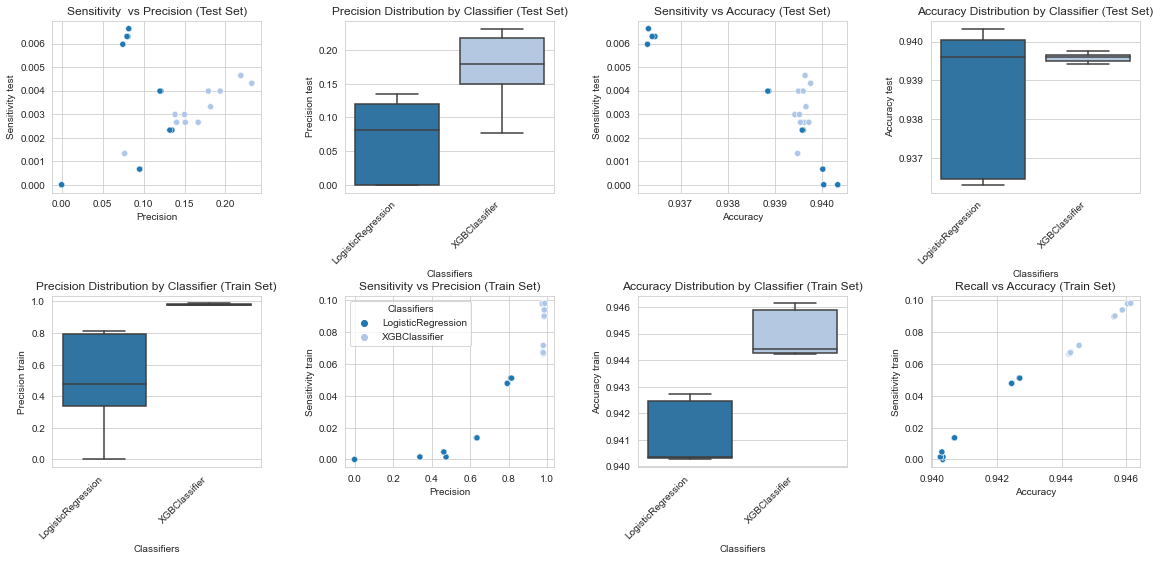

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe with the data
# df = pd.read_csv('your_data.csv')  # If your data is in a CSV file

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette(["#1f77b4", "#aec7e8"])

# Create a figure for the combined dashboard
fig = plt.figure(figsize=(30, 8))

# Create a grid for the subplots
grid = plt.GridSpec(2, 6, hspace=0.6, wspace=0.4)

# Add a scatter plot for recall vs. precision on the top left of the grid (using test set data)
ax1 = fig.add_subplot(grid[0, 0])
scatterplot = sns.scatterplot(
    data=res, x="precision_test", y="sensitivity_test", hue="Classifiers", ax=ax1
)
ax1.set_title("Sensitivity  vs Precision (Test Set)")
ax1.set_xlabel("Precision")
ax1.set_ylabel("Sensitivity test")  # Change the y-axis label here

# Add a box plot for precision on the top right of the grid (using test set data)
ax2 = fig.add_subplot(grid[0, 1])
sns.boxplot(data=res, x="Classifiers", y="precision_test", ax=ax2)
ax2.set_title("Precision Distribution by Classifier (Test Set)")
ax2.set_xticklabels(res["Classifiers"].unique(), rotation=45, ha="right")
ax2.set_ylabel("Precision test")
# Add a line chart for F1 scores on the bottom left of the grid
ax3 = fig.add_subplot(grid[1, 0])
sns.boxplot(data=res, x="Classifiers", y="precision_train", ax=ax3)
ax3.set_title("Precision Distribution by Classifier (Train Set)")
ax3.set_xticklabels(res["Classifiers"].unique(), rotation=45, ha="right")
ax3.set_ylabel("Precision train")

# Add a bar chart for accuracy on the bottom right of the grid
ax4 = fig.add_subplot(grid[1, 1])
sns.scatterplot(
    data=res, x="precision_train", y="sensitivity_train", hue="Classifiers", ax=ax4
)
ax4.set_title("Sensitivity vs Precision (Train Set)")
ax4.set_xlabel("Precision")
ax4.set_ylabel("Sensitivity train")  # Change the y-axis label here

# Add a scatter plot for recall vs. accuracy on the top middle of the grid (using test set data)
ax5 = fig.add_subplot(grid[0, 2])
sns.scatterplot(
    data=res, x="accuracy_test", y="sensitivity_test", hue="Classifiers", ax=ax5
)
ax5.set_title("Sensitivity vs Accuracy (Test Set)")
ax5.set_xlabel("Accuracy")
ax5.set_ylabel("Sensitivity test")  # Change the y-axis label here

# Add a box plot for accuracy on the top right of the grid (using test set data)
ax6 = fig.add_subplot(grid[0, 3])
sns.boxplot(data=res, x="Classifiers", y="accuracy_test", ax=ax6)
ax6.set_title("Accuracy Distribution by Classifier (Test Set)")
ax6.set_xticklabels(res["Classifiers"].unique(), rotation=45, ha="right")
ax6.set_ylabel("Accuracy test")
# Add a line chart for F1 scores on the bottom middle of the grid
ax7 = fig.add_subplot(grid[1, 2])
sns.boxplot(data=res, x="Classifiers", y="accuracy_train", ax=ax7)
ax7.set_title("Accuracy Distribution by Classifier (Train Set)")
ax7.set_xticklabels(res["Classifiers"].unique(), rotation=45, ha="right")
ax7.set_ylabel("Accuracy train")

# Add a bar chart for accuracy on the bottom right of the grid
ax8 = fig.add_subplot(grid[1, 3])
sns.scatterplot(
    data=res, x="accuracy_train", y="sensitivity_train", hue="Classifiers", ax=ax8
)
ax8.set_title("Recall vs Accuracy (Train Set)")
ax8.set_xlabel("Accuracy")
ax8.set_ylabel("Sensitivity train")  # Change the y-axis label here

# Remove the legend from all scatter plots except the first one
for ax in [ax1, ax5, ax8]:
    try:
        ax.get_legend().remove()
    except:
        pass

# Adjust subplots
plt.subplots_adjust(top=0.9)

# Add an overall title
plt.suptitle("", fontsize=16)

# Show the plot
plt.show()

In [105]:
res.head()


Unnamed: 0   f1_test  f1_train  sensitivity_test  specificity_test  \
0           0  0.489431  0.533389          0.006300          0.995457   
1           1  0.489410  0.533333          0.006300          0.995394   
2           2  0.489431  0.533389          0.006300          0.995457   
3           3  0.489410  0.533333          0.006300          0.995394   
4           4  0.485701  0.548869          0.001326          0.998991   

   precision_test  accuracy_test  sensitivity_train  specificity_train  \
0        0.080851       0.936458           0.051227           0.999243   
1        0.079832       0.936399           0.051144           0.999264   
2        0.080851       0.936458           0.051227           0.999243   
3        0.079832       0.936399           0.051144           0.999264   
4        0.076923       0.939484           0.067639           0.999895   

   precision_train  accuracy_train                 confusion matrix Sampling  \
0         0.811024        0.942698  [[47333   216]\n [ 2997    19]]      non   
1         0.815059        0.942712  [[47330   219]\n [ 2997    19]]      non   
2         0.811024        0.942698  [[47333   216]\n [ 2997    19]]     over   
3         0.815059        0.942712  [[47330   219]\n [ 2997    19]]     over   
4         0.976077        0.944290  [[47501    48]\n [ 3012     4]]      non   

   Feature selection         Classifiers  \
0               True  LogisticRegression   
1              False  LogisticRegression   
2               True  LogisticRegression   
3              False  LogisticRegression   
4               True       XGBClassifier   

                                            Mapping  var_change  var_ini  
0  ICD9_CODE_procedures_outs_visit_non_filtered.csv         182     2005  
1  ICD9_CODE_procedures_outs_visit_non_filtered.csv           0     2005  
2  ICD9_CODE_procedures_outs_visit_non_filtered.csv         182     2005  
3  ICD9_CODE_procedures_outs_visit_non_filtered.csv           0     2005  
4  ICD9_CODE_procedures_outs_visit_non_filtered.csv         182     2005

In [104]:
res.columns


Index(['Unnamed: 0', 'f1_test', 'f1_train', 'sensitivity_test',
       'specificity_test', 'precision_test', 'accuracy_test',
       'sensitivity_train', 'specificity_train', 'precision_train',
       'accuracy_train', 'confusion matrix', 'Sampling', 'Feature selection',
       'Classifiers', 'Mapping', 'var_change', 'var_ini'],
      dtype='object')

In [106]:
res["Mapping"] = res["Mapping"].replace(
    "CCS CODES_proc_outs_visit_non_filtered.csv", "CCS CODES"
)
res["Mapping"] = res["Mapping"].replace(
    "ICD9_CODE_procedures_outs_visit_non_filtered.csv", "ICD-9 CODES"
)
res["Mapping"] = res["Mapping"].replace(
    "cat_threshold .95 most frequent_proc_outs_visit_non_filtered.csv", "threshold .95"
)
res["Mapping"] = res["Mapping"].replace(
    "cat_threshold .88 most frequent_outs_visit_non_filtered.csv", "threshold .88"
)
res["Mapping"] = res["Mapping"].replace(
    "cat_threshold .999 most frequent_outs_visit_non_filtered.csv", "threshold .999"
)
res["Mapping"] = res["Mapping"].replace(
    "cat_threshold .98 most frequent_outs_visit_non_filtered.csv", "threshold .98"
)
res["Mapping"] = res["Mapping"].replace("sin_codigo_non_filtered.csv", "No ICD9-Codes")

In [113]:
pivot_df


var_change  var_ini
Mapping                            
CCS CODES                5      232
ICD-9 CODES            182     2005
No ICD9-Codes            0       11
threshold .88            1      227
threshold .95            6      455
threshold .98           16      763
threshold .999          92     1776

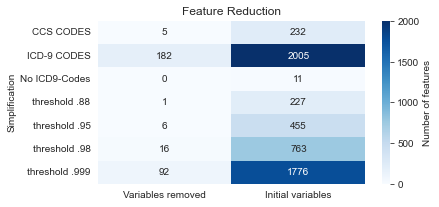

In [125]:
df = res[res["Feature selection"] == True]

# Pivot the DataFrame for the heatmap
pivot_df = df.pivot_table(
    index=[
        "Mapping",
    ],
    values=["var_change", "var_ini"],
)
pivot_df = pivot_df.rename(
    columns={"var_change": "Variables removed", "var_ini": "Initial variables"}
)
plt.figure(figsize=(6, 3))
heatmap = sns.heatmap(
    pivot_df, cmap="Blues", annot=True, fmt=".0f"
)  # Change the cmap to 'Blues' for different shades of blue
heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=0
)  # Change the x-axis labels rotation if needed
heatmap.set_yticklabels(
    heatmap.get_yticklabels(), rotation=0
)  # Change the y-axis labels rotation if needed
plt.xlabel("")  # Change the x-axis label here
plt.ylabel("Simplification")  # Change the y-axis label here

# Change the 'var_change' and 'var_ini' labels in the colorbar
colorbar = heatmap.collections[0].colorbar
colorbar.set_label("Number of features")

plt.title("Feature Reduction")
plt.show()

# demografics

In [159]:
df = pd.read_csv("./data/data_preprocess_non_filtered.csv")
pd.set_option("display.max_columns", None)

In [100]:
df.columns


Index(['Unnamed: 0', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'GENDER', 'EXPIRE_FLAG', 'DOB', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'LOSRD', 'age', 'year_age', 'ICD9_CODE_procedures',
       'CCS CATEGORY DESCRIPTION_proc', 'CCS CODES_proc',
       'cat_threshold .95 most frequent_proc'],
      dtype='object')

In [160]:
df = pd.read_csv("./data/procedures_preprocess_threshold_nonfiltered.csv")
df.columns

Index(['Unnamed: 0', 'SUBJECT_ID', 'HADM_ID', 'ICD9_CODE', ''ICD-9-CM CODE'',
       ''CCS CATEGORY'', ''CCS CATEGORY DESCRIPTION'',
       ''ICD-9-CM CODE DESCRIPTION'', 'CCS CODES', 'LEVE3 CODES',
       'cat_threshold .999 most frequent', 'cat_threshold .95 most frequent',
       'cat_threshold .98 most frequent', 'cat_threshold .88 most frequent'],
      dtype='object')

In [161]:
result = df.groupby(["'ICD-9-CM CODE DESCRIPTION'"]).size().reset_index(name="Count")

In [162]:
result
# 2022

'ICD-9-CM CODE DESCRIPTION'  Count
0       (ARTHRPLST) SHOULDER WIT(Begin 1989)      8
1      (CLOS)BX SALIV GLAND/DUCT(Begin 1988)      1
2        (CLOSED) BIOPSY LARYNX (Begin 1988)     19
3     (CLOSED) BIOPSY OF TONGUE (Begin 1988)      7
4       (CLOSED) BIOPSY TRACHEA (Begin 1988)     11
...                                      ...    ...
2017                  WOUND CATHETER IRRIGAT      1
2018          WOUND DEBRIDEMENT (Begin 1988)    698
2019                    WOUND IRRIGATION NEC     73
2020                      WRIST JOINT BIOPSY      1
2021                       WRIST SYNOVECTOMY      3

[2022 rows x 2 columns]

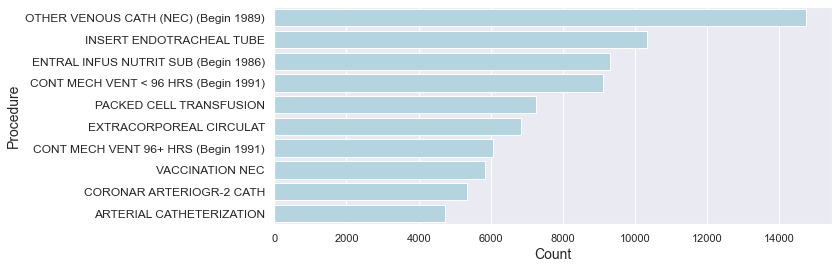

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que df es tu DataFrame
result = df.groupby(["'ICD-9-CM CODE DESCRIPTION'"]).size().reset_index(name="Count")
result = result.sort_values(by="Count", ascending=False)[:10]

plt.figure(
    figsize=(10, 4)
)  # Cambia las dimensiones para acomodar las barras verticales
sns.barplot(x="Count", y="'ICD-9-CM CODE DESCRIPTION'", data=result, color="lightblue")
plt.yticks(
    fontsize=12
)  # Ajusta el tamaño de fuente de las etiquetas del eje y si es necesario
plt.ylabel("Procedure", fontsize=14)  # El eje y ahora tiene las descripciones
plt.xlabel("Count", fontsize=14)  # El eje x ahora tiene los conteos
#plt.title("Top 10 Most Frequent Procedures", fontsize=16)

plt.show()

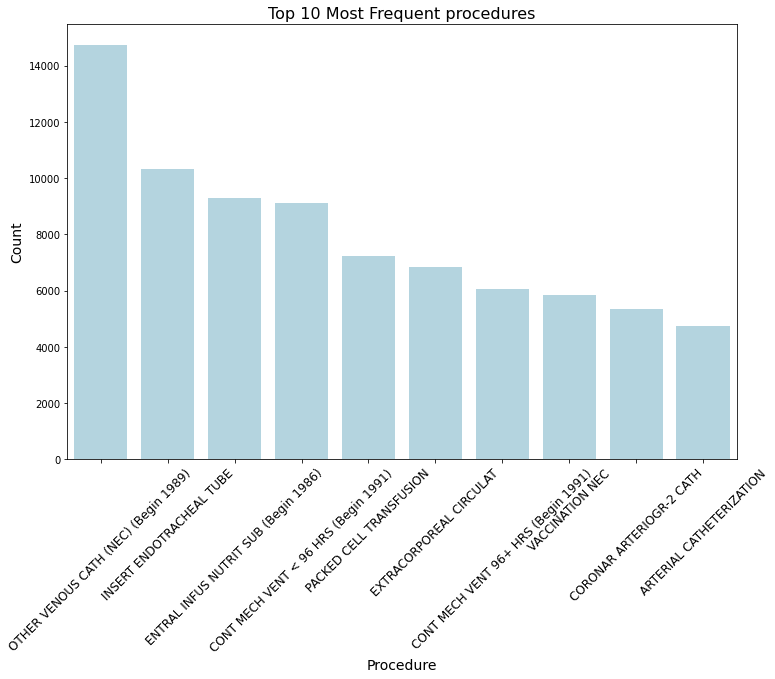

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

result = df.groupby(["'ICD-9-CM CODE DESCRIPTION'"]).size().reset_index(name="Count")
result = result.sort_values(by="Count", ascending=False)[:10]

plt.figure(figsize=(12, 8))
sns.barplot(x="'ICD-9-CM CODE DESCRIPTION'", y="Count", data=result, color="lightblue")
plt.xticks(rotation=45, fontsize=12)  # Increase the font size of x-axis labels
plt.xlabel("Procedure", fontsize=14)  # Increase the font size of x-axis label
plt.ylabel("Count", fontsize=14)  # Increase the font size of y-axis label
plt.title(
    "Top 10 Most Frequent procedures", fontsize=16
)  # Increase the font size of the title

plt.show()

In [68]:
result_subject = df.groupby("SUBJECT_ID").size().reset_index(name="Count")

# Count per admission ID
result_admission = df.groupby("HADM_ID").size().reset_index(name="Count")

In [92]:
result_subject_1 = result_subject[result_subject["Count"] < 40]
result_admission_1 = result_admission[result_admission["Count"] < 20]

In [75]:
result_subject_1.shape[0] / result_subject.shape[0]

0.9973705405789548

In [77]:
result_subject.describe()


SUBJECT_ID         Count
count  42214.000000  42214.000000
mean   33737.126167      5.687568
std    28077.544364      5.621808
min        2.000000      1.000000
25%    12014.250000      2.000000
50%    24094.500000      4.000000
75%    53951.500000      7.000000
max    99999.000000     98.000000

In [76]:
result_subject_1.shape[0]


42103

In [72]:
result_subject.shape[0]


42214

In [93]:
result_admission_1.shape[0] / result_admission.shape[0]

0.9928411461822636

In [95]:
result_admission.describe()


HADM_ID         Count
count   52243.000000  52243.000000
mean   149993.065636      4.595735
std     28898.851246      3.823601
min    100003.000000      1.000000
25%    124967.500000      2.000000
50%    149991.000000      3.000000
75%    175063.500000      6.000000
max    199999.000000     40.000000

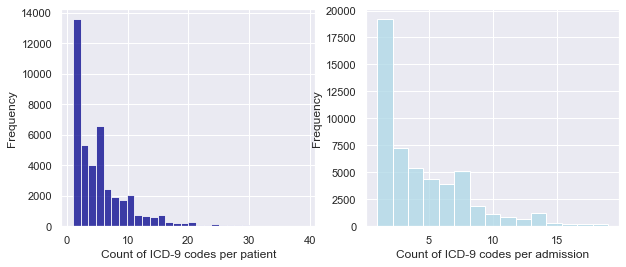

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

# Load the iris dataset
df = sns.load_dataset("iris")

# Create a figure with two matplotlib.Axes objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Assigning a graph to each ax
sns.histplot(data=result_subject_1, x="Count", ax=ax1, color="darkblue", bins=30)
sns.histplot(data=result_admission_1, x="Count", ax=ax2, color="lightblue", bins=15)

# Set x-axis and y-axis labels for each subplot
ax1.set(xlabel="Count of ICD-9 codes per patient", ylabel="Frequency")
ax2.set(xlabel="Count of ICD-9 codes per admission", ylabel="Frequency")
# fig.suptitle('Histograms of ICD-9 procedures codes per patient and admission', fontsize=16)  # Increase the font size of the title
# Show the plot
plt.show()

In [17]:
print(df.GENDER.value_counts())
uq = df.GENDER.unique()
[print(i.replace("'", "")) for i in uq]

M    32950
F    26026
Name: GENDER, dtype: int64
F
M


[None, None]

In [ ]:
print(df.ETHNICITY.value_counts())
uq = df.ETHNICITY.unique()
[print(i.replace("'", "")) for i in uq]

WHITE                                                       40996
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85
WHITE - OT

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
print(df.ETHNICITY.value_counts())
uq = df.ETHNICITY.unique()
[print(i.replace("'", "")) for i in uq]

WHITE                                                       40996
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85
WHITE - OT

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [28]:
from function_mapping import *
%load_ext autoreload
%autoreload 2

df = pd.read_csv("./data/data_preprocess_non_filtered.csv")
pd.set_option('display.max_columns', None)

# Lectures of dataframe that have the procedures icd-9 codes with different threshold
proc = pd.read_csv("./data/procedures_preprocess_threshold_nonfiltered.csv")
grouped = proc.groupby(['SUBJECT_ID', 'HADM_ID']).agg(lambda x: x.tolist())

# Reset
# the index to make 'SUBJECT_ID' and 'HADM_ID' regular columns
grouped_proc = grouped.reset_index()
df1 = grouped_proc.copy()

list_cat = ['CCS CODES_proc', 'cat_threshold .95 most frequent_proc', 'cat_threshold .88 most frequent', 'cat_threshold .98 most frequent',
            'cat_threshold .999 most frequent']

categorical_cols = ['ADMISSION_TYPE', 'ADMISSION_LOCATION',
                    'DISCHARGE_LOCATION', 'INSURANCE',  'RELIGION',
                    'MARITAL_STATUS', 'ETHNICITY', 'GENDER']


nam_p_list = ['CCS CODES_proc', 'cat_threshold .95 most frequent_proc', 'Threshold', 'Threshold',
              'Threshold']

filtered = True
v = "j"


result_stat = {'Name': [],
               'count': [],
               'mean': [],
               'std': [],
               'min': [],
               '25%': [],
               '50%': [],
               '75%': [],
               'max': [],
               "Min >": [],
               "Unique_codes": [],
               "Unique_codes_icd9": []}
list_dataframes = []
for i in range(len(list_cat)):
    nam_p = nam_p_list[i]
    real = list_cat[i]
    df_descon = obtener_ghist(i, df, df1, nam_p, v, real, filtered)
    list_dataframes.append(df_descon)


#df_res = pd.DataFrame(result_stat)
# df_res.to_csv("./results_changes/"+v+"_nonfiltered.csv")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
        SUBJECT_ID  HADM_ID  ICD9_CODE_procedures
0               22   165315                  9671
1               22   165315                  9604
2               22   165315                  9634
3               23   152223                  3613
4               23   152223                  3615
...            ...      ...                   ...
240090       98805   122631                  1742
240091       98813   170407                  9671
240092       98813   170407                  3893
240093       98813   170407                  9604
240094       98813   170407                   966

[240095 rows x 3 columns]
        SUBJECT_ID  HADM_ID CCS CODES_proc_preprocess
0               22   165315                       216
1               22   165315                       216
2               22   165315                       93'
3               23   152223                        44
4              

In [39]:
list_dataframes[1].iloc[:, :4]

index  SUBJECT_ID  HADM_ID  \
0          834           2   163353   
1          835           3   145834   
2          836           3   145834   
3          837           3   145834   
4          838           3   145834   
...        ...         ...      ...   
240090  230744       99999   113369   
240091  230745       99999   113369   
240092  230746       99999   113369   
240093  230747       99999   113369   
240094  230748       99999   113369   

        cat_threshold .95 most frequent_proc_preprocess  
0                                                  9955  
1                                                  3893  
2                                                  9672  
3                                                  9604  
4                                                   966  
...                                                 ...  
240090                                             8108  
240091                                             8051  
240092                                             8451  
240093                                             8162  
240094                                               -1  

[240095 rows x 4 columns]

In [40]:
new_l = [i.iloc[:, :4] for i in list_dataframes]

In [46]:
df = list_dataframes[1]
df.head()


index  SUBJECT_ID  HADM_ID  \
0    834           2   163353   
1    835           3   145834   
2    836           3   145834   
3    837           3   145834   
4    838           3   145834   

   cat_threshold .95 most frequent_proc_preprocess  ICD9_CODE_procedures  
0                                             9955                  9671  
1                                             3893                  9604  
2                                             9672                  9634  
3                                             9604                  3613  
4                                              966                  3615

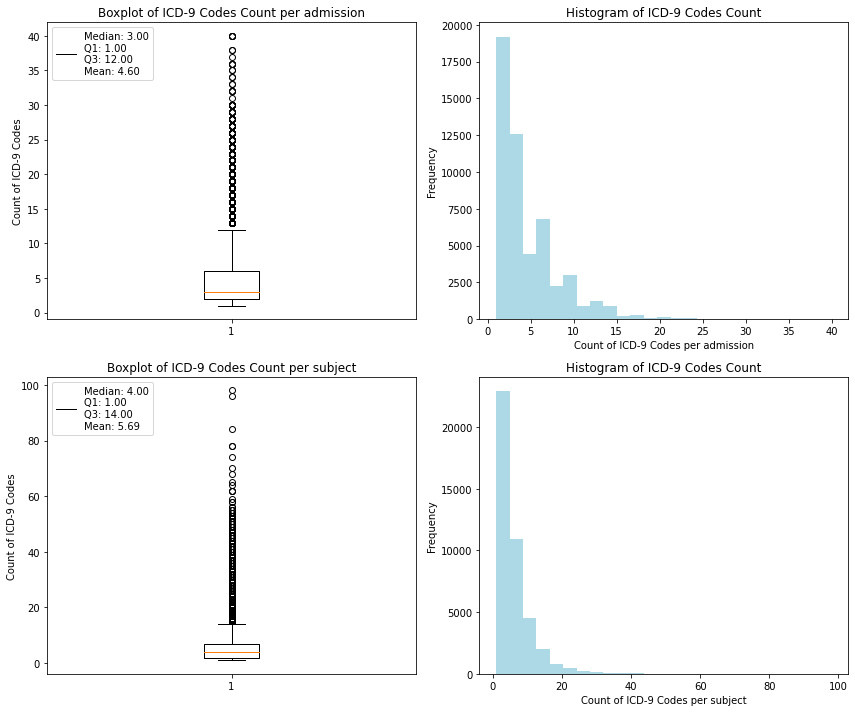

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame

# Count the number of ICD-9 codes per admission
icd9_counts_a = (
    df.groupby("HADM_ID")["ICD9_CODE_procedures"]
    .count()
    .reset_index(name="count_icd9_codes")
)

# If you have specific admission IDs you want to plot, filter them here
# For example, if you want to plot for admission IDs 'A1', 'A2', 'A3', 'A4', 'A5'
selected_admissions_a = icd9_counts_a

icd9_counts = (
    df.groupby("SUBJECT_ID")["ICD9_CODE_procedures"]
    .count()
    .reset_index(name="count_icd9_codes")
)

# If you have specific admission IDs you want to plot, filter them here
# For example, if you want to plot for admission IDs 'A1', 'A2', 'A3', 'A4', 'A5'
selected_admissions = icd9_counts

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot of ICD-9 Codes Count per admission
boxplot_a = axs[0, 0].boxplot(selected_admissions_a["count_icd9_codes"])
axs[0, 0].set_title("Boxplot of ICD-9 Codes Count per admission")
axs[0, 0].set_ylabel("Count of ICD-9 Codes")


# Histogram of ICD-9 Codes Count per admission
axs[0, 1].hist(selected_admissions_a["count_icd9_codes"], bins=25, color="lightblue")
axs[0, 1].set_title("Histogram of ICD-9 Codes Count")
axs[0, 1].set_xlabel("Count of ICD-9 Codes per admission")
axs[0, 1].set_ylabel("Frequency")

# Boxplot of ICD-9 Codes Count per subject
boxplot = axs[1, 0].boxplot(selected_admissions["count_icd9_codes"])
axs[1, 0].set_title("Boxplot of ICD-9 Codes Count per subject")
axs[1, 0].set_ylabel("Count of ICD-9 Codes")


# Histogram of ICD-9 Codes Count per subject
axs[1, 1].hist(selected_admissions["count_icd9_codes"], bins=25, color="lightblue")
axs[1, 1].set_title("Histogram of ICD-9 Codes Count")
axs[1, 1].set_xlabel("Count of ICD-9 Codes per subject")
axs[1, 1].set_ylabel("Frequency")

# Add legend with median, quartiles, and mean to both boxplots
legend_text_a = f"Median: {medians_a[0]:.2f}\nQ1: {quartiles_a[0]:.2f}\nQ3: {quartiles_a[1]:.2f}\nMean: {selected_admissions_a['count_icd9_codes'].mean():.2f}"
axs[0, 0].legend([legend_text_a], loc="upper left")

legend_text = f"Median: {medians[0]:.2f}\nQ1: {quartiles[0]:.2f}\nQ3: {quartiles[1]:.2f}\nMean: {selected_admissions['count_icd9_codes'].mean():.2f}"
axs[1, 0].legend([legend_text], loc="upper left")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

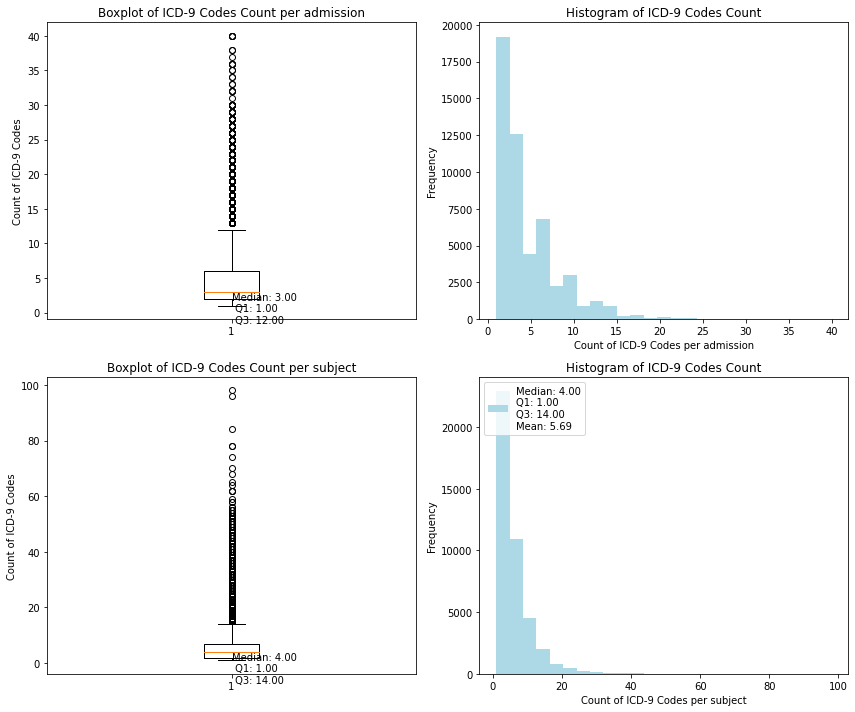

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame

# Count the number of ICD-9 codes per admission
icd9_counts_a = (
    df.groupby("HADM_ID")["ICD9_CODE_procedures"]
    .count()
    .reset_index(name="count_icd9_codes")
)

# If you have specific admission IDs you want to plot, filter them here
# For example, if you want to plot for admission IDs 'A1', 'A2', 'A3', 'A4', 'A5'
selected_admissions_a = icd9_counts_a

icd9_counts = (
    df.groupby("SUBJECT_ID")["ICD9_CODE_procedures"]
    .count()
    .reset_index(name="count_icd9_codes")
)

# If you have specific admission IDs you want to plot, filter them here
# For example, if you want to plot for admission IDs 'A1', 'A2', 'A3', 'A4', 'A5'
selected_admissions = icd9_counts

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot of ICD-9 Codes Count per admission
boxplot_a = axs[0, 0].boxplot(selected_admissions_a["count_icd9_codes"])
axs[0, 0].set_title("Boxplot of ICD-9 Codes Count per admission")
axs[0, 0].set_ylabel("Count of ICD-9 Codes")

# Add labels to the boxplot
medians_a = [median.get_ydata()[0] for median in boxplot_a["medians"]]
quartiles_a = [q.get_ydata()[1] for q in boxplot_a["whiskers"]]
labels_a = [
    f"Median: {median:.2f}\n Q1: {q1:.2f}\n Q3: {q3:.2f}"
    for median, q1, q3 in zip(medians_a, quartiles_a[::2], quartiles_a[1::2])
]
for label, median in zip(labels_a, medians_a):
    axs[0, 0].text(1, median, label, verticalalignment="top")

# Histogram of ICD-9 Codes Count per admission
axs[0, 1].hist(selected_admissions_a["count_icd9_codes"], bins=25, color="lightblue")
axs[0, 1].set_title("Histogram of ICD-9 Codes Count")
axs[0, 1].set_xlabel("Count of ICD-9 Codes per admission")
axs[0, 1].set_ylabel("Frequency")

# Boxplot of ICD-9 Codes Count per subject
boxplot = axs[1, 0].boxplot(selected_admissions["count_icd9_codes"])
axs[1, 0].set_title("Boxplot of ICD-9 Codes Count per subject")
axs[1, 0].set_ylabel("Count of ICD-9 Codes")

# Add labels to the boxplot
medians = [median.get_ydata()[0] for median in boxplot["medians"]]
quartiles = [q.get_ydata()[1] for q in boxplot["whiskers"]]
labels = [
    f"Median: {median:.2f}\n Q1: {q1:.2f}\n Q3: {q3:.2f}"
    for median, q1, q3 in zip(medians, quartiles[::2], quartiles[1::2])
]
for label, median in zip(labels, medians):
    axs[1, 0].text(1, median, label, verticalalignment="top")

# Histogram of ICD-9 Codes Count per subject
axs[1, 1].hist(selected_admissions["count_icd9_codes"], bins=25, color="lightblue")
axs[1, 1].set_title("Histogram of ICD-9 Codes Count")
axs[1, 1].set_xlabel("Count of ICD-9 Codes per subject")
axs[1, 1].set_ylabel("Frequency")

# Add legend with median, quartiles, and mean
legend_text = f"Median: {medians[0]:.2f}\nQ1: {quartiles[0]:.2f}\nQ3: {quartiles[1]:.2f}\nMean: {selected_admissions['count_icd9_codes'].mean():.2f}"
plt.legend([legend_text], loc="upper left")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Diagnosis

In [165]:
nuevo_df = pd.read_csv("data/diagnosis_preprocess_nonfiltered.csv")


In [166]:
a = "D_ICD_DIAGNOSES.csv.gz"
aux_dict = pd.read_csv(
    "/Users/cgarciay/Desktop/Laval_Master_Computer/research/MIMIC/" + a
)

In [167]:
nuevo_df.shape


(651000, 11)

In [168]:
aux_dict
nuevo_df_n = pd.merge(nuevo_df, aux_dict, how="left")

In [169]:
nuevo_df_n.shape


(651000, 14)

In [170]:
shor = "SHORT_TITLE"


In [171]:
result = nuevo_df_n.groupby(["SHORT_TITLE"]).size().reset_index(name="Count")
result

SHORT_TITLE  Count
0      "ventilation" pneumonit      1
1            1st deg burn back      3
2        1st deg burn leg-mult      1
3      2 deg burn back of hand      1
4      24 comp weeks gestation     44
...                        ...    ...
6765   Wrong fluid in infusion      1
6766  Wtrcraft fall NEC-pasngr      1
6767  Wtrcraft fall NOS-pasngr      1
6768     Zoonotic bact dis NOS      1
6769               Zygomycosis      7

[6770 rows x 2 columns]

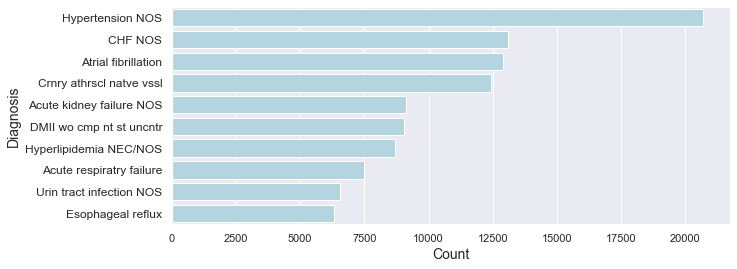

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que nuevo_df es tu DataFrame
result = nuevo_df_n.groupby(["SHORT_TITLE"]).size().reset_index(name="Count")
result = result.sort_values(by="Count", ascending=False)[:10]

plt.figure(
    figsize=(10, 4)
)  # Ajusta las dimensiones de la figura para las barras verticales
sns.barplot(x="Count", y="SHORT_TITLE", data=result, color="lightblue")
plt.yticks(
    rotation=0, fontsize=12
)  # Las etiquetas del eje y ahora pueden no necesitar rotación
plt.ylabel(
    "Diagnosis", fontsize=14
)  # El eje y ahora tiene las descripciones de diagnóstico
plt.xlabel("Count", fontsize=14)  # El eje x ahora tiene los conteos
#plt.title("Top 10 Most Frequent Diagnoses", fontsize=16)

plt.show()

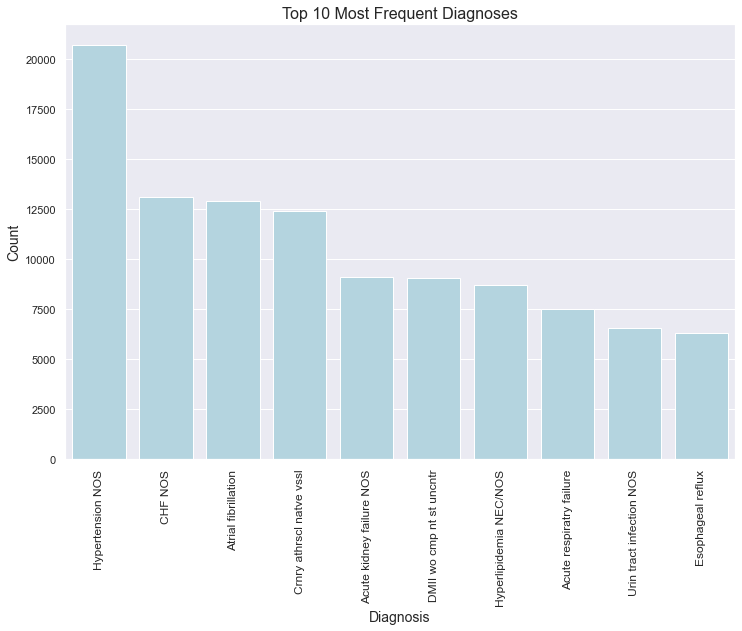

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

result = (
    nuevo_df_n.groupby(["SHORT_TITLE"]).size().reset_index(name="Count")
)
result = result.sort_values(by="Count", ascending=False)[:10]

plt.figure(figsize=(12, 8))
sns.barplot(x="SHORT_TITLE", y="Count", data=result, color="lightblue")
plt.xticks(rotation=90, fontsize=12)  # Increase the font size of x-axis labels
plt.xlabel("Diagnosis", fontsize=14)  # Increase the font size of x-axis label
plt.ylabel("Count", fontsize=14)  # Increase the font size of y-axis label
plt.title(
    "Top 10 Most Frequent Diagnoses", fontsize=16
)  # Increase the font size of the title

plt.show()

In [122]:
result_subject = nuevo_df_n.groupby("SUBJECT_ID").size().reset_index(name="Count")

# Count per admission ID
result_admission = nuevo_df_n.groupby("HADM_ID").size().reset_index(name="Count")

In [129]:
result_subject_1 = result_subject[result_subject["Count"] < 100]
result_admission_1 = result_admission[result_admission["Count"] < 30]

In [135]:
result_subject.describe()

SUBJECT_ID         Count
count  46517.000000  46517.000000
mean   34427.153729     13.994884
std    28330.695877     15.670553
min        2.000000      1.000000
25%    12287.000000      6.000000
50%    24652.000000      9.000000
75%    55479.000000     17.000000
max    99999.000000    540.000000

In [137]:
result_admission.describe()

HADM_ID         Count
count   58929.000000  58929.000000
mean   149970.501841     11.047192
std     28881.337590      6.462537
min    100001.000000      1.000000
25%    124955.000000      7.000000
50%    149986.000000      9.000000
75%    174964.000000     15.000000
max    199999.000000     39.000000

In [132]:
result_admission_1.shape[0]/result_admission.shape[0]

0.9842182965942066

In [131]:
result_subject_1.shape[0]/result_subject.shape[0]

0.9950985661156136

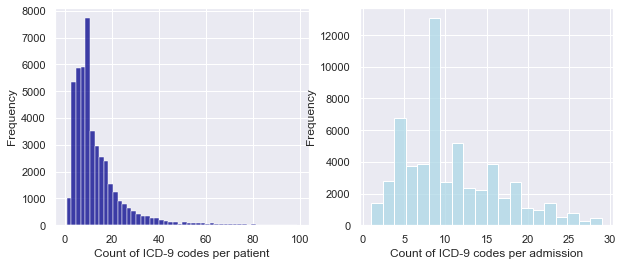

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

# Load the iris dataset
df = sns.load_dataset("iris")

# Create a figure with two matplotlib.Axes objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Assigning a graph to each ax
sns.histplot(data=result_subject_1, x="Count", ax=ax1, color="darkblue", bins=50)
sns.histplot(data=result_admission_1, x="Count", ax=ax2, color="lightblue", bins=20)

# Set x-axis and y-axis labels for each subplot
ax1.set(xlabel="Count of ICD-9 codes per patient", ylabel="Frequency")
ax2.set(xlabel="Count of ICD-9 codes per admission", ylabel="Frequency")
#fig.suptitle(
#    "Histograms of ICD-9 codes per patient and admission", fontsize=16
#)  # Increase the font size of the title
# Show the plot
plt.show()

# Drugs

In [173]:
nuevo_df = pd.read_csv("data/drugs2_preprosss_non_preprocess.csv")

In [174]:
nuevo_df.columns


Index(['Unnamed: 0', 'HADM_ID', 'SUBJECT_ID', 'DRUG', 'threshold_0.88',
       'threshold_0.95', 'threshold_0.98', 'threshold_0.999'],
      dtype='object')

In [175]:
result = nuevo_df.groupby(["DRUG"]).size().reset_index(name="Count")
result

DRUG  Count
0                                             1
1            Cabergoline     ( Dostinex)      1
2                              Symbicort      1
3                     Zaditor Ophthalmic      1
4              *IND* Pexelizumab/Placebo      6
...                                  ...    ...
4520                                  zz      1
4521                                 zz       1
4522                 ~ <IND> Defibrotide      1
4523  ~<IND> Ketamine/Placebo Study Drug      1
4524                    ~<IND> Rituximab      2

[4525 rows x 2 columns]

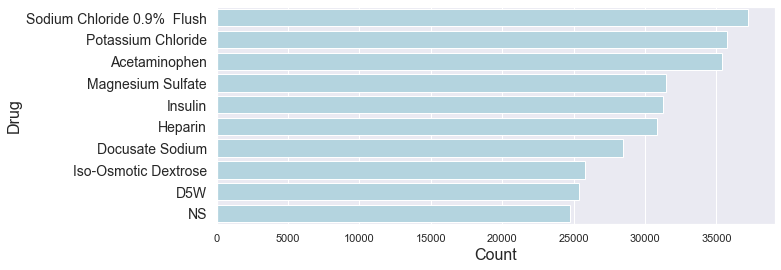

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming nuevo_df is your DataFrame
result = nuevo_df.groupby(["DRUG"]).size().reset_index(name="Count")
result = result.sort_values(by="Count", ascending=False)[:10]

plt.figure(figsize=(10, 4))  # Adjust figure size for vertical layout
sns.barplot(x="Count", y="DRUG", data=result, color="lightblue")
plt.yticks(fontsize=14)  # Adjust font size of y-axis labels, rotation not needed
plt.ylabel("Drug", fontsize=16)  # y-axis now has the drug names
plt.xlabel("Count", fontsize=16)  # x-axis now has the counts
#plt.title("Top 10 Most Frequently Used Medication", fontsize=18)  # Adjust title

plt.show()

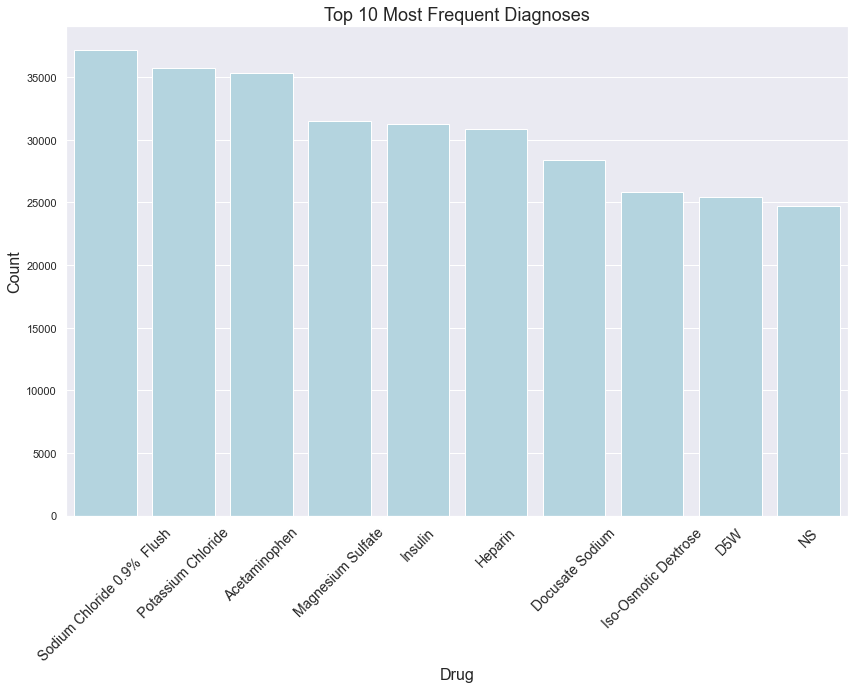

In [164]:
result = nuevo_df.groupby(["DRUG"]).size().reset_index(name="Count")
result = result.sort_values(by="Count", ascending=False)[:10]

plt.figure(figsize=(14, 9))
sns.barplot(x="DRUG", y="Count", data=result, color="lightblue")
plt.xticks(rotation=45, fontsize=14)  # Increase the font size of x-axis labels
plt.xlabel("Drug", fontsize=16)  # Increase the font size of x-axis label
plt.ylabel("Count", fontsize=16)  # Increase the font size of y-axis label
plt.title(
    "Top 10 Most Frequent Diagnoses", fontsize=18
)  # Increase the font size of the title

plt.show()

In [102]:
result_subject = nuevo_df.groupby("SUBJECT_ID").size().reset_index(name="Count")

# Count per admission ID
result_admission = nuevo_df.groupby("HADM_ID").size().reset_index(name="Count")

In [108]:
result_subject_1 = result_subject[result_subject["Count"] < 300]
result_admission_1 = result_admission[result_admission["Count"] < 100]

In [104]:
result_subject_1.shape[0] / result_subject.shape[0]

0.9972563066839417

In [110]:
result_admission_1.shape[0] / result_admission.shape[0]

0.9963756571610642

In [112]:
result_admission.describe()

HADM_ID         Count
count   50216.000000  50216.000000
mean   150023.415704     34.986279
std     28903.230555     18.177610
min    100001.000000      1.000000
25%    124966.250000     22.000000
50%    150074.500000     33.000000
75%    175074.500000     46.000000
max    199999.000000    173.000000

In [113]:
result_subject.describe()


SUBJECT_ID         Count
count  39363.000000  39363.000000
mean   38030.813048     44.632548
std    29144.892046     40.044173
min        2.000000      1.000000
25%    14111.000000     23.000000
50%    28068.000000     37.000000
75%    62213.500000     54.000000
max    99999.000000   1032.000000

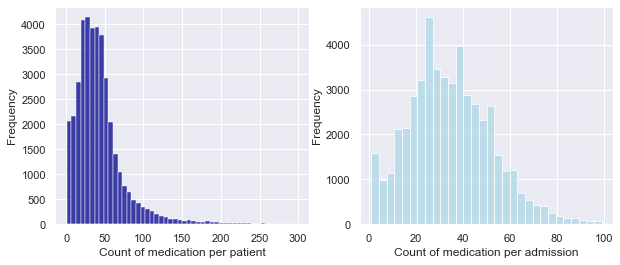

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

# Load the iris dataset
df = sns.load_dataset("iris")

# Create a figure with two matplotlib.Axes objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Assigning a graph to each ax
sns.histplot(data=result_subject_1, x="Count", ax=ax1, color="darkblue", bins=50)
sns.histplot(data=result_admission_1, x="Count", ax=ax2, color="lightblue", bins=30)

# Set x-axis and y-axis labels for each subplot
ax1.set(xlabel="Count of medication per patient", ylabel="Frequency")
ax2.set(xlabel="Count of medication per admission", ylabel="Frequency")
# fig.suptitle('Histograms drugs per patient and admission', fontsize=16)  # Increase the font size of the title
# Show the plot

plt.show()

### CCS CODES

In [181]:
df = pd.read_csv(
    "/Users/cgarciay/Desktop/Laval_Master_Computer/research/Synthetic-Data-Deep-Learning/input_model_pred/CCS CODES_proc_outs_visit_non_filtered.csv")

In [184]:
column_sums = df.sum()

# Obtener el nombre de la columna con el mayor valor de la suma
#column_with_max_value = column_sums.idxmax(10)

In [208]:
df = df.iloc[:,:-15]

In [209]:
zeros_mask = (df == 0)

# Contar los valores True en la máscara, que son los ceros en el DataFrame
number_of_zeros = zeros_mask.sum().sum()

In [210]:
number_of_zeros

10997007

In [213]:
nw = column_sums*number_of_zeros

In [230]:
aux1 = pd.DataFrame(nw.sort_values(ascending=False)[16:26]).reset_index().rename(columns={"index" :"'CCS CATEGORY'"})

In [226]:
ccs = pd.read_csv("/Users/cgarciay/Desktop/Laval_Master_Computer/research/$prref 2015.csv")
ccs["CCS CODES"] = ccs["'CCS CATEGORY'"].replace(r'\s+', '', regex=True)
ccs.head()

'ICD-9-CM CODE' 'CCS CATEGORY' 'CCS CATEGORY DESCRIPTION'  \
0         '     '          '0  '        'No PROC          '   
1         '0101 '          '1  '        'Inc/exc CNS      '   
2         '0109 '          '1  '        'Inc/exc CNS      '   
3         '0121 '          '1  '        'Inc/exc CNS      '   
4         '0122 '          '1  '        'Inc/exc CNS      '   

  'ICD-9-CM CODE DESCRIPTION' CCS CODES  
0  INVALID CODES IN USER DATA       '0'  
1          CISTERNAL PUNCTURE       '1'  
2        CRANIAL PUNCTURE NEC       '1'  
3         CRANIAL SINUS I & D       '1'  
4    REMOV INTRACRAN STIMULAT       '1'

In [227]:
ccs["'CCS CATEGORY'"]= ccs["'CCS CATEGORY'"].str.replace(r'[^0-9]', '', regex=True)

In [231]:
aux1["'CCS CATEGORY'"].dtype

dtype('O')

In [234]:
aux1.shape

(10, 2)

In [241]:
l_df.columns

Index([             ''CCS CATEGORY'',                             0,
                   ''ICD-9-CM CODE'',  ''CCS CATEGORY DESCRIPTION'',
       ''ICD-9-CM CODE DESCRIPTION'',                   'CCS CODES'],
      dtype='object')

In [240]:
l_df = pd.merge(aux1, ccs, on = "'CCS CATEGORY'",how = "left")
l_df["'CCS CATEGORY'"].unique()

array(['216', '54', '47', '223', '222', '44', '231', '61', '50', '228'],
      dtype=object)

In [244]:
aux1["Desc"] = list(l_df["'CCS CATEGORY DESCRIPTION'"].unique())

In [245]:
aux1["Desc"] 

0    'Mech ventil      '
1    'Ot vasc cath     '
2    'Cardiac cath     '
3    'Ent nutritio     '
4    'Blood transf     '
5    'CABG             '
6    'Ot Rx procs      '
7    'Ot vessels       '
8    'Extrcor circ     '
9    'Vaccinations     '
Name: Desc, dtype: object

In [246]:
aux1

'CCS CATEGORY'             0                 Desc
0            216  1.703291e+06  'Mech ventil      '
1             54  1.303004e+06  'Ot vasc cath     '
2             47  9.633719e+05  'Cardiac cath     '
3            223  8.343329e+05  'Ent nutritio     '
4            222  6.560772e+05  'Blood transf     '
5             44  5.727923e+05  'CABG             '
6            231  5.460818e+05  'Ot Rx procs      '
7             61  5.091075e+05  'Ot vessels       '
8             50  4.517912e+05  'Extrcor circ     '
9            228  3.656621e+05  'Vaccinations     '

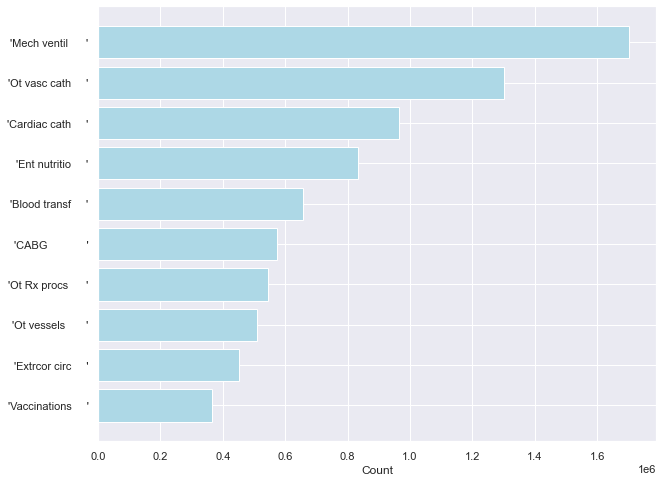

In [249]:
plt.figure(figsize=(10, 8))
plt.barh(aux1['Desc'], aux1[0], color='lightblue')
plt.xlabel('Count')

plt.gca().invert_yaxis()  # Invert y-axis to have the largest bar on top
plt.show()

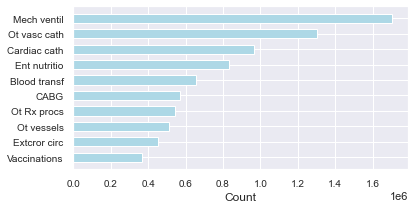

In [267]:
data = {
    "0": [1.703291e+06, 1.303004e+06, 9.633719e+05, 8.343329e+05, 6.560772e+05, 
          5.727923e+05, 5.460818e+05, 5.091075e+05, 4.517912e+05, 3.656621e+05],
    "Desc": ['Mech ventil', 'Ot vasc cath', 'Cardiac cath', 'Ent nutritio', 'Blood transf', 
             'CABG', 'Ot Rx procs', 'Ot vessels', 'Extcror circ', 'Vaccinations']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(6, 3))
plt.barh(df['Desc'], df['0'], color='lightblue',height=.6)
plt.xlabel('Count')
#plt.title('Bar Plot')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.gca().invert_yaxis()  # Invert y-axis to have the largest bar on top
plt.show()

In [269]:
from PIL import Image

In [ ]:


# Open the four images
image1 = Image.open('image1.png')
image2 = Image.open('image2.png')
image3 = Image.open('image3.png')
image4 = Image.open('image4.png')

# Assume all images are the same size for simplicity
width, height = image1.size

# Create a new image with the appropriate size (width*3, height*2)
new_im = Image.new('RGB', (width*3, height*2))

# Paste the first three images side by side
new_im.paste(image1, (0, 0))
new_im.paste(image2, (width, 0))
new_im.paste(image3, (width*2, 0))

# Paste the fourth image below
new_im.paste(image4, (0, height))

# Save the new image
new_im.save('concatenated_image.png')
